In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import torchvision.transforms as T
import os

from DatasetCH import UpscaleDataset
#from models import *
import Network

In [2]:
# Make dirs
mdir="./Model_dif/Test_1"
rdir="./Results_dif/Test_1"
os.makedirs(mdir, exist_ok=True)
os.makedirs(rdir, exist_ok=True)

# Define the tensorboard writer
writer = SummaryWriter("./Runs_dif/Test_1") # was runs_unet

In [3]:
import sys
sys.path.append('/home/mpyrina/Notebooks/ANEMOI/ClimateDiffuse/src/')
from DatasetCH import *
from TrainDiffusion import *
#from TrainUnet import *

In [4]:
import Evaluation

### TRAIN DIFFUSION

In [5]:
batch_size = 16
learning_rate = 1e-5
num_epochs = 10
accum = 4

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# a tensor of shape [B, C, H, W] mean that c=8, image resol=(H, W) 

network = Network.EDMPrecond(
        img_resolution=(256, 128),
        in_channels=2,
        out_channels=1,
        label_dim=0
    ).to(device)

# define the datasets
ifs_dir = '/s2s/mpyrina/ECMWF_MCH/Europe_eval/s2s_hind_2022/all/'
obs_dir = '/net/cfc/s2s_nobackup/mpyrina/TABSD_ifs_like/'

dataset_train = UpscaleDataset(coarse_data_dir = ifs_dir, highres_data_dir = obs_dir,
year_start=2002, year_end=2012, month=815,  
constant_variables=None, constant_variables_filename=None)

dataset_test = UpscaleDataset(coarse_data_dir = ifs_dir, highres_data_dir = obs_dir,
year_start=2012, year_end=2015, month=815,  
constant_variables=None, constant_variables_filename=None)

dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=4)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=True, num_workers=4)

Test - new upscale
Loaded coarse data shape: (460, 11, 16, 32)
Loaded high-resolution data shape: (460, 128, 256)
Final coarse shape: torch.Size([5060, 1, 16, 32])
Final fine shape: torch.Size([5060, 1, 128, 256])
Input shape (should be [N, 1, H, W]): torch.Size([5060, 1, 128, 256])
Dataset ready.
Test - new upscale
Loaded coarse data shape: (138, 11, 16, 32)
Loaded high-resolution data shape: (138, 128, 256)
Final coarse shape: torch.Size([1518, 1, 16, 32])
Final fine shape: torch.Size([1518, 1, 128, 256])
Input shape (should be [N, 1, H, W]): torch.Size([1518, 1, 128, 256])
Dataset ready.


/tmp/ipykernel_39324/1184116077.py:2: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/home/mpyrina/.conda/envs/myenv_iacpy3_2023/lib/python3.11/site-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
Train :: Epoch: 0:   0%|          | 1/317 [00:00<02:02,  2.57it/s]/home/mpyrina/Notebooks/ANEMOI/ClimateDiffuse/src/TrainDiffusion.py:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/home/mpyrina/.conda/envs/myenv_iacpy3_2023/lib/python3.11/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   1%|          | 2/317 [01:44<5:23:16, 61.58s/it, Loss: 17.5786]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   1%|          | 3/317 [03:35<7:19:05, 83.90s/it, Loss: 18.5291]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   1%|▏         | 4/317 [05:33<8:27:30, 97.29s/it, Loss: 22.7296]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   2%|▏         | 5/317 [07:55<9:49:40, 113.40s/it, Loss: 18.4079]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   2%|▏         | 6/317 [10:03<10:15:05, 118.67s/it, Loss: 13.6965]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   2%|▏         | 7/317 [12:22<10:46:33, 125.14s/it, Loss: 22.4613]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   3%|▎         | 8/317 [14:42<11:09:26, 129.99s/it, Loss: 16.4948]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   3%|▎         | 9/317 [17:04<11:25:42, 133.58s/it, Loss: 9.7198] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   3%|▎         | 10/317 [19:20<11:27:17, 134.32s/it, Loss: 8.0663]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   3%|▎         | 11/317 [21:38<11:31:17, 135.55s/it, Loss: 14.5741]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   4%|▍         | 12/317 [23:49<11:21:29, 134.06s/it, Loss: 8.3401] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   4%|▍         | 13/317 [26:50<12:31:09, 148.25s/it, Loss: 22.7217]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   4%|▍         | 14/317 [29:05<12:08:26, 144.25s/it, Loss: 21.2793]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   5%|▍         | 15/317 [31:24<11:58:39, 142.78s/it, Loss: 20.2235]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   5%|▌         | 16/317 [33:36<11:40:42, 139.67s/it, Loss: 16.7252]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   5%|▌         | 17/317 [36:01<11:45:14, 141.05s/it, Loss: 16.6936]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   6%|▌         | 18/317 [38:14<11:31:38, 138.79s/it, Loss: 15.3669]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   6%|▌         | 19/317 [40:29<11:23:55, 137.70s/it, Loss: 12.7372]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   6%|▋         | 20/317 [42:43<11:15:00, 136.37s/it, Loss: 9.6796] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   7%|▋         | 21/317 [45:10<11:29:20, 139.73s/it, Loss: 19.6470]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   7%|▋         | 22/317 [47:26<11:20:39, 138.44s/it, Loss: 10.4800]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   7%|▋         | 23/317 [49:38<11:09:56, 136.72s/it, Loss: 11.4678]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   8%|▊         | 24/317 [51:54<11:06:42, 136.53s/it, Loss: 19.2987]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   8%|▊         | 25/317 [54:14<11:08:49, 137.43s/it, Loss: 14.8156]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   8%|▊         | 26/317 [56:30<11:04:19, 136.97s/it, Loss: 14.6149]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   9%|▊         | 27/317 [58:37<10:48:13, 134.11s/it, Loss: 19.9353]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   9%|▉         | 28/317 [1:00:52<10:46:02, 134.13s/it, Loss: 12.5545]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   9%|▉         | 29/317 [1:03:07<10:45:45, 134.53s/it, Loss: 7.7739] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:   9%|▉         | 30/317 [1:05:12<10:29:09, 131.53s/it, Loss: 12.5369]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  10%|▉         | 31/317 [1:07:24<10:28:32, 131.86s/it, Loss: 12.5119]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  10%|█         | 32/317 [1:09:32<10:20:18, 130.59s/it, Loss: 17.9785]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  10%|█         | 33/317 [1:11:50<10:28:28, 132.78s/it, Loss: 16.2328]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  11%|█         | 34/317 [1:14:05<10:30:32, 133.68s/it, Loss: 12.4108]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  11%|█         | 35/317 [1:16:27<10:39:46, 136.12s/it, Loss: 15.2976]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  11%|█▏        | 36/317 [1:18:48<10:43:17, 137.36s/it, Loss: 15.6229]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  12%|█▏        | 37/317 [1:21:13<10:52:59, 139.93s/it, Loss: 16.0186]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  12%|█▏        | 38/317 [1:23:24<10:38:14, 137.26s/it, Loss: 7.6509] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  12%|█▏        | 39/317 [1:25:46<10:41:59, 138.56s/it, Loss: 23.3643]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  13%|█▎        | 40/317 [1:28:04<10:38:39, 138.34s/it, Loss: 15.4719]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  13%|█▎        | 41/317 [1:30:31<10:48:13, 140.92s/it, Loss: 20.6793]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  13%|█▎        | 42/317 [1:32:49<10:42:14, 140.13s/it, Loss: 10.9665]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  14%|█▎        | 43/317 [1:35:06<10:35:32, 139.17s/it, Loss: 16.1831]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  14%|█▍        | 44/317 [1:37:19<10:24:47, 137.32s/it, Loss: 20.0336]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  14%|█▍        | 45/317 [1:39:38<10:25:24, 137.96s/it, Loss: 10.0873]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  15%|█▍        | 46/317 [1:41:58<10:25:32, 138.50s/it, Loss: 15.5265]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  15%|█▍        | 47/317 [1:44:20<10:27:54, 139.53s/it, Loss: 11.7441]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  15%|█▌        | 48/317 [1:46:43<10:30:18, 140.59s/it, Loss: 11.7001]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  15%|█▌        | 49/317 [1:49:09<10:34:48, 142.12s/it, Loss: 12.6327]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  16%|█▌        | 50/317 [1:51:32<10:33:45, 142.42s/it, Loss: 20.4653]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  16%|█▌        | 51/317 [1:53:49<10:24:11, 140.79s/it, Loss: 14.2518]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  16%|█▋        | 52/317 [1:56:02<10:11:50, 138.53s/it, Loss: 8.5105] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  17%|█▋        | 53/317 [1:58:24<10:13:09, 139.36s/it, Loss: 10.9686]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  17%|█▋        | 54/317 [2:00:39<10:06:09, 138.29s/it, Loss: 14.0404]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  17%|█▋        | 55/317 [2:02:57<10:02:57, 138.08s/it, Loss: 12.9904]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  18%|█▊        | 56/317 [2:05:18<10:04:30, 138.97s/it, Loss: 19.9895]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  18%|█▊        | 57/317 [2:07:43<10:09:43, 140.71s/it, Loss: 22.7114]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  18%|█▊        | 58/317 [2:10:04<10:08:34, 140.98s/it, Loss: 19.2192]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  19%|█▊        | 59/317 [2:12:25<10:05:19, 140.77s/it, Loss: 15.0032]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  19%|█▉        | 60/317 [2:14:43<10:00:18, 140.15s/it, Loss: 24.7479]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  19%|█▉        | 61/317 [2:17:12<10:08:25, 142.60s/it, Loss: 28.9508]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  20%|█▉        | 62/317 [2:19:26<9:55:59, 140.23s/it, Loss: 13.2884] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  20%|█▉        | 63/317 [2:21:47<9:54:38, 140.47s/it, Loss: 14.5559]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  20%|██        | 64/317 [2:24:04<9:47:45, 139.39s/it, Loss: 8.9203] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  21%|██        | 65/317 [2:26:31<9:54:36, 141.57s/it, Loss: 8.3142]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  21%|██        | 66/317 [2:28:48<9:46:21, 140.17s/it, Loss: 15.1844]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  21%|██        | 67/317 [2:31:06<9:41:11, 139.49s/it, Loss: 12.8475]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  21%|██▏       | 68/317 [2:33:26<9:39:41, 139.68s/it, Loss: 19.2480]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  22%|██▏       | 69/317 [2:35:46<9:37:34, 139.74s/it, Loss: 16.5235]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  22%|██▏       | 70/317 [2:38:02<9:31:26, 138.81s/it, Loss: 7.7704] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  22%|██▏       | 71/317 [2:40:23<9:31:02, 139.28s/it, Loss: 12.4940]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  23%|██▎       | 72/317 [2:42:39<9:24:23, 138.22s/it, Loss: 16.9369]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  23%|██▎       | 73/317 [2:45:01<9:26:42, 139.35s/it, Loss: 18.8295]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  23%|██▎       | 74/317 [2:47:15<9:18:55, 138.01s/it, Loss: 18.9842]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  24%|██▎       | 75/317 [2:49:34<9:17:24, 138.20s/it, Loss: 6.3357] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  24%|██▍       | 76/317 [2:51:58<9:22:15, 139.98s/it, Loss: 19.3835]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  24%|██▍       | 77/317 [2:54:22<9:23:58, 141.00s/it, Loss: 18.3310]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  25%|██▍       | 78/317 [2:56:45<9:24:17, 141.66s/it, Loss: 12.5197]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  25%|██▍       | 79/317 [2:59:09<9:24:45, 142.38s/it, Loss: 14.5329]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  25%|██▌       | 80/317 [3:01:29<9:20:10, 141.81s/it, Loss: 22.3665]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  26%|██▌       | 81/317 [3:03:53<9:19:28, 142.24s/it, Loss: 30.0786]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  26%|██▌       | 82/317 [3:06:10<9:11:57, 140.93s/it, Loss: 25.9505]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  26%|██▌       | 83/317 [3:08:28<9:05:09, 139.78s/it, Loss: 11.1287]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  26%|██▋       | 84/317 [3:10:48<9:03:54, 140.06s/it, Loss: 15.3460]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  27%|██▋       | 85/317 [3:13:16<9:11:03, 142.52s/it, Loss: 13.8533]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  27%|██▋       | 86/317 [3:15:43<9:13:39, 143.81s/it, Loss: 12.1120]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  27%|██▋       | 87/317 [3:18:03<9:06:23, 142.54s/it, Loss: 16.0755]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  28%|██▊       | 88/317 [3:20:26<9:04:29, 142.66s/it, Loss: 9.8690] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  28%|██▊       | 89/317 [3:22:51<9:04:57, 143.41s/it, Loss: 13.6390]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  28%|██▊       | 90/317 [3:25:12<8:59:24, 142.57s/it, Loss: 12.3727]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  29%|██▊       | 91/317 [3:27:36<8:59:04, 143.12s/it, Loss: 10.5545]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  29%|██▉       | 92/317 [3:30:00<8:57:43, 143.39s/it, Loss: 28.8887]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  29%|██▉       | 93/317 [3:32:29<9:01:05, 144.94s/it, Loss: 17.5536]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  30%|██▉       | 94/317 [3:34:46<8:49:53, 142.57s/it, Loss: 19.8950]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  30%|██▉       | 95/317 [3:37:08<8:47:19, 142.52s/it, Loss: 15.6988]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  30%|███       | 96/317 [3:39:22<8:35:14, 139.88s/it, Loss: 24.5831]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  31%|███       | 97/317 [3:41:50<8:42:22, 142.47s/it, Loss: 13.5863]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  31%|███       | 98/317 [3:44:11<8:38:07, 141.95s/it, Loss: 16.1737]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  31%|███       | 99/317 [3:46:35<8:38:14, 142.63s/it, Loss: 14.4168]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  32%|███▏      | 100/317 [3:48:52<8:29:22, 140.84s/it, Loss: 7.3975]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  32%|███▏      | 101/317 [3:51:25<8:40:49, 144.67s/it, Loss: 11.6961]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  32%|███▏      | 102/317 [3:53:53<8:41:07, 145.43s/it, Loss: 12.8890]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  32%|███▏      | 103/317 [3:56:16<8:36:48, 144.90s/it, Loss: 12.6915]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  33%|███▎      | 104/317 [3:58:38<8:31:04, 143.97s/it, Loss: 16.2052]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  33%|███▎      | 105/317 [4:01:08<8:35:26, 145.88s/it, Loss: 14.9305]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  33%|███▎      | 106/317 [4:03:28<8:26:19, 143.98s/it, Loss: 24.5217]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  34%|███▍      | 107/317 [4:05:47<8:18:34, 142.45s/it, Loss: 8.6949] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  34%|███▍      | 108/317 [4:08:11<8:17:39, 142.87s/it, Loss: 15.8278]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  34%|███▍      | 109/317 [4:10:38<8:19:29, 144.08s/it, Loss: 13.2860]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  35%|███▍      | 110/317 [4:12:59<8:13:45, 143.12s/it, Loss: 14.0959]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  35%|███▌      | 111/317 [4:15:19<8:08:19, 142.23s/it, Loss: 7.3095] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  35%|███▌      | 112/317 [4:17:40<8:05:13, 142.02s/it, Loss: 5.3449]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  36%|███▌      | 113/317 [4:20:08<8:09:04, 143.84s/it, Loss: 16.0974]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  36%|███▌      | 114/317 [4:22:27<8:01:30, 142.32s/it, Loss: 14.3405]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  36%|███▋      | 115/317 [4:24:51<8:00:40, 142.77s/it, Loss: 11.4071]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  37%|███▋      | 116/317 [4:27:19<8:03:36, 144.36s/it, Loss: 12.4693]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  37%|███▋      | 117/317 [4:29:47<8:04:28, 145.34s/it, Loss: 11.6377]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  37%|███▋      | 118/317 [4:32:09<7:58:42, 144.33s/it, Loss: 6.5165] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  38%|███▊      | 119/317 [4:34:37<8:00:42, 145.67s/it, Loss: 8.3677]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  38%|███▊      | 120/317 [4:37:01<7:56:41, 145.18s/it, Loss: 13.3981]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  38%|███▊      | 121/317 [4:39:28<7:55:46, 145.64s/it, Loss: 7.5920] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  38%|███▊      | 122/317 [4:41:48<7:47:59, 144.00s/it, Loss: 4.8773]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  39%|███▉      | 123/317 [4:44:11<7:44:07, 143.54s/it, Loss: 15.9414]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  39%|███▉      | 124/317 [4:46:32<7:39:26, 142.83s/it, Loss: 17.2405]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  39%|███▉      | 125/317 [4:49:04<7:45:52, 145.59s/it, Loss: 32.1407]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  40%|███▉      | 126/317 [4:51:26<7:39:54, 144.47s/it, Loss: 8.3744] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  40%|████      | 127/317 [4:53:41<7:28:54, 141.76s/it, Loss: 14.7362]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  40%|████      | 128/317 [4:56:05<7:28:04, 142.25s/it, Loss: 32.6417]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  41%|████      | 129/317 [4:58:29<7:27:31, 142.83s/it, Loss: 14.4903]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  41%|████      | 130/317 [5:00:47<7:20:42, 141.40s/it, Loss: 7.7016] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  41%|████▏     | 131/317 [5:03:07<7:17:07, 141.01s/it, Loss: 14.6591]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  42%|████▏     | 132/317 [5:05:35<7:21:21, 143.14s/it, Loss: 27.9265]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  42%|████▏     | 133/317 [5:08:01<7:21:28, 143.96s/it, Loss: 6.3657] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  42%|████▏     | 134/317 [5:10:29<7:22:54, 145.21s/it, Loss: 15.4906]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  43%|████▎     | 135/317 [5:13:00<7:25:14, 146.78s/it, Loss: 14.9572]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  43%|████▎     | 136/317 [5:15:23<7:19:27, 145.68s/it, Loss: 22.8677]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  43%|████▎     | 137/317 [5:17:51<7:19:17, 146.43s/it, Loss: 11.9412]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  44%|████▎     | 138/317 [5:20:14<7:13:53, 145.44s/it, Loss: 12.4328]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  44%|████▍     | 139/317 [5:22:43<7:14:38, 146.51s/it, Loss: 17.8316]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  44%|████▍     | 140/317 [5:25:10<7:13:03, 146.80s/it, Loss: 11.2934]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  44%|████▍     | 141/317 [5:27:43<7:15:58, 148.63s/it, Loss: 17.7142]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  45%|████▍     | 142/317 [5:30:10<7:11:35, 147.98s/it, Loss: 10.5731]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  45%|████▌     | 143/317 [5:32:34<7:05:50, 146.84s/it, Loss: 9.1732] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  45%|████▌     | 144/317 [5:34:53<6:56:46, 144.55s/it, Loss: 14.8528]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  46%|████▌     | 145/317 [5:37:29<7:03:59, 147.91s/it, Loss: 20.7295]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  46%|████▌     | 146/317 [5:39:58<7:02:12, 148.15s/it, Loss: 10.1895]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  46%|████▋     | 147/317 [5:42:20<6:55:11, 146.54s/it, Loss: 16.5150]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  47%|████▋     | 148/317 [5:44:44<6:49:57, 145.55s/it, Loss: 12.1041]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  47%|████▋     | 149/317 [5:47:20<6:56:54, 148.90s/it, Loss: 18.2891]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  47%|████▋     | 150/317 [5:49:47<6:52:33, 148.23s/it, Loss: 10.2743]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  48%|████▊     | 151/317 [5:52:15<6:50:04, 148.22s/it, Loss: 30.2268]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  48%|████▊     | 152/317 [5:54:45<6:48:54, 148.70s/it, Loss: 12.2316]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  48%|████▊     | 153/317 [5:57:20<6:51:45, 150.65s/it, Loss: 18.9656]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  49%|████▊     | 154/317 [5:59:44<6:43:44, 148.62s/it, Loss: 5.8117] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  49%|████▉     | 155/317 [6:02:19<6:45:56, 150.35s/it, Loss: 8.3572]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  49%|████▉     | 156/317 [6:04:53<6:46:49, 151.61s/it, Loss: 9.5594]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  50%|████▉     | 157/317 [6:07:24<6:43:38, 151.37s/it, Loss: 10.8839]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  50%|████▉     | 158/317 [6:10:00<6:44:59, 152.83s/it, Loss: 11.5961]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  50%|█████     | 159/317 [6:12:25<6:36:06, 150.42s/it, Loss: 23.3336]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  50%|█████     | 160/317 [6:15:09<6:44:28, 154.57s/it, Loss: 5.0043] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  51%|█████     | 161/317 [6:17:42<6:40:44, 154.13s/it, Loss: 16.9295]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  51%|█████     | 162/317 [6:20:07<6:30:47, 151.27s/it, Loss: 15.2670]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  51%|█████▏    | 163/317 [6:22:34<6:24:41, 149.88s/it, Loss: 10.8791]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  52%|█████▏    | 164/317 [6:25:02<6:21:27, 149.59s/it, Loss: 12.7885]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  52%|█████▏    | 165/317 [6:27:41<6:26:06, 152.41s/it, Loss: 17.9110]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  52%|█████▏    | 166/317 [6:30:03<6:15:25, 149.18s/it, Loss: 10.5171]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  53%|█████▎    | 167/317 [6:32:24<6:06:27, 146.58s/it, Loss: 27.0179]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  53%|█████▎    | 168/317 [6:34:48<6:02:12, 145.86s/it, Loss: 8.9203] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  53%|█████▎    | 169/317 [6:37:25<6:08:24, 149.35s/it, Loss: 10.5238]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  54%|█████▎    | 170/317 [6:39:47<6:00:40, 147.21s/it, Loss: 9.5654] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  54%|█████▍    | 171/317 [6:42:17<5:59:35, 147.78s/it, Loss: 13.9854]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  54%|█████▍    | 172/317 [6:44:45<5:57:28, 147.92s/it, Loss: 22.3862]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  55%|█████▍    | 173/317 [6:47:16<5:57:29, 148.95s/it, Loss: 5.6757] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  55%|█████▍    | 174/317 [6:49:39<5:50:29, 147.06s/it, Loss: 13.4689]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  55%|█████▌    | 175/317 [6:52:10<5:51:13, 148.41s/it, Loss: 10.6359]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  56%|█████▌    | 176/317 [6:54:40<5:49:20, 148.65s/it, Loss: 7.5508] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  56%|█████▌    | 177/317 [6:57:08<5:46:40, 148.58s/it, Loss: 12.8398]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  56%|█████▌    | 178/317 [6:59:29<5:39:00, 146.33s/it, Loss: 20.5557]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  56%|█████▋    | 179/317 [7:01:52<5:34:26, 145.41s/it, Loss: 12.8939]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  57%|█████▋    | 180/317 [7:04:07<5:24:37, 142.17s/it, Loss: 9.3726] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  57%|█████▋    | 181/317 [7:06:36<5:27:02, 144.29s/it, Loss: 15.6879]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  57%|█████▋    | 182/317 [7:08:59<5:23:28, 143.77s/it, Loss: 10.9315]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  58%|█████▊    | 183/317 [7:11:21<5:20:13, 143.38s/it, Loss: 17.4781]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  58%|█████▊    | 184/317 [7:13:48<5:19:51, 144.30s/it, Loss: 14.6214]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  58%|█████▊    | 185/317 [7:16:12<5:17:24, 144.27s/it, Loss: 22.6999]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  59%|█████▊    | 186/317 [7:18:32<5:12:01, 142.91s/it, Loss: 19.7462]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  59%|█████▉    | 187/317 [7:20:47<5:04:37, 140.59s/it, Loss: 23.5663]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  59%|█████▉    | 188/317 [7:23:12<5:04:56, 141.83s/it, Loss: 11.3788]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  60%|█████▉    | 189/317 [7:25:49<5:12:49, 146.64s/it, Loss: 11.7311]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  60%|█████▉    | 190/317 [7:28:04<5:02:38, 142.98s/it, Loss: 28.4689]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  60%|██████    | 191/317 [7:30:29<5:01:44, 143.69s/it, Loss: 11.4819]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  61%|██████    | 192/317 [7:32:57<5:01:46, 144.85s/it, Loss: 16.8131]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  61%|██████    | 193/317 [7:35:32<5:05:42, 147.92s/it, Loss: 19.5673]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  61%|██████    | 194/317 [7:37:53<4:58:55, 145.82s/it, Loss: 21.3695]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  62%|██████▏   | 195/317 [7:40:25<5:00:08, 147.61s/it, Loss: 20.5577]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  62%|██████▏   | 196/317 [7:42:53<4:58:15, 147.90s/it, Loss: 16.0683]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  62%|██████▏   | 197/317 [7:45:19<4:54:42, 147.36s/it, Loss: 20.4265]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  62%|██████▏   | 198/317 [7:47:39<4:47:43, 145.07s/it, Loss: 20.8608]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  63%|██████▎   | 199/317 [7:50:07<4:46:48, 145.83s/it, Loss: 12.6147]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  63%|██████▎   | 200/317 [7:52:31<4:43:26, 145.36s/it, Loss: 20.4555]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  63%|██████▎   | 201/317 [7:55:00<4:43:20, 146.55s/it, Loss: 7.4114] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  64%|██████▎   | 202/317 [7:57:27<4:40:57, 146.59s/it, Loss: 10.8590]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  64%|██████▍   | 203/317 [7:59:54<4:38:48, 146.75s/it, Loss: 11.9461]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  64%|██████▍   | 204/317 [8:03:21<5:10:39, 164.95s/it, Loss: 15.6224]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  65%|██████▍   | 205/317 [8:06:03<5:06:08, 164.00s/it, Loss: 20.3327]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  65%|██████▍   | 206/317 [8:08:23<4:49:45, 156.62s/it, Loss: 9.3524] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  65%|██████▌   | 207/317 [8:10:46<4:39:49, 152.63s/it, Loss: 12.8305]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  66%|██████▌   | 208/317 [8:13:13<4:34:06, 150.89s/it, Loss: 9.0049] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  66%|██████▌   | 209/317 [8:15:48<4:34:14, 152.36s/it, Loss: 15.9764]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  66%|██████▌   | 210/317 [8:18:06<4:23:38, 147.84s/it, Loss: 14.9033]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  67%|██████▋   | 211/317 [8:20:27<4:17:35, 145.80s/it, Loss: 16.4545]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  67%|██████▋   | 212/317 [8:22:49<4:13:17, 144.74s/it, Loss: 11.8831]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  67%|██████▋   | 213/317 [8:25:16<4:12:13, 145.52s/it, Loss: 10.7626]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  68%|██████▊   | 214/317 [8:27:32<4:04:51, 142.64s/it, Loss: 19.4720]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  68%|██████▊   | 215/317 [8:29:58<4:03:48, 143.41s/it, Loss: 8.5881] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  68%|██████▊   | 216/317 [8:32:27<4:04:14, 145.09s/it, Loss: 18.8809]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  68%|██████▊   | 217/317 [8:35:00<4:06:00, 147.61s/it, Loss: 8.9566] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  69%|██████▉   | 218/317 [8:37:21<4:00:13, 145.59s/it, Loss: 16.7866]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  69%|██████▉   | 219/317 [8:39:50<3:59:34, 146.68s/it, Loss: 17.5128]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  69%|██████▉   | 220/317 [8:42:18<3:57:31, 146.92s/it, Loss: 20.8318]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  70%|██████▉   | 221/317 [8:44:45<3:55:24, 147.13s/it, Loss: 15.7703]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  70%|███████   | 222/317 [8:47:08<3:50:45, 145.74s/it, Loss: 11.6416]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  70%|███████   | 223/317 [8:49:33<3:48:13, 145.67s/it, Loss: 14.3429]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  71%|███████   | 224/317 [8:51:54<3:43:42, 144.33s/it, Loss: 11.9479]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  71%|███████   | 225/317 [8:54:24<3:43:40, 145.87s/it, Loss: 9.5878] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  71%|███████▏  | 226/317 [8:56:47<3:40:03, 145.10s/it, Loss: 5.5521]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  72%|███████▏  | 227/317 [8:59:13<3:37:58, 145.31s/it, Loss: 17.8667]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  72%|███████▏  | 228/317 [9:01:39<3:35:56, 145.58s/it, Loss: 15.9938]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  72%|███████▏  | 229/317 [9:04:19<3:39:45, 149.83s/it, Loss: 16.7302]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  73%|███████▎  | 230/317 [9:06:37<3:32:07, 146.29s/it, Loss: 17.8947]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  73%|███████▎  | 231/317 [9:09:02<3:29:15, 146.00s/it, Loss: 6.7352] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  73%|███████▎  | 232/317 [9:11:27<3:26:18, 145.63s/it, Loss: 10.4057]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  74%|███████▎  | 233/317 [9:13:57<3:25:31, 146.81s/it, Loss: 14.9622]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  74%|███████▍  | 234/317 [9:16:15<3:19:42, 144.37s/it, Loss: 15.5493]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  74%|███████▍  | 235/317 [9:18:45<3:19:37, 146.06s/it, Loss: 7.9076] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  74%|███████▍  | 236/317 [9:21:13<3:17:44, 146.48s/it, Loss: 6.0494]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  75%|███████▍  | 237/317 [9:23:43<3:17:00, 147.75s/it, Loss: 14.0930]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  75%|███████▌  | 238/317 [9:26:09<3:13:30, 146.97s/it, Loss: 10.0423]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  75%|███████▌  | 239/317 [9:28:36<3:11:01, 146.94s/it, Loss: 17.7923]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  76%|███████▌  | 240/317 [9:30:56<3:06:00, 144.95s/it, Loss: 10.8748]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  76%|███████▌  | 241/317 [9:33:23<3:04:24, 145.58s/it, Loss: 11.5434]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  76%|███████▋  | 242/317 [9:35:52<3:03:25, 146.75s/it, Loss: 13.2906]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  77%|███████▋  | 243/317 [9:38:15<2:59:29, 145.54s/it, Loss: 29.3240]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  77%|███████▋  | 244/317 [9:40:38<2:56:03, 144.70s/it, Loss: 8.7372] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  77%|███████▋  | 245/317 [9:43:06<2:54:43, 145.60s/it, Loss: 10.4116]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  78%|███████▊  | 246/317 [9:45:29<2:51:39, 145.07s/it, Loss: 18.3889]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  78%|███████▊  | 247/317 [9:47:47<2:46:30, 142.72s/it, Loss: 15.1434]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  78%|███████▊  | 248/317 [9:49:20<2:27:15, 128.04s/it, Loss: 19.0764]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  79%|███████▊  | 249/317 [9:50:50<2:12:09, 116.61s/it, Loss: 6.7633] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  79%|███████▉  | 250/317 [9:52:16<1:59:51, 107.34s/it, Loss: 10.6110]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  79%|███████▉  | 251/317 [9:53:38<1:49:42, 99.73s/it, Loss: 17.7221] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  79%|███████▉  | 252/317 [9:54:48<1:38:22, 90.81s/it, Loss: 6.0923] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  80%|███████▉  | 253/317 [9:56:07<1:33:06, 87.28s/it, Loss: 20.1389]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  80%|████████  | 254/317 [9:57:32<1:30:59, 86.66s/it, Loss: 19.4481]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  80%|████████  | 255/317 [9:58:59<1:29:29, 86.60s/it, Loss: 9.7840] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  81%|████████  | 256/317 [10:00:25<1:28:05, 86.64s/it, Loss: 11.2842]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  81%|████████  | 257/317 [10:01:54<1:27:14, 87.24s/it, Loss: 15.6122]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  81%|████████▏ | 258/317 [10:03:20<1:25:20, 86.79s/it, Loss: 12.8717]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  82%|████████▏ | 259/317 [10:04:42<1:22:38, 85.49s/it, Loss: 11.1769]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  82%|████████▏ | 260/317 [10:06:06<1:20:36, 84.85s/it, Loss: 10.8905]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  82%|████████▏ | 261/317 [10:07:38<1:21:17, 87.10s/it, Loss: 6.6625] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  83%|████████▎ | 262/317 [10:09:04<1:19:32, 86.77s/it, Loss: 6.9286]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  83%|████████▎ | 263/317 [10:10:31<1:18:07, 86.80s/it, Loss: 17.1514]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  83%|████████▎ | 264/317 [10:11:56<1:16:07, 86.18s/it, Loss: 14.6151]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  84%|████████▎ | 265/317 [10:13:23<1:14:52, 86.40s/it, Loss: 20.3578]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  84%|████████▍ | 266/317 [10:14:49<1:13:30, 86.47s/it, Loss: 6.7759] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  84%|████████▍ | 267/317 [10:16:11<1:10:57, 85.15s/it, Loss: 13.9648]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  85%|████████▍ | 268/317 [10:17:33<1:08:46, 84.22s/it, Loss: 6.3584] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  85%|████████▍ | 269/317 [10:18:56<1:06:59, 83.75s/it, Loss: 10.3238]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  85%|████████▌ | 270/317 [10:20:21<1:05:59, 84.25s/it, Loss: 12.9146]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  85%|████████▌ | 271/317 [10:21:46<1:04:43, 84.42s/it, Loss: 16.6319]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  86%|████████▌ | 272/317 [10:23:15<1:04:11, 85.60s/it, Loss: 8.1127] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  86%|████████▌ | 273/317 [10:24:39<1:02:31, 85.27s/it, Loss: 6.3567]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  86%|████████▋ | 274/317 [10:26:04<1:01:05, 85.24s/it, Loss: 14.4428]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  87%|████████▋ | 275/317 [10:27:28<59:22, 84.82s/it, Loss: 22.3902]  

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  87%|████████▋ | 276/317 [10:28:55<58:25, 85.49s/it, Loss: 18.7172]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  87%|████████▋ | 277/317 [10:30:25<57:58, 86.96s/it, Loss: 6.1213] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  88%|████████▊ | 278/317 [10:31:54<56:46, 87.33s/it, Loss: 10.4824]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  88%|████████▊ | 279/317 [10:33:23<55:42, 87.96s/it, Loss: 11.1509]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  88%|████████▊ | 280/317 [10:34:45<53:12, 86.28s/it, Loss: 9.7799] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  89%|████████▊ | 281/317 [10:36:13<52:03, 86.77s/it, Loss: 6.5549]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  89%|████████▉ | 282/317 [10:37:40<50:38, 86.83s/it, Loss: 8.5171]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  89%|████████▉ | 283/317 [10:39:10<49:42, 87.71s/it, Loss: 11.7189]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  90%|████████▉ | 284/317 [10:40:37<48:10, 87.59s/it, Loss: 11.6773]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  90%|████████▉ | 285/317 [10:42:05<46:42, 87.57s/it, Loss: 18.8955]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  90%|█████████ | 286/317 [10:43:30<44:49, 86.77s/it, Loss: 13.4016]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  91%|█████████ | 287/317 [10:45:00<43:57, 87.92s/it, Loss: 22.0975]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  91%|█████████ | 288/317 [10:46:33<43:10, 89.31s/it, Loss: 22.8489]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  91%|█████████ | 289/317 [10:48:04<41:58, 89.95s/it, Loss: 7.4406] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  91%|█████████▏| 290/317 [10:49:30<39:50, 88.53s/it, Loss: 7.3547]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  92%|█████████▏| 291/317 [10:50:57<38:12, 88.17s/it, Loss: 15.0729]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  92%|█████████▏| 292/317 [10:52:21<36:14, 86.97s/it, Loss: 9.1769] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  92%|█████████▏| 293/317 [10:53:51<35:07, 87.82s/it, Loss: 14.9451]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  93%|█████████▎| 294/317 [10:55:19<33:38, 87.77s/it, Loss: 13.1733]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  93%|█████████▎| 295/317 [10:56:44<31:52, 86.95s/it, Loss: 20.4801]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  93%|█████████▎| 296/317 [10:58:10<30:24, 86.86s/it, Loss: 17.7131]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  94%|█████████▎| 297/317 [10:59:38<29:00, 87.01s/it, Loss: 8.2239] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  94%|█████████▍| 298/317 [11:01:07<27:44, 87.59s/it, Loss: 30.5441]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  94%|█████████▍| 299/317 [11:02:32<26:07, 87.08s/it, Loss: 16.7551]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  95%|█████████▍| 300/317 [11:04:00<24:40, 87.12s/it, Loss: 11.2203]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  95%|█████████▍| 301/317 [11:05:25<23:06, 86.66s/it, Loss: 18.0097]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  95%|█████████▌| 302/317 [11:06:52<21:40, 86.71s/it, Loss: 5.1512] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  96%|█████████▌| 303/317 [11:08:23<20:31, 87.95s/it, Loss: 19.5653]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  96%|█████████▌| 304/317 [11:09:51<19:05, 88.11s/it, Loss: 16.6626]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  96%|█████████▌| 305/317 [11:11:21<17:42, 88.57s/it, Loss: 10.5411]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  97%|█████████▋| 306/317 [11:12:45<15:59, 87.22s/it, Loss: 15.0475]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  97%|█████████▋| 307/317 [11:14:10<14:24, 86.43s/it, Loss: 15.7068]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  97%|█████████▋| 308/317 [11:15:42<13:12, 88.04s/it, Loss: 15.8586]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  97%|█████████▋| 309/317 [11:17:12<11:51, 88.90s/it, Loss: 12.6746]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  98%|█████████▊| 310/317 [11:18:46<10:31, 90.25s/it, Loss: 19.3193]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  98%|█████████▊| 311/317 [11:20:14<08:58, 89.76s/it, Loss: 11.6045]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  98%|█████████▊| 312/317 [11:21:41<07:24, 88.93s/it, Loss: 17.0258]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  99%|█████████▊| 313/317 [11:23:16<06:02, 90.69s/it, Loss: 5.3180] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  99%|█████████▉| 314/317 [11:24:47<04:32, 90.68s/it, Loss: 14.9802]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0:  99%|█████████▉| 315/317 [11:26:17<03:01, 90.53s/it, Loss: 11.4475]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0: 100%|█████████▉| 316/317 [11:27:46<01:30, 90.18s/it, Loss: 12.6990]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 0: 100%|██████████| 317/317 [11:29:19<00:00, 90.89s/it, Loss: 9.3414] 

Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 64, 128])
Input shape to conv0: torch.Size([4, 256, 64, 128])
Input shape to conv0: torch.Size([4, 256, 64, 128])
Input shape to conv0: torch.Size([4, 256, 32, 64])
Input shape to conv0: torch.Size([4, 512, 32, 64])
Input shape to conv0: torch.Size([4, 512, 32, 64])
Input shape to conv0: torch.Size([4, 512, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-1].shape: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 2048, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-1].shape: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 2048, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-

Train :: Epoch: 0: 100%|██████████| 317/317 [11:29:48<00:00, 130.56s/it, Loss: 14.5144]


Model saved to ./Model_dif/Test_1/dif_model_epoch_0.pt
Batch input shape: torch.Size([16, 1, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Si

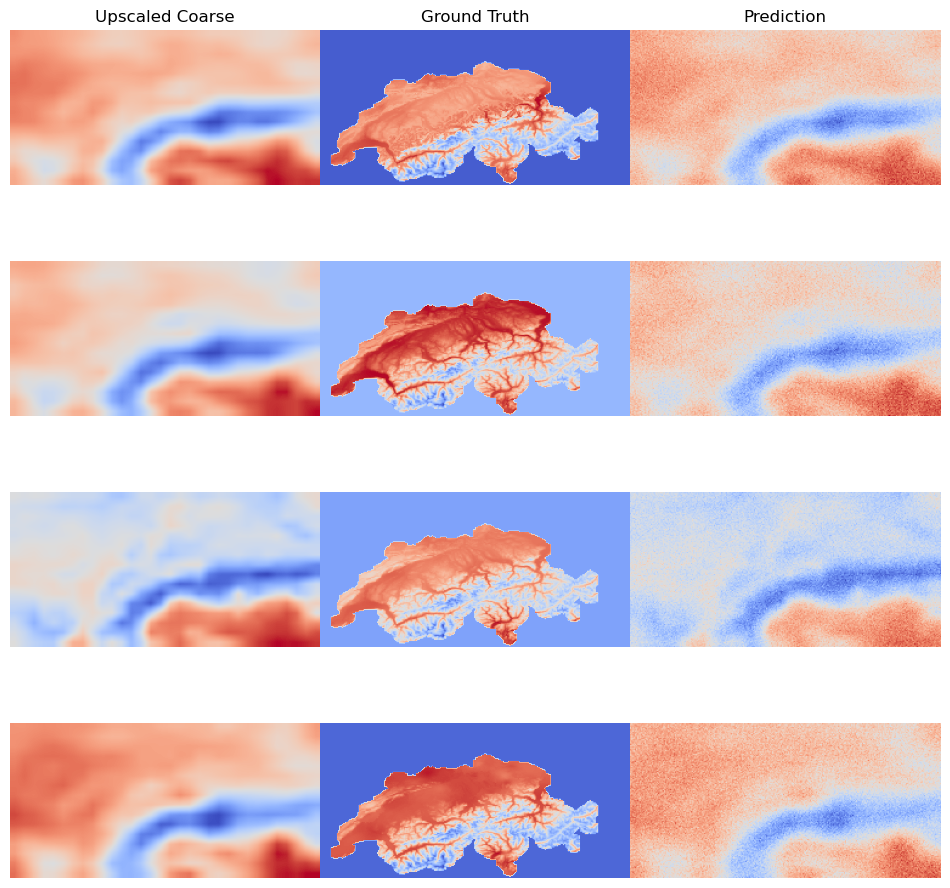

Train :: Epoch: 1:   0%|          | 1/317 [00:00<02:51,  1.85it/s]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   1%|          | 2/317 [01:30<4:38:35, 53.06s/it, Loss: 8.5047]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   1%|          | 3/317 [03:00<6:06:54, 70.11s/it, Loss: 18.4511]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   1%|▏         | 4/317 [04:31<6:48:40, 78.34s/it, Loss: 9.3444] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   2%|▏         | 5/317 [06:02<7:11:04, 82.90s/it, Loss: 14.6303]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   2%|▏         | 6/317 [07:27<7:12:27, 83.43s/it, Loss: 10.4854]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   2%|▏         | 7/317 [08:53<7:16:14, 84.43s/it, Loss: 6.5634] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   3%|▎         | 8/317 [10:23<7:23:21, 86.09s/it, Loss: 12.1991]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   3%|▎         | 9/317 [11:54<7:29:53, 87.64s/it, Loss: 9.0620] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   3%|▎         | 10/317 [13:15<7:17:22, 85.48s/it, Loss: 14.6052]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   3%|▎         | 11/317 [14:37<7:11:40, 84.64s/it, Loss: 9.7056] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   4%|▍         | 12/317 [16:05<7:15:26, 85.66s/it, Loss: 12.2567]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   4%|▍         | 13/317 [17:36<7:22:17, 87.29s/it, Loss: 14.5847]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   4%|▍         | 14/317 [19:06<7:25:01, 88.12s/it, Loss: 12.5405]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   5%|▍         | 15/317 [20:30<7:16:42, 86.76s/it, Loss: 14.2339]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   5%|▌         | 16/317 [21:56<7:14:09, 86.54s/it, Loss: 13.7055]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   5%|▌         | 17/317 [23:25<7:16:23, 87.28s/it, Loss: 21.0960]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   6%|▌         | 18/317 [24:53<7:16:22, 87.57s/it, Loss: 6.7433] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   6%|▌         | 19/317 [26:24<7:19:16, 88.45s/it, Loss: 6.3641]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   6%|▋         | 20/317 [27:51<7:15:59, 88.08s/it, Loss: 9.1692]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   7%|▋         | 21/317 [29:26<7:25:17, 90.26s/it, Loss: 5.2180]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   7%|▋         | 22/317 [30:54<7:20:00, 89.49s/it, Loss: 16.4497]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   7%|▋         | 23/317 [32:24<7:19:07, 89.62s/it, Loss: 17.5338]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   8%|▊         | 24/317 [33:51<7:14:37, 89.00s/it, Loss: 10.7886]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   8%|▊         | 25/317 [35:20<7:13:03, 88.98s/it, Loss: 7.8336] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   8%|▊         | 26/317 [38:02<8:57:07, 110.75s/it, Loss: 9.0440]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   9%|▊         | 27/317 [39:25<8:14:31, 102.31s/it, Loss: 8.9530]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   9%|▉         | 28/317 [40:52<7:50:53, 97.76s/it, Loss: 9.2326] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   9%|▉         | 29/317 [42:22<7:39:12, 95.67s/it, Loss: 19.4811]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:   9%|▉         | 30/317 [43:46<7:20:38, 92.12s/it, Loss: 13.3966]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  10%|▉         | 31/317 [45:11<7:08:33, 89.91s/it, Loss: 13.7965]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  10%|█         | 32/317 [46:39<7:04:55, 89.46s/it, Loss: 15.4388]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  10%|█         | 33/317 [48:13<7:09:04, 90.65s/it, Loss: 8.8210] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  11%|█         | 34/317 [49:40<7:02:21, 89.54s/it, Loss: 20.6251]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  11%|█         | 35/317 [51:04<6:53:39, 88.01s/it, Loss: 27.5744]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  11%|█▏        | 36/317 [52:31<6:50:54, 87.74s/it, Loss: 17.1011]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  12%|█▏        | 37/317 [54:02<6:53:49, 88.68s/it, Loss: 22.7786]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  12%|█▏        | 38/317 [55:31<6:52:20, 88.68s/it, Loss: 14.0463]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  12%|█▏        | 39/317 [57:01<6:52:25, 89.01s/it, Loss: 10.8247]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  13%|█▎        | 40/317 [58:27<6:46:40, 88.09s/it, Loss: 11.6294]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  13%|█▎        | 41/317 [59:58<6:50:12, 89.18s/it, Loss: 11.0585]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  13%|█▎        | 42/317 [1:01:24<6:43:53, 88.12s/it, Loss: 12.6133]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  14%|█▎        | 43/317 [1:02:49<6:38:32, 87.27s/it, Loss: 14.1117]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  14%|█▍        | 44/317 [1:04:15<6:34:42, 86.75s/it, Loss: 8.7601] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  14%|█▍        | 45/317 [1:05:43<6:35:45, 87.30s/it, Loss: 15.9361]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  15%|█▍        | 46/317 [1:07:11<6:35:11, 87.50s/it, Loss: 19.5856]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  15%|█▍        | 47/317 [1:08:41<6:36:41, 88.15s/it, Loss: 21.5878]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  15%|█▌        | 48/317 [1:10:08<6:33:52, 87.85s/it, Loss: 17.3207]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  15%|█▌        | 49/317 [1:11:41<6:38:24, 89.19s/it, Loss: 9.1664] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  16%|█▌        | 50/317 [1:13:08<6:34:03, 88.55s/it, Loss: 14.7295]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  16%|█▌        | 51/317 [1:14:34<6:29:41, 87.90s/it, Loss: 10.0595]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  16%|█▋        | 52/317 [1:16:00<6:25:14, 87.22s/it, Loss: 29.5936]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  17%|█▋        | 53/317 [1:17:27<6:24:10, 87.31s/it, Loss: 8.3613] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  17%|█▋        | 54/317 [1:18:50<6:17:03, 86.02s/it, Loss: 21.9647]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  17%|█▋        | 55/317 [1:20:14<6:13:11, 85.46s/it, Loss: 13.4700]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  18%|█▊        | 56/317 [1:21:37<6:07:35, 84.51s/it, Loss: 11.4858]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  18%|█▊        | 57/317 [1:23:06<6:12:34, 85.98s/it, Loss: 8.0326] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  18%|█▊        | 58/317 [1:24:33<6:12:35, 86.32s/it, Loss: 10.5195]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  19%|█▊        | 59/317 [1:26:00<6:11:38, 86.43s/it, Loss: 8.1890] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  19%|█▉        | 60/317 [1:27:28<6:12:53, 87.06s/it, Loss: 15.5662]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  19%|█▉        | 61/317 [1:29:03<6:20:53, 89.27s/it, Loss: 6.5863] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  20%|█▉        | 62/317 [1:30:32<6:18:43, 89.11s/it, Loss: 11.0939]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  20%|█▉        | 63/317 [1:32:00<6:15:53, 88.79s/it, Loss: 27.0622]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  20%|██        | 64/317 [1:33:27<6:13:19, 88.54s/it, Loss: 5.4714] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  21%|██        | 65/317 [1:34:59<6:15:01, 89.29s/it, Loss: 18.1738]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  21%|██        | 66/317 [1:36:26<6:10:38, 88.60s/it, Loss: 4.4828] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  21%|██        | 67/317 [1:37:55<6:10:04, 88.82s/it, Loss: 12.9646]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  21%|██▏       | 68/317 [1:39:26<6:11:35, 89.54s/it, Loss: 21.0406]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  22%|██▏       | 69/317 [1:41:01<6:17:01, 91.22s/it, Loss: 16.9967]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  22%|██▏       | 70/317 [1:42:25<6:06:04, 88.92s/it, Loss: 9.1052] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  22%|██▏       | 71/317 [1:43:45<5:54:13, 86.40s/it, Loss: 8.1948]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  23%|██▎       | 72/317 [1:45:10<5:50:21, 85.80s/it, Loss: 15.0650]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  23%|██▎       | 73/317 [1:46:41<5:55:32, 87.43s/it, Loss: 7.3770] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  23%|██▎       | 74/317 [1:48:11<5:57:09, 88.19s/it, Loss: 14.8662]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  24%|██▎       | 75/317 [1:49:37<5:52:49, 87.48s/it, Loss: 11.8383]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  24%|██▍       | 76/317 [1:51:00<5:45:52, 86.11s/it, Loss: 8.4960] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  24%|██▍       | 77/317 [1:52:26<5:44:33, 86.14s/it, Loss: 16.2235]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  25%|██▍       | 78/317 [1:53:53<5:43:48, 86.31s/it, Loss: 6.1242] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  25%|██▍       | 79/317 [1:55:19<5:42:49, 86.43s/it, Loss: 16.7104]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  25%|██▌       | 80/317 [1:56:44<5:39:10, 85.87s/it, Loss: 11.9031]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  26%|██▌       | 81/317 [1:58:14<5:42:19, 87.03s/it, Loss: 14.7699]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  26%|██▌       | 82/317 [1:59:42<5:42:12, 87.37s/it, Loss: 6.1155] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  26%|██▌       | 83/317 [2:01:10<5:41:17, 87.51s/it, Loss: 18.8689]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  26%|██▋       | 84/317 [2:02:33<5:35:40, 86.44s/it, Loss: 11.9285]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  27%|██▋       | 85/317 [2:04:00<5:34:47, 86.58s/it, Loss: 13.2492]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  27%|██▋       | 86/317 [2:05:23<5:28:09, 85.24s/it, Loss: 20.4995]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  27%|██▋       | 87/317 [2:06:47<5:26:20, 85.13s/it, Loss: 5.8122] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  28%|██▊       | 88/317 [2:08:15<5:27:38, 85.84s/it, Loss: 10.2099]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  28%|██▊       | 89/317 [2:09:43<5:28:30, 86.45s/it, Loss: 10.7348]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  28%|██▊       | 90/317 [2:11:10<5:27:26, 86.55s/it, Loss: 9.9209] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  29%|██▊       | 91/317 [2:12:32<5:20:57, 85.21s/it, Loss: 15.5978]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  29%|██▉       | 92/317 [2:13:55<5:17:17, 84.61s/it, Loss: 14.4904]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  29%|██▉       | 93/317 [2:15:23<5:19:58, 85.71s/it, Loss: 7.2215] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  30%|██▉       | 94/317 [2:16:51<5:20:31, 86.24s/it, Loss: 18.0545]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  30%|██▉       | 95/317 [2:18:16<5:18:06, 85.97s/it, Loss: 9.0571] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  30%|███       | 96/317 [2:19:39<5:13:40, 85.16s/it, Loss: 15.0763]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  31%|███       | 97/317 [2:21:09<5:17:39, 86.63s/it, Loss: 22.5253]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  31%|███       | 98/317 [2:22:37<5:17:25, 86.97s/it, Loss: 5.1212] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  31%|███       | 99/317 [2:24:02<5:13:20, 86.24s/it, Loss: 5.9838]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  32%|███▏      | 100/317 [2:25:25<5:09:03, 85.46s/it, Loss: 17.4092]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  32%|███▏      | 101/317 [2:26:51<5:07:41, 85.47s/it, Loss: 14.9350]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  32%|███▏      | 102/317 [2:28:17<5:06:56, 85.66s/it, Loss: 22.7747]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  32%|███▏      | 103/317 [2:29:44<5:06:59, 86.07s/it, Loss: 7.8845] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  33%|███▎      | 104/317 [2:31:07<5:02:42, 85.27s/it, Loss: 21.4020]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  33%|███▎      | 105/317 [2:32:36<5:04:38, 86.22s/it, Loss: 22.7430]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  33%|███▎      | 106/317 [2:34:03<5:04:08, 86.48s/it, Loss: 9.6892] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  34%|███▍      | 107/317 [2:35:32<5:05:26, 87.27s/it, Loss: 16.8756]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  34%|███▍      | 108/317 [2:37:00<5:05:00, 87.56s/it, Loss: 6.2451] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  34%|███▍      | 109/317 [2:38:31<5:07:31, 88.71s/it, Loss: 14.4185]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  35%|███▍      | 110/317 [2:39:57<5:02:56, 87.81s/it, Loss: 20.0459]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  35%|███▌      | 111/317 [2:41:23<4:59:31, 87.24s/it, Loss: 8.9137] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  35%|███▌      | 112/317 [2:42:49<4:56:24, 86.76s/it, Loss: 16.6315]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  36%|███▌      | 113/317 [2:44:20<4:59:24, 88.06s/it, Loss: 21.6384]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  36%|███▌      | 114/317 [2:45:46<4:55:59, 87.49s/it, Loss: 9.7049] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  36%|███▋      | 115/317 [2:47:15<4:55:45, 87.85s/it, Loss: 13.9179]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  37%|███▋      | 116/317 [2:48:41<4:52:34, 87.33s/it, Loss: 10.6134]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  37%|███▋      | 117/317 [2:50:09<4:52:05, 87.63s/it, Loss: 13.3020]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  37%|███▋      | 118/317 [2:51:36<4:49:58, 87.43s/it, Loss: 7.7003] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  38%|███▊      | 119/317 [2:53:04<4:48:36, 87.46s/it, Loss: 13.0300]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  38%|███▊      | 120/317 [2:54:29<4:44:48, 86.74s/it, Loss: 3.8904] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  38%|███▊      | 121/317 [2:55:57<4:45:08, 87.29s/it, Loss: 16.7379]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  38%|███▊      | 122/317 [2:57:22<4:41:38, 86.66s/it, Loss: 7.1590] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  39%|███▉      | 123/317 [2:58:47<4:38:08, 86.02s/it, Loss: 10.7452]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  39%|███▉      | 124/317 [3:00:13<4:36:31, 85.97s/it, Loss: 9.9837] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  39%|███▉      | 125/317 [3:01:42<4:38:21, 86.99s/it, Loss: 18.7054]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  40%|███▉      | 126/317 [3:03:08<4:35:55, 86.68s/it, Loss: 8.7276] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  40%|████      | 127/317 [3:04:35<4:34:32, 86.70s/it, Loss: 10.4986]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  40%|████      | 128/317 [3:06:03<4:34:18, 87.08s/it, Loss: 15.3338]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  41%|████      | 129/317 [3:07:34<4:36:16, 88.17s/it, Loss: 7.3389] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  41%|████      | 130/317 [3:09:02<4:34:45, 88.16s/it, Loss: 7.5744]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  41%|████▏     | 131/317 [3:10:25<4:28:53, 86.74s/it, Loss: 12.7311]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  42%|████▏     | 132/317 [3:11:49<4:25:10, 86.00s/it, Loss: 13.6978]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  42%|████▏     | 133/317 [3:13:17<4:25:08, 86.46s/it, Loss: 9.4317] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  42%|████▏     | 134/317 [3:14:46<4:25:45, 87.14s/it, Loss: 7.3531]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  43%|████▎     | 135/317 [3:16:14<4:25:41, 87.59s/it, Loss: 13.1445]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  43%|████▎     | 136/317 [3:17:45<4:26:53, 88.47s/it, Loss: 17.2920]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  43%|████▎     | 137/317 [3:19:12<4:24:01, 88.01s/it, Loss: 16.9962]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  44%|████▎     | 138/317 [3:20:37<4:19:41, 87.05s/it, Loss: 12.4816]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  44%|████▍     | 139/317 [3:22:07<4:20:53, 87.94s/it, Loss: 9.6056] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  44%|████▍     | 140/317 [3:23:34<4:18:57, 87.78s/it, Loss: 18.3483]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  44%|████▍     | 141/317 [3:25:06<4:21:13, 89.06s/it, Loss: 14.9400]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  45%|████▍     | 142/317 [3:26:29<4:14:18, 87.19s/it, Loss: 9.8859] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  45%|████▌     | 143/317 [3:27:52<4:09:14, 85.94s/it, Loss: 11.7603]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  45%|████▌     | 144/317 [3:29:21<4:10:21, 86.83s/it, Loss: 12.2730]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  46%|████▌     | 145/317 [3:30:49<4:09:54, 87.17s/it, Loss: 15.7956]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  46%|████▌     | 146/317 [3:32:13<4:06:10, 86.38s/it, Loss: 15.8864]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  46%|████▋     | 147/317 [3:33:37<4:02:26, 85.57s/it, Loss: 7.5545] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  47%|████▋     | 148/317 [3:35:03<4:01:08, 85.61s/it, Loss: 13.0319]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  47%|████▋     | 149/317 [3:36:37<4:06:56, 88.20s/it, Loss: 11.6264]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  47%|████▋     | 150/317 [3:38:06<4:05:54, 88.35s/it, Loss: 17.8358]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  48%|████▊     | 151/317 [3:39:34<4:04:48, 88.49s/it, Loss: 21.0489]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  48%|████▊     | 152/317 [3:41:02<4:02:40, 88.24s/it, Loss: 17.3293]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  48%|████▊     | 153/317 [3:42:35<4:04:50, 89.58s/it, Loss: 14.5387]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  49%|████▊     | 154/317 [3:44:08<4:06:00, 90.56s/it, Loss: 11.1035]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  49%|████▉     | 155/317 [3:45:37<4:03:24, 90.15s/it, Loss: 6.7613] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  49%|████▉     | 156/317 [3:47:04<3:59:14, 89.16s/it, Loss: 18.3272]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  50%|████▉     | 157/317 [3:48:34<3:58:34, 89.47s/it, Loss: 15.1093]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  50%|████▉     | 158/317 [3:50:04<3:57:30, 89.63s/it, Loss: 15.0201]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  50%|█████     | 159/317 [3:51:36<3:58:13, 90.46s/it, Loss: 10.2706]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  50%|█████     | 160/317 [3:53:08<3:57:41, 90.84s/it, Loss: 11.3619]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  51%|█████     | 161/317 [3:54:43<3:59:45, 92.21s/it, Loss: 11.9497]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  51%|█████     | 162/317 [3:56:12<3:55:04, 91.00s/it, Loss: 9.5940] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  51%|█████▏    | 163/317 [3:57:40<3:51:38, 90.25s/it, Loss: 25.0078]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  52%|█████▏    | 164/317 [3:59:11<3:50:17, 90.31s/it, Loss: 15.8299]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  52%|█████▏    | 165/317 [4:00:44<3:50:47, 91.10s/it, Loss: 6.8159] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  52%|█████▏    | 166/317 [4:02:13<3:47:49, 90.52s/it, Loss: 5.8815]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  53%|█████▎    | 167/317 [4:03:37<3:41:31, 88.61s/it, Loss: 8.6109]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  53%|█████▎    | 168/317 [4:05:05<3:39:51, 88.53s/it, Loss: 12.8801]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  53%|█████▎    | 169/317 [4:06:34<3:38:13, 88.47s/it, Loss: 15.0124]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  54%|█████▎    | 170/317 [4:08:03<3:37:17, 88.69s/it, Loss: 10.4979]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  54%|█████▍    | 171/317 [4:09:31<3:35:25, 88.53s/it, Loss: 6.7245] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  54%|█████▍    | 172/317 [4:10:57<3:32:06, 87.77s/it, Loss: 7.9724]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  55%|█████▍    | 173/317 [4:12:25<3:30:41, 87.79s/it, Loss: 5.0020]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  55%|█████▍    | 174/317 [4:13:54<3:30:29, 88.32s/it, Loss: 10.1627]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  55%|█████▌    | 175/317 [4:15:24<3:30:15, 88.84s/it, Loss: 14.9494]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  56%|█████▌    | 176/317 [4:16:57<3:31:36, 90.05s/it, Loss: 16.9614]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  56%|█████▌    | 177/317 [4:18:27<3:29:54, 89.96s/it, Loss: 13.8086]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  56%|█████▌    | 178/317 [4:19:53<3:25:30, 88.71s/it, Loss: 5.0472] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  56%|█████▋    | 179/317 [4:21:21<3:23:48, 88.61s/it, Loss: 6.0351]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  57%|█████▋    | 180/317 [4:22:50<3:22:24, 88.64s/it, Loss: 19.9195]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  57%|█████▋    | 181/317 [4:24:17<3:19:43, 88.11s/it, Loss: 22.1412]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  57%|█████▋    | 182/317 [4:25:40<3:15:05, 86.71s/it, Loss: 16.2443]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  58%|█████▊    | 183/317 [4:27:04<3:12:03, 86.00s/it, Loss: 11.9787]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  58%|█████▊    | 184/317 [4:28:28<3:08:57, 85.24s/it, Loss: 19.1305]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  58%|█████▊    | 185/317 [4:30:00<3:11:44, 87.16s/it, Loss: 12.2615]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  59%|█████▊    | 186/317 [4:31:28<3:10:52, 87.42s/it, Loss: 3.2571] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  59%|█████▉    | 187/317 [4:32:54<3:09:01, 87.24s/it, Loss: 16.8995]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  59%|█████▉    | 188/317 [4:34:21<3:07:08, 87.04s/it, Loss: 2.2992] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  60%|█████▉    | 189/317 [4:35:52<3:08:04, 88.16s/it, Loss: 3.9755]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  60%|█████▉    | 190/317 [4:37:21<3:07:01, 88.36s/it, Loss: 4.4677]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  60%|██████    | 191/317 [4:38:52<3:07:36, 89.33s/it, Loss: 9.5705]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  61%|██████    | 192/317 [4:40:23<3:06:56, 89.73s/it, Loss: 7.4988]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  61%|██████    | 193/317 [4:41:55<3:07:10, 90.57s/it, Loss: 5.9958]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  61%|██████    | 194/317 [4:43:25<3:04:56, 90.22s/it, Loss: 15.2444]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  62%|██████▏   | 195/317 [4:44:55<3:03:21, 90.18s/it, Loss: 14.1266]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  62%|██████▏   | 196/317 [4:46:25<3:01:46, 90.14s/it, Loss: 13.4288]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  62%|██████▏   | 197/317 [4:47:58<3:02:01, 91.01s/it, Loss: 14.5558]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  62%|██████▏   | 198/317 [4:49:29<3:00:36, 91.06s/it, Loss: 5.3674] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  63%|██████▎   | 199/317 [4:51:00<2:59:10, 91.10s/it, Loss: 15.2542]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  63%|██████▎   | 200/317 [4:52:31<2:57:31, 91.03s/it, Loss: 5.3011] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  63%|██████▎   | 201/317 [4:54:09<2:59:41, 92.95s/it, Loss: 6.9390]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  64%|██████▎   | 202/317 [4:55:40<2:57:28, 92.59s/it, Loss: 10.5106]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  64%|██████▍   | 203/317 [4:57:10<2:53:59, 91.58s/it, Loss: 13.1513]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  64%|██████▍   | 204/317 [4:58:40<2:51:48, 91.22s/it, Loss: 12.4539]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  65%|██████▍   | 205/317 [5:00:13<2:51:14, 91.74s/it, Loss: 11.2192]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  65%|██████▍   | 206/317 [5:01:42<2:48:21, 91.00s/it, Loss: 10.7191]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  65%|██████▌   | 207/317 [5:03:17<2:49:10, 92.27s/it, Loss: 11.5951]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  66%|██████▌   | 208/317 [5:04:52<2:48:43, 92.88s/it, Loss: 7.3795] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  66%|██████▌   | 209/317 [5:06:24<2:46:34, 92.54s/it, Loss: 11.2922]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  66%|██████▌   | 210/317 [5:07:54<2:43:54, 91.91s/it, Loss: 11.0886]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  67%|██████▋   | 211/317 [5:09:25<2:42:02, 91.73s/it, Loss: 10.8841]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  67%|██████▋   | 212/317 [5:10:54<2:39:10, 90.95s/it, Loss: 11.5025]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  67%|██████▋   | 213/317 [5:12:32<2:41:02, 92.91s/it, Loss: 9.6504] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  68%|██████▊   | 214/317 [5:14:02<2:37:50, 91.95s/it, Loss: 14.4344]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  68%|██████▊   | 215/317 [5:15:27<2:33:10, 90.10s/it, Loss: 8.7378] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  68%|██████▊   | 216/317 [5:16:57<2:31:39, 90.10s/it, Loss: 6.1790]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  68%|██████▊   | 217/317 [5:18:32<2:32:11, 91.32s/it, Loss: 8.1495]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  69%|██████▉   | 218/317 [5:20:03<2:30:43, 91.35s/it, Loss: 14.5110]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  69%|██████▉   | 219/317 [5:21:34<2:28:50, 91.12s/it, Loss: 16.0223]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  69%|██████▉   | 220/317 [5:23:04<2:26:56, 90.89s/it, Loss: 12.0627]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  70%|██████▉   | 221/317 [5:24:33<2:24:36, 90.38s/it, Loss: 14.9177]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  70%|███████   | 222/317 [5:26:06<2:24:04, 91.00s/it, Loss: 7.6471] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  70%|███████   | 223/317 [5:27:38<2:23:04, 91.33s/it, Loss: 5.8002]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  71%|███████   | 224/317 [5:29:11<2:22:14, 91.77s/it, Loss: 9.1635]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  71%|███████   | 225/317 [5:30:45<2:22:03, 92.65s/it, Loss: 11.8426]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  71%|███████▏  | 226/317 [5:32:16<2:19:52, 92.22s/it, Loss: 6.1231] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  72%|███████▏  | 227/317 [5:33:46<2:17:10, 91.45s/it, Loss: 8.7298]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  72%|███████▏  | 228/317 [5:35:21<2:17:16, 92.55s/it, Loss: 4.8193]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  72%|███████▏  | 229/317 [5:36:56<2:16:49, 93.29s/it, Loss: 14.6475]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  73%|███████▎  | 230/317 [5:38:27<2:14:08, 92.52s/it, Loss: 9.8539] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  73%|███████▎  | 231/317 [5:39:57<2:11:24, 91.68s/it, Loss: 16.2045]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  73%|███████▎  | 232/317 [5:41:29<2:10:08, 91.86s/it, Loss: 15.5062]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  74%|███████▎  | 233/317 [5:43:05<2:10:25, 93.16s/it, Loss: 13.8160]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  74%|███████▍  | 234/317 [5:44:37<2:08:13, 92.70s/it, Loss: 8.5712] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  74%|███████▍  | 235/317 [5:46:05<2:04:53, 91.39s/it, Loss: 10.0622]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  74%|███████▍  | 236/317 [5:47:34<2:02:19, 90.61s/it, Loss: 13.7298]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  75%|███████▍  | 237/317 [5:49:09<2:02:37, 91.97s/it, Loss: 10.2880]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  75%|███████▌  | 238/317 [5:50:40<2:00:37, 91.61s/it, Loss: 8.4938] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  75%|███████▌  | 239/317 [5:52:12<1:59:17, 91.77s/it, Loss: 10.3721]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  76%|███████▌  | 240/317 [5:53:41<1:56:51, 91.06s/it, Loss: 6.0607] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  76%|███████▌  | 241/317 [5:55:12<1:55:13, 90.97s/it, Loss: 9.4357]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  76%|███████▋  | 242/317 [5:56:41<1:52:55, 90.34s/it, Loss: 9.6757]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  77%|███████▋  | 243/317 [5:58:12<1:51:42, 90.57s/it, Loss: 9.8705]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  77%|███████▋  | 244/317 [5:59:43<1:50:15, 90.62s/it, Loss: 11.2490]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  77%|███████▋  | 245/317 [6:01:12<1:48:08, 90.12s/it, Loss: 3.9971] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  78%|███████▊  | 246/317 [6:02:41<1:46:09, 89.72s/it, Loss: 6.7176]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  78%|███████▊  | 247/317 [6:04:05<1:42:40, 88.01s/it, Loss: 17.1811]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  78%|███████▊  | 248/317 [6:05:31<1:40:47, 87.64s/it, Loss: 10.5071]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  79%|███████▊  | 249/317 [6:07:00<1:39:49, 88.08s/it, Loss: 5.6661] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  79%|███████▉  | 250/317 [6:08:27<1:37:45, 87.55s/it, Loss: 9.7849]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  79%|███████▉  | 251/317 [6:09:53<1:35:48, 87.10s/it, Loss: 7.6588]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  79%|███████▉  | 252/317 [6:11:18<1:33:40, 86.47s/it, Loss: 8.0717]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  80%|███████▉  | 253/317 [6:12:52<1:34:37, 88.71s/it, Loss: 7.7119]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  80%|████████  | 254/317 [6:14:20<1:33:03, 88.62s/it, Loss: 16.2665]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  80%|████████  | 255/317 [6:15:47<1:31:02, 88.10s/it, Loss: 13.1539]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  81%|████████  | 256/317 [6:17:16<1:29:53, 88.41s/it, Loss: 13.6810]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  81%|████████  | 257/317 [6:18:47<1:29:08, 89.15s/it, Loss: 10.7661]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  81%|████████▏ | 258/317 [6:20:11<1:26:12, 87.67s/it, Loss: 8.7037] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  82%|████████▏ | 259/317 [6:21:36<1:23:51, 86.76s/it, Loss: 6.7787]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  82%|████████▏ | 260/317 [6:23:02<1:22:18, 86.64s/it, Loss: 8.9738]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  82%|████████▏ | 261/317 [6:24:30<1:21:09, 86.96s/it, Loss: 4.8507]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  83%|████████▎ | 262/317 [6:25:54<1:18:54, 86.09s/it, Loss: 10.3930]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  83%|████████▎ | 263/317 [6:27:20<1:17:21, 85.95s/it, Loss: 12.8601]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  83%|████████▎ | 264/317 [6:28:49<1:16:42, 86.83s/it, Loss: 9.8848] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  84%|████████▎ | 265/317 [6:30:18<1:16:03, 87.75s/it, Loss: 14.0984]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  84%|████████▍ | 266/317 [6:31:43<1:13:40, 86.68s/it, Loss: 8.6449] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  84%|████████▍ | 267/317 [6:33:07<1:11:34, 85.90s/it, Loss: 12.1730]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  85%|████████▍ | 268/317 [6:34:34<1:10:35, 86.45s/it, Loss: 11.1179]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  85%|████████▍ | 269/317 [6:36:05<1:10:15, 87.82s/it, Loss: 11.1717]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  85%|████████▌ | 270/317 [6:37:33<1:08:38, 87.63s/it, Loss: 10.2730]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  85%|████████▌ | 271/317 [6:38:57<1:06:29, 86.73s/it, Loss: 9.8619] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  86%|████████▌ | 272/317 [6:40:22<1:04:35, 86.12s/it, Loss: 7.8277]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  86%|████████▌ | 273/317 [6:41:51<1:03:44, 86.92s/it, Loss: 9.4712]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  86%|████████▋ | 274/317 [6:43:18<1:02:23, 87.06s/it, Loss: 10.3846]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  87%|████████▋ | 275/317 [6:44:44<1:00:43, 86.74s/it, Loss: 10.7634]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  87%|████████▋ | 276/317 [6:46:06<58:21, 85.39s/it, Loss: 9.9144]   

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  87%|████████▋ | 277/317 [6:47:32<57:00, 85.51s/it, Loss: 16.3047]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  88%|████████▊ | 278/317 [6:48:53<54:35, 83.99s/it, Loss: 8.1610] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  88%|████████▊ | 279/317 [6:50:18<53:25, 84.35s/it, Loss: 4.7451]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  88%|████████▊ | 280/317 [6:51:46<52:41, 85.44s/it, Loss: 6.6198]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  89%|████████▊ | 281/317 [6:53:11<51:14, 85.40s/it, Loss: 4.6463]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  89%|████████▉ | 282/317 [6:54:29<48:33, 83.25s/it, Loss: 7.6251]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  89%|████████▉ | 283/317 [6:55:50<46:49, 82.62s/it, Loss: 21.7654]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  90%|████████▉ | 284/317 [6:57:19<46:20, 84.26s/it, Loss: 20.6154]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  90%|████████▉ | 285/317 [6:58:52<46:20, 86.89s/it, Loss: 7.5976] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  90%|█████████ | 286/317 [7:00:20<45:03, 87.21s/it, Loss: 8.3413]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  91%|█████████ | 287/317 [7:01:46<43:34, 87.14s/it, Loss: 10.1088]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  91%|█████████ | 288/317 [7:03:13<41:57, 86.82s/it, Loss: 6.1989] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  91%|█████████ | 289/317 [7:04:46<41:22, 88.67s/it, Loss: 8.4256]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  91%|█████████▏| 290/317 [7:06:13<39:41, 88.22s/it, Loss: 3.7752]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  92%|█████████▏| 291/317 [7:07:39<37:56, 87.55s/it, Loss: 9.2027]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  92%|█████████▏| 292/317 [7:09:06<36:23, 87.36s/it, Loss: 18.2832]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  92%|█████████▏| 293/317 [7:10:32<34:47, 87.00s/it, Loss: 5.9836] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  93%|█████████▎| 294/317 [7:11:57<33:05, 86.33s/it, Loss: 6.9113]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  93%|█████████▎| 295/317 [7:13:24<31:48, 86.74s/it, Loss: 10.3193]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  93%|█████████▎| 296/317 [7:14:51<30:20, 86.69s/it, Loss: 11.5674]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  94%|█████████▎| 297/317 [7:16:19<29:00, 87.01s/it, Loss: 7.9318] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  94%|█████████▍| 298/317 [7:17:41<27:06, 85.60s/it, Loss: 10.0406]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  94%|█████████▍| 299/317 [7:19:06<25:37, 85.44s/it, Loss: 12.9311]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  95%|█████████▍| 300/317 [7:20:33<24:20, 85.91s/it, Loss: 11.6986]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  95%|█████████▍| 301/317 [7:22:06<23:27, 88.00s/it, Loss: 13.1920]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  95%|█████████▌| 302/317 [7:23:31<21:47, 87.13s/it, Loss: 13.5734]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  96%|█████████▌| 303/317 [7:24:57<20:17, 86.95s/it, Loss: 12.2694]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  96%|█████████▌| 304/317 [7:26:24<18:47, 86.73s/it, Loss: 14.8940]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  96%|█████████▌| 305/317 [7:27:54<17:34, 87.92s/it, Loss: 8.3367] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  97%|█████████▋| 306/317 [7:29:20<16:00, 87.34s/it, Loss: 3.0837]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  97%|█████████▋| 307/317 [7:30:45<14:25, 86.57s/it, Loss: 10.7876]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  97%|█████████▋| 308/317 [7:32:10<12:54, 86.01s/it, Loss: 9.4860] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  97%|█████████▋| 309/317 [7:33:38<11:33, 86.70s/it, Loss: 8.1804]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  98%|█████████▊| 310/317 [7:35:04<10:04, 86.33s/it, Loss: 8.8886]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  98%|█████████▊| 311/317 [7:36:29<08:36, 86.13s/it, Loss: 9.6397]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  98%|█████████▊| 312/317 [7:37:54<07:08, 85.70s/it, Loss: 13.1252]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  99%|█████████▊| 313/317 [7:39:15<05:37, 84.34s/it, Loss: 8.5778] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  99%|█████████▉| 314/317 [7:40:36<04:09, 83.32s/it, Loss: 15.5909]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1:  99%|█████████▉| 315/317 [7:42:02<02:48, 84.24s/it, Loss: 5.4987] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1: 100%|█████████▉| 316/317 [7:43:28<01:24, 84.65s/it, Loss: 8.0997]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 1: 100%|██████████| 317/317 [7:44:55<00:00, 85.27s/it, Loss: 10.3931]

Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 64, 128])
Input shape to conv0: torch.Size([4, 256, 64, 128])
Input shape to conv0: torch.Size([4, 256, 64, 128])
Input shape to conv0: torch.Size([4, 256, 32, 64])
Input shape to conv0: torch.Size([4, 512, 32, 64])
Input shape to conv0: torch.Size([4, 512, 32, 64])
Input shape to conv0: torch.Size([4, 512, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-1].shape: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 2048, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-1].shape: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 2048, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-

Train :: Epoch: 1: 100%|██████████| 317/317 [7:45:19<00:00, 88.08s/it, Loss: 11.8780]


Model saved to ./Model_dif/Test_1/dif_model_epoch_1.pt


Train :: Epoch: 2:   0%|          | 1/317 [00:00<05:15,  1.00it/s]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   1%|          | 2/317 [01:26<4:24:51, 50.45s/it, Loss: 11.7657]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   1%|          | 3/317 [02:50<5:44:43, 65.87s/it, Loss: 15.1361]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   1%|▏         | 4/317 [04:15<6:24:05, 73.63s/it, Loss: 17.7784]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   2%|▏         | 5/317 [05:33<6:30:03, 75.01s/it, Loss: 7.9582] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   2%|▏         | 6/317 [06:50<6:32:57, 75.81s/it, Loss: 8.7066]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   2%|▏         | 7/317 [08:02<6:24:44, 74.47s/it, Loss: 14.9700]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   3%|▎         | 8/317 [09:15<6:21:22, 74.06s/it, Loss: 14.3443]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   3%|▎         | 9/317 [10:32<6:24:35, 74.92s/it, Loss: 11.7123]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   3%|▎         | 10/317 [11:45<6:21:07, 74.49s/it, Loss: 5.0093]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   3%|▎         | 11/317 [13:03<6:24:14, 75.34s/it, Loss: 9.4695]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   4%|▍         | 12/317 [14:18<6:23:00, 75.34s/it, Loss: 10.6373]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   4%|▍         | 13/317 [15:36<6:26:13, 76.23s/it, Loss: 9.0685] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   4%|▍         | 14/317 [16:50<6:20:44, 75.39s/it, Loss: 9.5112]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   5%|▍         | 15/317 [18:06<6:20:57, 75.69s/it, Loss: 12.9847]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   5%|▌         | 16/317 [19:23<6:21:41, 76.08s/it, Loss: 8.8203] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   5%|▌         | 17/317 [20:45<6:29:19, 77.87s/it, Loss: 9.7886]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   6%|▌         | 18/317 [22:00<6:23:16, 76.91s/it, Loss: 13.0762]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   6%|▌         | 19/317 [23:09<6:11:02, 74.71s/it, Loss: 14.2013]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   6%|▋         | 20/317 [24:22<6:06:06, 73.96s/it, Loss: 7.2245] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   7%|▋         | 21/317 [25:38<6:08:38, 74.72s/it, Loss: 16.5935]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   7%|▋         | 22/317 [26:56<6:11:48, 75.62s/it, Loss: 6.2726] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   7%|▋         | 23/317 [28:11<6:10:26, 75.60s/it, Loss: 11.3095]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   8%|▊         | 24/317 [29:27<6:09:17, 75.62s/it, Loss: 9.1447] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   8%|▊         | 25/317 [30:42<6:06:24, 75.29s/it, Loss: 13.3962]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   8%|▊         | 26/317 [31:57<6:04:51, 75.23s/it, Loss: 9.7290] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   9%|▊         | 27/317 [33:14<6:06:08, 75.75s/it, Loss: 6.1622]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   9%|▉         | 28/317 [34:33<6:10:02, 76.82s/it, Loss: 5.8170]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   9%|▉         | 29/317 [35:51<6:11:03, 77.30s/it, Loss: 11.2740]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:   9%|▉         | 30/317 [37:06<6:05:32, 76.42s/it, Loss: 6.3981] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  10%|▉         | 31/317 [38:21<6:02:32, 76.06s/it, Loss: 9.2289]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  10%|█         | 32/317 [39:44<6:11:33, 78.22s/it, Loss: 11.5088]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  10%|█         | 33/317 [41:08<6:18:43, 80.01s/it, Loss: 16.6540]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  11%|█         | 34/317 [42:32<6:23:05, 81.22s/it, Loss: 8.5629] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  11%|█         | 35/317 [43:55<6:23:48, 81.66s/it, Loss: 4.6987]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  11%|█▏        | 36/317 [45:14<6:18:13, 80.76s/it, Loss: 9.6800]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  12%|█▏        | 37/317 [46:41<6:25:20, 82.57s/it, Loss: 8.7930]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  12%|█▏        | 38/317 [48:06<6:27:47, 83.40s/it, Loss: 12.0313]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  12%|█▏        | 39/317 [49:28<6:24:29, 82.98s/it, Loss: 7.2214] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  13%|█▎        | 40/317 [50:51<6:23:13, 83.01s/it, Loss: 8.0299]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  13%|█▎        | 41/317 [52:15<6:22:45, 83.21s/it, Loss: 7.7333]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  13%|█▎        | 42/317 [53:36<6:19:21, 82.77s/it, Loss: 10.1407]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  14%|█▎        | 43/317 [55:00<6:19:29, 83.10s/it, Loss: 7.9249] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  14%|█▍        | 44/317 [56:27<6:22:29, 84.06s/it, Loss: 10.2501]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  14%|█▍        | 45/317 [57:55<6:26:23, 85.23s/it, Loss: 5.1768] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  15%|█▍        | 46/317 [59:18<6:22:06, 84.60s/it, Loss: 6.1682]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  15%|█▍        | 47/317 [1:00:39<6:16:37, 83.69s/it, Loss: 16.2915]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  15%|█▌        | 48/317 [1:02:03<6:15:45, 83.81s/it, Loss: 9.1909] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  15%|█▌        | 49/317 [1:03:28<6:15:52, 84.15s/it, Loss: 13.3121]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  16%|█▌        | 50/317 [1:04:53<6:14:40, 84.20s/it, Loss: 7.3761] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  16%|█▌        | 51/317 [1:06:11<6:06:16, 82.62s/it, Loss: 13.2532]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  16%|█▋        | 52/317 [1:07:32<6:02:16, 82.02s/it, Loss: 14.5692]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  17%|█▋        | 53/317 [1:08:54<6:01:11, 82.09s/it, Loss: 12.1019]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  17%|█▋        | 54/317 [1:10:15<5:57:44, 81.62s/it, Loss: 11.2134]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  17%|█▋        | 55/317 [1:11:39<5:59:32, 82.34s/it, Loss: 7.7386] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  18%|█▊        | 56/317 [1:13:00<5:56:43, 82.01s/it, Loss: 9.1694]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  18%|█▊        | 57/317 [1:14:20<5:52:59, 81.46s/it, Loss: 9.8302]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  18%|█▊        | 58/317 [1:15:42<5:51:18, 81.39s/it, Loss: 17.4885]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  19%|█▊        | 59/317 [1:17:07<5:55:19, 82.63s/it, Loss: 6.6543] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  19%|█▉        | 60/317 [1:18:32<5:56:53, 83.32s/it, Loss: 10.1674]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  19%|█▉        | 61/317 [1:19:59<6:00:13, 84.43s/it, Loss: 5.7493] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  20%|█▉        | 62/317 [1:21:19<5:52:57, 83.05s/it, Loss: 7.9430]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  20%|█▉        | 63/317 [1:22:41<5:50:27, 82.78s/it, Loss: 6.1336]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  20%|██        | 64/317 [1:24:05<5:51:05, 83.26s/it, Loss: 7.3639]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  21%|██        | 65/317 [1:25:34<5:56:23, 84.85s/it, Loss: 9.9363]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  21%|██        | 66/317 [1:26:56<5:50:48, 83.86s/it, Loss: 15.2939]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  21%|██        | 67/317 [1:28:16<5:44:52, 82.77s/it, Loss: 10.6610]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  21%|██▏       | 68/317 [1:29:37<5:41:09, 82.21s/it, Loss: 13.9361]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  22%|██▏       | 69/317 [1:31:02<5:43:58, 83.22s/it, Loss: 13.0088]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  22%|██▏       | 70/317 [1:32:28<5:45:54, 84.03s/it, Loss: 6.9860] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  22%|██▏       | 71/317 [1:33:52<5:43:50, 83.86s/it, Loss: 12.0782]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  23%|██▎       | 72/317 [1:35:09<5:34:11, 81.84s/it, Loss: 6.5516] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  23%|██▎       | 73/317 [1:36:31<5:33:15, 81.95s/it, Loss: 11.9501]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  23%|██▎       | 74/317 [1:37:53<5:31:32, 81.86s/it, Loss: 5.2322] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  24%|██▎       | 75/317 [1:39:17<5:33:03, 82.58s/it, Loss: 6.9464]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  24%|██▍       | 76/317 [1:40:39<5:30:59, 82.41s/it, Loss: 2.9883]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  24%|██▍       | 77/317 [1:42:04<5:33:11, 83.30s/it, Loss: 7.5122]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  25%|██▍       | 78/317 [1:43:21<5:24:12, 81.39s/it, Loss: 5.3829]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  25%|██▍       | 79/317 [1:44:45<5:26:01, 82.19s/it, Loss: 11.7333]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  25%|██▌       | 80/317 [1:46:10<5:27:31, 82.92s/it, Loss: 8.6766] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  26%|██▌       | 81/317 [1:47:40<5:34:32, 85.05s/it, Loss: 3.8164]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  26%|██▌       | 82/317 [1:49:02<5:29:24, 84.10s/it, Loss: 11.5103]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  26%|██▌       | 83/317 [1:50:21<5:22:33, 82.71s/it, Loss: 9.3335] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  26%|██▋       | 84/317 [1:51:44<5:20:48, 82.61s/it, Loss: 6.9764]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  27%|██▋       | 85/317 [1:53:09<5:22:48, 83.49s/it, Loss: 16.5295]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  27%|██▋       | 86/317 [1:54:32<5:20:18, 83.20s/it, Loss: 12.8342]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  27%|██▋       | 87/317 [1:55:55<5:19:17, 83.30s/it, Loss: 3.7331] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  28%|██▊       | 88/317 [1:57:14<5:13:12, 82.06s/it, Loss: 3.0578]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  28%|██▊       | 89/317 [1:58:34<5:08:51, 81.28s/it, Loss: 6.8083]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  28%|██▊       | 90/317 [1:59:52<5:04:23, 80.46s/it, Loss: 9.4645]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  29%|██▊       | 91/317 [2:01:16<5:06:32, 81.38s/it, Loss: 10.6073]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  29%|██▉       | 92/317 [2:02:36<5:03:55, 81.05s/it, Loss: 6.9438] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  29%|██▉       | 93/317 [2:03:59<5:04:49, 81.65s/it, Loss: 5.2100]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  30%|██▉       | 94/317 [2:05:22<5:04:55, 82.04s/it, Loss: 7.6014]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  30%|██▉       | 95/317 [2:06:43<5:02:14, 81.69s/it, Loss: 6.3081]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  30%|███       | 96/317 [2:08:07<5:03:36, 82.43s/it, Loss: 5.8843]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  31%|███       | 97/317 [2:09:34<5:07:12, 83.79s/it, Loss: 3.7253]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  31%|███       | 98/317 [2:10:59<5:07:33, 84.26s/it, Loss: 7.4608]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  31%|███       | 99/317 [2:12:22<5:04:28, 83.80s/it, Loss: 4.4961]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  32%|███▏      | 100/317 [2:13:46<5:03:20, 83.87s/it, Loss: 6.0770]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  32%|███▏      | 101/317 [2:15:14<5:05:59, 85.00s/it, Loss: 9.1294]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  32%|███▏      | 102/317 [2:16:39<5:04:11, 84.89s/it, Loss: 4.1301]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  32%|███▏      | 103/317 [2:18:04<5:03:00, 84.96s/it, Loss: 4.6245]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  33%|███▎      | 104/317 [2:19:25<4:57:57, 83.93s/it, Loss: 6.8674]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  33%|███▎      | 105/317 [2:20:51<4:58:29, 84.48s/it, Loss: 4.3990]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  33%|███▎      | 106/317 [2:22:16<4:57:46, 84.68s/it, Loss: 12.3530]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  34%|███▍      | 107/317 [2:23:43<4:58:51, 85.39s/it, Loss: 8.4382] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  34%|███▍      | 108/317 [2:25:07<4:56:11, 85.03s/it, Loss: 4.6912]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  34%|███▍      | 109/317 [2:26:29<4:51:10, 83.99s/it, Loss: 7.1332]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  35%|███▍      | 110/317 [2:27:47<4:44:10, 82.37s/it, Loss: 8.1956]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  35%|███▌      | 111/317 [2:29:12<4:45:09, 83.06s/it, Loss: 5.8591]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  35%|███▌      | 112/317 [2:30:36<4:45:03, 83.43s/it, Loss: 8.8814]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  36%|███▌      | 113/317 [2:32:05<4:48:42, 84.91s/it, Loss: 9.1792]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  36%|███▌      | 114/317 [2:33:29<4:46:39, 84.73s/it, Loss: 11.0020]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  36%|███▋      | 115/317 [2:34:48<4:39:50, 83.12s/it, Loss: 5.2957] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  37%|███▋      | 116/317 [2:36:11<4:37:40, 82.89s/it, Loss: 7.2914]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  37%|███▋      | 117/317 [2:37:36<4:38:37, 83.59s/it, Loss: 16.9653]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  37%|███▋      | 118/317 [2:38:58<4:35:24, 83.04s/it, Loss: 6.9315] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  38%|███▊      | 119/317 [2:40:19<4:32:33, 82.59s/it, Loss: 10.0406]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  38%|███▊      | 120/317 [2:41:44<4:32:55, 83.12s/it, Loss: 13.8449]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  38%|███▊      | 121/317 [2:43:09<4:33:45, 83.80s/it, Loss: 5.1321] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  38%|███▊      | 122/317 [2:44:31<4:30:20, 83.18s/it, Loss: 6.0560]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  39%|███▉      | 123/317 [2:45:53<4:28:20, 82.99s/it, Loss: 14.8724]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  39%|███▉      | 124/317 [2:47:16<4:26:10, 82.75s/it, Loss: 14.3981]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  39%|███▉      | 125/317 [2:48:43<4:29:01, 84.07s/it, Loss: 5.4356] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  40%|███▉      | 126/317 [2:50:08<4:29:07, 84.54s/it, Loss: 3.1113]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  40%|████      | 127/317 [2:51:33<4:28:09, 84.68s/it, Loss: 3.5161]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  40%|████      | 128/317 [2:52:57<4:25:36, 84.32s/it, Loss: 9.1005]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  41%|████      | 129/317 [2:54:22<4:24:52, 84.53s/it, Loss: 9.0005]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  41%|████      | 130/317 [2:55:43<4:20:42, 83.65s/it, Loss: 12.2866]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  41%|████▏     | 131/317 [2:57:03<4:15:53, 82.54s/it, Loss: 8.9552] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  42%|████▏     | 132/317 [2:58:29<4:17:29, 83.51s/it, Loss: 6.4639]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  42%|████▏     | 133/317 [2:59:54<4:17:25, 83.94s/it, Loss: 7.2921]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  42%|████▏     | 134/317 [3:01:15<4:12:47, 82.88s/it, Loss: 4.9790]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  43%|████▎     | 135/317 [3:02:38<4:12:18, 83.18s/it, Loss: 15.6424]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  43%|████▎     | 136/317 [3:03:57<4:06:56, 81.86s/it, Loss: 6.6412] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  43%|████▎     | 137/317 [3:05:23<4:09:20, 83.11s/it, Loss: 19.2769]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  44%|████▎     | 138/317 [3:06:47<4:08:41, 83.36s/it, Loss: 6.5542] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  44%|████▍     | 139/317 [3:08:11<4:07:23, 83.39s/it, Loss: 5.9178]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  44%|████▍     | 140/317 [3:09:34<4:05:51, 83.34s/it, Loss: 14.0186]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  44%|████▍     | 141/317 [3:10:59<4:06:14, 83.94s/it, Loss: 13.7450]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  45%|████▍     | 142/317 [3:12:22<4:04:00, 83.66s/it, Loss: 13.3127]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  45%|████▌     | 143/317 [3:13:45<4:02:05, 83.48s/it, Loss: 6.2865] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  45%|████▌     | 144/317 [3:15:11<4:02:51, 84.23s/it, Loss: 14.3265]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  46%|████▌     | 145/317 [3:16:36<4:01:42, 84.32s/it, Loss: 5.1358] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  46%|████▌     | 146/317 [3:17:57<3:58:00, 83.51s/it, Loss: 9.5771]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  46%|████▋     | 147/317 [3:19:17<3:53:05, 82.27s/it, Loss: 5.3457]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  47%|████▋     | 148/317 [3:20:41<3:53:39, 82.96s/it, Loss: 11.8041]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  47%|████▋     | 149/317 [3:22:06<3:53:34, 83.42s/it, Loss: 6.5877] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  47%|████▋     | 150/317 [3:23:25<3:48:25, 82.07s/it, Loss: 13.5834]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  48%|████▊     | 151/317 [3:24:45<3:45:07, 81.37s/it, Loss: 10.9086]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  48%|████▊     | 152/317 [3:26:06<3:43:53, 81.42s/it, Loss: 2.9835] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  48%|████▊     | 153/317 [3:27:36<3:49:27, 83.95s/it, Loss: 5.2160]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  49%|████▊     | 154/317 [3:28:55<3:44:11, 82.52s/it, Loss: 5.4019]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  49%|████▉     | 155/317 [3:30:12<3:38:34, 80.95s/it, Loss: 5.1166]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  49%|████▉     | 156/317 [3:31:31<3:35:33, 80.33s/it, Loss: 7.7819]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  50%|████▉     | 157/317 [3:32:59<3:40:20, 82.63s/it, Loss: 9.8957]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  50%|████▉     | 158/317 [3:34:20<3:37:18, 82.00s/it, Loss: 8.9072]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  50%|█████     | 159/317 [3:35:41<3:35:42, 81.91s/it, Loss: 13.8939]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  50%|█████     | 160/317 [3:37:02<3:33:23, 81.55s/it, Loss: 9.1564] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  51%|█████     | 161/317 [3:38:23<3:31:42, 81.43s/it, Loss: 10.6112]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  51%|█████     | 162/317 [3:39:45<3:30:25, 81.45s/it, Loss: 12.7540]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  51%|█████▏    | 163/317 [3:41:07<3:29:52, 81.77s/it, Loss: 5.2390] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  52%|█████▏    | 164/317 [3:42:31<3:29:59, 82.35s/it, Loss: 9.7047]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  52%|█████▏    | 165/317 [3:43:57<3:31:10, 83.36s/it, Loss: 11.8210]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  52%|█████▏    | 166/317 [3:45:16<3:26:57, 82.24s/it, Loss: 8.6128] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  53%|█████▎    | 167/317 [3:46:40<3:26:49, 82.73s/it, Loss: 6.5640]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  53%|█████▎    | 168/317 [3:48:02<3:24:36, 82.39s/it, Loss: 10.5298]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  53%|█████▎    | 169/317 [3:49:25<3:23:51, 82.65s/it, Loss: 7.5195] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  54%|█████▎    | 170/317 [3:50:46<3:21:05, 82.08s/it, Loss: 2.8987]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  54%|█████▍    | 171/317 [3:52:09<3:20:40, 82.47s/it, Loss: 5.1742]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  54%|█████▍    | 172/317 [3:53:28<3:16:45, 81.42s/it, Loss: 11.1138]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  55%|█████▍    | 173/317 [3:54:54<3:18:42, 82.80s/it, Loss: 12.0316]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  55%|█████▍    | 174/317 [3:56:18<3:18:14, 83.18s/it, Loss: 9.7655] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  55%|█████▌    | 175/317 [3:57:43<3:18:16, 83.78s/it, Loss: 10.4276]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  56%|█████▌    | 176/317 [3:59:06<3:15:51, 83.34s/it, Loss: 7.5273] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  56%|█████▌    | 177/317 [4:00:32<3:16:27, 84.20s/it, Loss: 5.1455]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  56%|█████▌    | 178/317 [4:01:56<3:15:02, 84.19s/it, Loss: 10.2770]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  56%|█████▋    | 179/317 [4:03:17<3:11:35, 83.30s/it, Loss: 7.7096] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  57%|█████▋    | 180/317 [4:04:40<3:09:47, 83.12s/it, Loss: 9.1900]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  57%|█████▋    | 181/317 [4:06:04<3:08:38, 83.22s/it, Loss: 4.5683]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  57%|█████▋    | 182/317 [4:07:30<3:09:12, 84.09s/it, Loss: 8.5065]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  58%|█████▊    | 183/317 [4:08:54<3:08:08, 84.24s/it, Loss: 3.9598]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  58%|█████▊    | 184/317 [4:10:21<3:08:08, 84.88s/it, Loss: 8.1980]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  58%|█████▊    | 185/317 [4:11:50<3:09:46, 86.26s/it, Loss: 9.0790]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  59%|█████▊    | 186/317 [4:13:18<3:09:06, 86.62s/it, Loss: 5.6490]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  59%|█████▉    | 187/317 [4:14:50<3:11:34, 88.42s/it, Loss: 9.3384]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  59%|█████▉    | 188/317 [4:16:18<3:09:38, 88.21s/it, Loss: 4.0423]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  60%|█████▉    | 189/317 [4:17:48<3:09:32, 88.85s/it, Loss: 6.6028]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  60%|█████▉    | 190/317 [4:19:11<3:04:26, 87.14s/it, Loss: 7.6279]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  60%|██████    | 191/317 [4:20:33<2:59:41, 85.56s/it, Loss: 11.1797]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  61%|██████    | 192/317 [4:21:50<2:52:57, 83.02s/it, Loss: 8.8721] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  61%|██████    | 193/317 [4:23:15<2:52:26, 83.44s/it, Loss: 8.4091]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  61%|██████    | 194/317 [4:24:37<2:50:27, 83.15s/it, Loss: 7.4517]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  62%|██████▏   | 195/317 [4:26:01<2:49:34, 83.39s/it, Loss: 4.0227]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  62%|██████▏   | 196/317 [4:27:26<2:48:54, 83.75s/it, Loss: 5.8113]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  62%|██████▏   | 197/317 [4:28:50<2:47:33, 83.78s/it, Loss: 3.7338]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  62%|██████▏   | 198/317 [4:30:12<2:45:21, 83.37s/it, Loss: 8.9541]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  63%|██████▎   | 199/317 [4:31:37<2:44:53, 83.84s/it, Loss: 7.6276]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  63%|██████▎   | 200/317 [4:33:02<2:44:02, 84.13s/it, Loss: 10.3426]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  63%|██████▎   | 201/317 [4:34:30<2:45:13, 85.46s/it, Loss: 5.0189] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  64%|██████▎   | 202/317 [4:35:51<2:41:15, 84.14s/it, Loss: 4.8622]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  64%|██████▍   | 203/317 [4:37:14<2:38:51, 83.61s/it, Loss: 17.4603]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  64%|██████▍   | 204/317 [4:38:39<2:38:05, 83.94s/it, Loss: 20.5817]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  65%|██████▍   | 205/317 [4:40:03<2:36:48, 84.01s/it, Loss: 8.2085] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  65%|██████▍   | 206/317 [4:41:25<2:34:25, 83.48s/it, Loss: 10.2508]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  65%|██████▌   | 207/317 [4:42:46<2:31:39, 82.72s/it, Loss: 16.1514]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  66%|██████▌   | 208/317 [4:44:07<2:29:34, 82.33s/it, Loss: 10.6536]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  66%|██████▌   | 209/317 [4:45:32<2:29:12, 82.89s/it, Loss: 10.6003]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  66%|██████▌   | 210/317 [4:46:55<2:28:22, 83.20s/it, Loss: 13.6407]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  67%|██████▋   | 211/317 [4:48:19<2:27:03, 83.24s/it, Loss: 9.1762] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  67%|██████▋   | 212/317 [4:49:42<2:25:49, 83.33s/it, Loss: 6.3706]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  67%|██████▋   | 213/317 [4:51:05<2:24:12, 83.20s/it, Loss: 4.2018]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  68%|██████▊   | 214/317 [4:52:28<2:22:37, 83.08s/it, Loss: 9.7664]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  68%|██████▊   | 215/317 [4:53:52<2:21:39, 83.33s/it, Loss: 12.4584]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  68%|██████▊   | 216/317 [4:55:18<2:21:40, 84.16s/it, Loss: 6.5166] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  68%|██████▊   | 217/317 [4:56:43<2:20:29, 84.30s/it, Loss: 7.2989]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  69%|██████▉   | 218/317 [4:58:03<2:17:03, 83.06s/it, Loss: 8.0971]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  69%|██████▉   | 219/317 [4:59:24<2:14:38, 82.44s/it, Loss: 11.3938]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  69%|██████▉   | 220/317 [5:00:47<2:13:31, 82.59s/it, Loss: 7.4611] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  70%|██████▉   | 221/317 [5:02:14<2:14:36, 84.13s/it, Loss: 5.8751]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  70%|███████   | 222/317 [5:03:35<2:11:40, 83.17s/it, Loss: 7.6136]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  70%|███████   | 223/317 [5:04:55<2:08:47, 82.21s/it, Loss: 7.1328]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  71%|███████   | 224/317 [5:06:16<2:06:36, 81.69s/it, Loss: 11.3878]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  71%|███████   | 225/317 [5:07:47<2:09:34, 84.50s/it, Loss: 8.8349] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  71%|███████▏  | 226/317 [5:09:14<2:09:13, 85.21s/it, Loss: 12.1213]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  72%|███████▏  | 227/317 [5:10:35<2:06:11, 84.13s/it, Loss: 7.0447] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  72%|███████▏  | 228/317 [5:11:56<2:03:07, 83.01s/it, Loss: 6.4371]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  72%|███████▏  | 229/317 [5:13:22<2:02:57, 83.84s/it, Loss: 8.0037]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  73%|███████▎  | 230/317 [5:14:43<2:00:33, 83.15s/it, Loss: 11.1632]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  73%|███████▎  | 231/317 [5:16:06<1:58:55, 82.97s/it, Loss: 8.0106] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  73%|███████▎  | 232/317 [5:17:28<1:57:11, 82.72s/it, Loss: 7.6011]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  74%|███████▎  | 233/317 [5:18:50<1:55:25, 82.45s/it, Loss: 11.0680]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  74%|███████▍  | 234/317 [5:20:10<1:53:17, 81.90s/it, Loss: 11.0704]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  74%|███████▍  | 235/317 [5:21:35<1:53:15, 82.87s/it, Loss: 6.8900] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  74%|███████▍  | 236/317 [5:22:59<1:52:06, 83.04s/it, Loss: 10.9131]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  75%|███████▍  | 237/317 [5:24:26<1:52:15, 84.19s/it, Loss: 7.3284] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  75%|███████▌  | 238/317 [5:25:48<1:50:13, 83.72s/it, Loss: 10.8689]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  75%|███████▌  | 239/317 [5:27:08<1:47:24, 82.63s/it, Loss: 10.4827]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  76%|███████▌  | 240/317 [5:28:27<1:44:32, 81.47s/it, Loss: 10.5991]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  76%|███████▌  | 241/317 [5:29:51<1:44:10, 82.24s/it, Loss: 11.1825]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  76%|███████▋  | 242/317 [5:31:16<1:43:38, 82.91s/it, Loss: 10.0968]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  77%|███████▋  | 243/317 [5:32:41<1:43:11, 83.67s/it, Loss: 16.9387]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  77%|███████▋  | 244/317 [5:34:00<1:40:00, 82.20s/it, Loss: 7.6048] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  77%|███████▋  | 245/317 [5:35:24<1:39:11, 82.67s/it, Loss: 5.7535]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  78%|███████▊  | 246/317 [5:36:47<1:38:08, 82.93s/it, Loss: 4.4493]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  78%|███████▊  | 247/317 [5:38:12<1:37:30, 83.57s/it, Loss: 8.7058]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  78%|███████▊  | 248/317 [5:39:34<1:35:28, 83.02s/it, Loss: 5.2772]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  79%|███████▊  | 249/317 [5:40:54<1:32:57, 82.03s/it, Loss: 12.9503]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  79%|███████▉  | 250/317 [5:42:11<1:30:05, 80.67s/it, Loss: 8.2478] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  79%|███████▉  | 251/317 [5:43:35<1:29:39, 81.51s/it, Loss: 6.1368]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  79%|███████▉  | 252/317 [5:44:59<1:29:17, 82.42s/it, Loss: 7.7543]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  80%|███████▉  | 253/317 [5:46:24<1:28:33, 83.03s/it, Loss: 5.6811]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  80%|████████  | 254/317 [5:47:47<1:27:16, 83.13s/it, Loss: 4.8008]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  80%|████████  | 255/317 [5:49:08<1:25:08, 82.40s/it, Loss: 7.8003]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  81%|████████  | 256/317 [5:50:28<1:23:13, 81.87s/it, Loss: 6.8775]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  81%|████████  | 257/317 [5:51:58<1:24:04, 84.08s/it, Loss: 6.0975]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  81%|████████▏ | 258/317 [5:53:23<1:23:11, 84.59s/it, Loss: 3.1595]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  82%|████████▏ | 259/317 [5:54:46<1:21:18, 84.11s/it, Loss: 6.6775]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  82%|████████▏ | 260/317 [5:56:04<1:18:12, 82.32s/it, Loss: 14.3156]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  82%|████████▏ | 261/317 [5:57:29<1:17:24, 82.94s/it, Loss: 7.9987] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  83%|████████▎ | 262/317 [5:58:53<1:16:14, 83.18s/it, Loss: 9.1796]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  83%|████████▎ | 263/317 [6:00:15<1:14:45, 83.07s/it, Loss: 10.7093]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  83%|████████▎ | 264/317 [6:01:40<1:13:42, 83.44s/it, Loss: 7.9191] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  84%|████████▎ | 265/317 [6:03:01<1:11:38, 82.67s/it, Loss: 2.9757]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  84%|████████▍ | 266/317 [6:04:23<1:10:06, 82.48s/it, Loss: 4.8761]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  84%|████████▍ | 267/317 [6:05:47<1:09:13, 83.07s/it, Loss: 5.6574]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  85%|████████▍ | 268/317 [6:07:11<1:08:00, 83.28s/it, Loss: 7.2948]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  85%|████████▍ | 269/317 [6:08:36<1:07:07, 83.90s/it, Loss: 5.5291]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  85%|████████▌ | 270/317 [6:09:50<1:03:23, 80.92s/it, Loss: 3.0585]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  85%|████████▌ | 271/317 [6:11:02<1:00:02, 78.32s/it, Loss: 4.1331]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  86%|████████▌ | 272/317 [6:12:20<58:34, 78.10s/it, Loss: 6.1486]  

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  86%|████████▌ | 273/317 [6:13:39<57:23, 78.26s/it, Loss: 4.0427]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  86%|████████▋ | 274/317 [6:14:54<55:32, 77.50s/it, Loss: 11.4081]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  87%|████████▋ | 275/317 [6:16:09<53:34, 76.54s/it, Loss: 4.8233] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  87%|████████▋ | 276/317 [6:17:21<51:27, 75.29s/it, Loss: 16.3051]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  87%|████████▋ | 277/317 [6:18:40<50:57, 76.43s/it, Loss: 3.5591] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  88%|████████▊ | 278/317 [6:19:57<49:46, 76.59s/it, Loss: 4.5686]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  88%|████████▊ | 279/317 [6:21:15<48:40, 76.86s/it, Loss: 8.2628]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  88%|████████▊ | 280/317 [6:22:31<47:19, 76.76s/it, Loss: 4.5622]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  89%|████████▊ | 281/317 [6:23:44<45:21, 75.61s/it, Loss: 5.4787]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  89%|████████▉ | 282/317 [6:24:55<43:22, 74.36s/it, Loss: 14.2818]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  89%|████████▉ | 283/317 [6:26:09<42:02, 74.19s/it, Loss: 5.2160] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  90%|████████▉ | 284/317 [6:27:27<41:19, 75.13s/it, Loss: 10.9000]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  90%|████████▉ | 285/317 [6:28:47<40:58, 76.84s/it, Loss: 14.9202]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  90%|█████████ | 286/317 [6:30:03<39:32, 76.55s/it, Loss: 3.9081] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  91%|█████████ | 287/317 [6:31:12<37:07, 74.26s/it, Loss: 9.7518]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  91%|█████████ | 288/317 [6:32:27<36:00, 74.48s/it, Loss: 8.1508]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  91%|█████████ | 289/317 [6:33:46<35:26, 75.93s/it, Loss: 12.9805]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  91%|█████████▏| 290/317 [6:35:05<34:27, 76.58s/it, Loss: 6.5204] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  92%|█████████▏| 291/317 [6:36:24<33:33, 77.46s/it, Loss: 9.8627]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  92%|█████████▏| 292/317 [6:37:38<31:50, 76.42s/it, Loss: 5.4656]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  92%|█████████▏| 293/317 [6:38:52<30:16, 75.67s/it, Loss: 13.0786]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  93%|█████████▎| 294/317 [6:40:06<28:49, 75.19s/it, Loss: 9.2350] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  93%|█████████▎| 295/317 [6:41:22<27:41, 75.51s/it, Loss: 4.7159]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  93%|█████████▎| 296/317 [6:42:41<26:42, 76.33s/it, Loss: 5.6581]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  94%|█████████▎| 297/317 [6:44:01<25:53, 77.68s/it, Loss: 20.6211]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  94%|█████████▍| 298/317 [6:45:22<24:54, 78.65s/it, Loss: 3.9231] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  94%|█████████▍| 299/317 [6:46:44<23:50, 79.50s/it, Loss: 5.8580]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  95%|█████████▍| 300/317 [6:48:13<23:21, 82.45s/it, Loss: 8.1774]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  95%|█████████▍| 301/317 [6:49:50<23:10, 86.91s/it, Loss: 20.7978]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  95%|█████████▌| 302/317 [6:51:22<22:04, 88.32s/it, Loss: 10.3260]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  96%|█████████▌| 303/317 [6:52:46<20:18, 87.01s/it, Loss: 10.6073]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  96%|█████████▌| 304/317 [6:53:56<17:44, 81.85s/it, Loss: 8.0407] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  96%|█████████▌| 305/317 [6:55:15<16:10, 80.89s/it, Loss: 14.5452]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  97%|█████████▋| 306/317 [6:56:31<14:35, 79.59s/it, Loss: 7.2982] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  97%|█████████▋| 307/317 [6:57:48<13:06, 78.66s/it, Loss: 4.7025]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  97%|█████████▋| 308/317 [6:59:04<11:41, 77.93s/it, Loss: 11.3149]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  97%|█████████▋| 309/317 [7:00:19<10:15, 76.99s/it, Loss: 7.4916] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  98%|█████████▊| 310/317 [7:01:31<08:49, 75.66s/it, Loss: 10.1448]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  98%|█████████▊| 311/317 [7:02:44<07:28, 74.78s/it, Loss: 6.2375] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  98%|█████████▊| 312/317 [7:04:01<06:18, 75.63s/it, Loss: 7.5568]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  99%|█████████▊| 313/317 [7:05:22<05:08, 77.03s/it, Loss: 2.9868]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  99%|█████████▉| 314/317 [7:06:36<03:49, 76.34s/it, Loss: 2.7903]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2:  99%|█████████▉| 315/317 [7:07:47<02:28, 74.48s/it, Loss: 7.9287]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2: 100%|█████████▉| 316/317 [7:08:59<01:13, 73.88s/it, Loss: 6.1562]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 2: 100%|██████████| 317/317 [7:10:18<00:00, 75.51s/it, Loss: 16.6065]

Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 64, 128])
Input shape to conv0: torch.Size([4, 256, 64, 128])
Input shape to conv0: torch.Size([4, 256, 64, 128])
Input shape to conv0: torch.Size([4, 256, 32, 64])
Input shape to conv0: torch.Size([4, 512, 32, 64])
Input shape to conv0: torch.Size([4, 512, 32, 64])
Input shape to conv0: torch.Size([4, 512, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-1].shape: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 2048, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-1].shape: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 2048, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-

Train :: Epoch: 2: 100%|██████████| 317/317 [7:10:44<00:00, 81.53s/it, Loss: 8.8025] 


Model saved to ./Model_dif/Test_1/dif_model_epoch_2.pt


Train :: Epoch: 3:   0%|          | 1/317 [00:00<04:24,  1.19it/s]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   1%|          | 2/317 [01:19<4:04:44, 46.62s/it, Loss: 13.1810]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   1%|          | 3/317 [02:33<5:09:46, 59.19s/it, Loss: 5.8337] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   1%|▏         | 4/317 [03:44<5:33:42, 63.97s/it, Loss: 10.1808]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   2%|▏         | 5/317 [04:57<5:49:36, 67.23s/it, Loss: 10.2137]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   2%|▏         | 6/317 [06:14<6:05:11, 70.45s/it, Loss: 6.7116] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   2%|▏         | 7/317 [07:32<6:17:03, 72.98s/it, Loss: 7.7304]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   3%|▎         | 8/317 [08:51<6:24:57, 74.75s/it, Loss: 10.4606]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   3%|▎         | 9/317 [10:06<6:23:32, 74.72s/it, Loss: 8.3580] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   3%|▎         | 10/317 [11:18<6:18:58, 74.07s/it, Loss: 8.8213]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   3%|▎         | 11/317 [12:32<6:16:50, 73.89s/it, Loss: 10.7046]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   4%|▍         | 12/317 [13:49<6:20:35, 74.87s/it, Loss: 9.3835] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   4%|▍         | 13/317 [15:10<6:29:50, 76.94s/it, Loss: 7.0809]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   4%|▍         | 14/317 [16:28<6:28:54, 77.01s/it, Loss: 6.0600]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   5%|▍         | 15/317 [17:37<6:16:25, 74.79s/it, Loss: 15.1189]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   5%|▌         | 16/317 [18:51<6:14:16, 74.61s/it, Loss: 7.8508] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   5%|▌         | 17/317 [20:13<6:22:56, 76.59s/it, Loss: 6.3322]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   6%|▌         | 18/317 [21:33<6:27:24, 77.74s/it, Loss: 4.8173]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   6%|▌         | 19/317 [22:53<6:29:43, 78.47s/it, Loss: 13.1386]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   6%|▋         | 20/317 [24:11<6:27:21, 78.25s/it, Loss: 7.7098] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   7%|▋         | 21/317 [25:38<6:38:31, 80.78s/it, Loss: 4.3522]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   7%|▋         | 22/317 [27:06<6:48:53, 83.17s/it, Loss: 9.7274]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   7%|▋         | 23/317 [28:39<7:01:06, 85.94s/it, Loss: 6.8666]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   8%|▊         | 24/317 [30:11<7:09:29, 87.95s/it, Loss: 6.0756]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   8%|▊         | 25/317 [31:46<7:18:03, 90.01s/it, Loss: 8.5096]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   8%|▊         | 26/317 [33:17<7:17:18, 90.17s/it, Loss: 8.6207]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   9%|▊         | 27/317 [34:47<7:15:39, 90.14s/it, Loss: 3.9799]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   9%|▉         | 28/317 [36:20<7:17:56, 90.92s/it, Loss: 7.0822]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   9%|▉         | 29/317 [37:57<7:25:27, 92.80s/it, Loss: 15.3783]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:   9%|▉         | 30/317 [39:30<7:24:50, 93.00s/it, Loss: 6.4887] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  10%|▉         | 31/317 [41:05<7:25:12, 93.40s/it, Loss: 7.2546]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  10%|█         | 32/317 [42:37<7:22:00, 93.05s/it, Loss: 8.4952]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  10%|█         | 33/317 [44:10<7:20:50, 93.14s/it, Loss: 11.3295]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  11%|█         | 34/317 [45:45<7:22:08, 93.74s/it, Loss: 10.0846]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  11%|█         | 35/317 [47:17<7:17:55, 93.17s/it, Loss: 3.7791] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  11%|█▏        | 36/317 [48:50<7:15:57, 93.09s/it, Loss: 11.9297]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  12%|█▏        | 37/317 [50:21<7:11:35, 92.49s/it, Loss: 8.4541] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  12%|█▏        | 38/317 [51:55<7:12:21, 92.98s/it, Loss: 5.8868]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  12%|█▏        | 39/317 [53:29<7:11:19, 93.09s/it, Loss: 7.0161]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  13%|█▎        | 40/317 [55:01<7:08:23, 92.79s/it, Loss: 9.3046]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  13%|█▎        | 41/317 [56:34<7:08:10, 93.08s/it, Loss: 9.0888]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  13%|█▎        | 42/317 [58:06<7:04:21, 92.59s/it, Loss: 13.7591]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  14%|█▎        | 43/317 [59:37<7:00:05, 91.99s/it, Loss: 6.3657] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  14%|█▍        | 44/317 [1:01:07<6:56:00, 91.43s/it, Loss: 6.2894]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  14%|█▍        | 45/317 [1:02:40<6:57:46, 92.16s/it, Loss: 5.7456]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  15%|█▍        | 46/317 [1:04:15<6:59:52, 92.96s/it, Loss: 7.4061]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  15%|█▍        | 47/317 [1:05:49<6:59:04, 93.13s/it, Loss: 8.4418]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  15%|█▌        | 48/317 [1:07:20<6:54:50, 92.53s/it, Loss: 8.2870]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  15%|█▌        | 49/317 [1:08:51<6:51:18, 92.09s/it, Loss: 12.7799]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  16%|█▌        | 50/317 [1:10:23<6:49:25, 92.00s/it, Loss: 7.1548] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  16%|█▌        | 51/317 [1:11:56<6:49:15, 92.31s/it, Loss: 6.0441]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  16%|█▋        | 52/317 [1:13:20<6:37:08, 89.92s/it, Loss: 9.4489]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  17%|█▋        | 53/317 [1:14:31<6:10:26, 84.19s/it, Loss: 11.9485]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  17%|█▋        | 54/317 [1:15:38<5:46:32, 79.06s/it, Loss: 9.9369] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  17%|█▋        | 55/317 [1:16:49<5:34:26, 76.59s/it, Loss: 5.1565]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  18%|█▊        | 56/317 [1:18:04<5:31:46, 76.27s/it, Loss: 2.7442]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  18%|█▊        | 57/317 [1:19:27<5:38:07, 78.03s/it, Loss: 8.8687]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  18%|█▊        | 58/317 [1:20:46<5:38:13, 78.35s/it, Loss: 2.9590]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  19%|█▊        | 59/317 [1:21:59<5:29:48, 76.70s/it, Loss: 5.4602]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  19%|█▉        | 60/317 [1:23:08<5:18:36, 74.38s/it, Loss: 13.8134]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  19%|█▉        | 61/317 [1:24:23<5:19:09, 74.80s/it, Loss: 14.6926]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  20%|█▉        | 62/317 [1:25:41<5:21:28, 75.64s/it, Loss: 10.4489]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  20%|█▉        | 63/317 [1:26:58<5:22:39, 76.22s/it, Loss: 11.4574]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  20%|██        | 64/317 [1:28:18<5:25:36, 77.22s/it, Loss: 2.7199] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  21%|██        | 65/317 [1:29:31<5:19:14, 76.01s/it, Loss: 2.9429]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  21%|██        | 66/317 [1:30:44<5:13:34, 74.96s/it, Loss: 7.5402]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  21%|██        | 67/317 [1:32:03<5:17:41, 76.25s/it, Loss: 7.3242]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  21%|██▏       | 68/317 [1:33:24<5:21:45, 77.53s/it, Loss: 11.0992]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  22%|██▏       | 69/317 [1:34:45<5:24:48, 78.58s/it, Loss: 11.0387]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  22%|██▏       | 70/317 [1:35:59<5:19:01, 77.50s/it, Loss: 11.5098]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  22%|██▏       | 71/317 [1:37:18<5:19:30, 77.93s/it, Loss: 12.3033]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  23%|██▎       | 72/317 [1:38:42<5:25:04, 79.61s/it, Loss: 6.5613] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  23%|██▎       | 73/317 [1:40:14<5:38:35, 83.26s/it, Loss: 6.0223]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  23%|██▎       | 74/317 [1:41:44<5:46:09, 85.47s/it, Loss: 7.4027]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  24%|██▎       | 75/317 [1:43:13<5:48:07, 86.31s/it, Loss: 5.8570]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  24%|██▍       | 76/317 [1:44:36<5:43:38, 85.55s/it, Loss: 7.2648]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  24%|██▍       | 77/317 [1:46:04<5:44:31, 86.13s/it, Loss: 11.6096]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  25%|██▍       | 78/317 [1:47:36<5:50:17, 87.94s/it, Loss: 2.6830] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  25%|██▍       | 79/317 [1:49:10<5:55:40, 89.67s/it, Loss: 14.3783]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  25%|██▌       | 80/317 [1:50:46<6:01:39, 91.56s/it, Loss: 3.6835] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  26%|██▌       | 81/317 [1:52:15<5:57:00, 90.77s/it, Loss: 4.7983]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  26%|██▌       | 82/317 [1:53:45<5:54:59, 90.63s/it, Loss: 7.1018]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  26%|██▌       | 83/317 [1:55:17<5:54:51, 90.99s/it, Loss: 9.8600]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  26%|██▋       | 84/317 [1:56:51<5:57:29, 92.06s/it, Loss: 7.2610]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  27%|██▋       | 85/317 [1:58:25<5:57:18, 92.41s/it, Loss: 10.8314]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  27%|██▋       | 86/317 [1:59:58<5:57:13, 92.79s/it, Loss: 4.8875] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  27%|██▋       | 87/317 [2:01:29<5:53:27, 92.21s/it, Loss: 9.6801]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  28%|██▊       | 88/317 [2:02:57<5:47:31, 91.05s/it, Loss: 7.5353]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  28%|██▊       | 89/317 [2:04:33<5:50:56, 92.35s/it, Loss: 5.8605]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  28%|██▊       | 90/317 [2:06:06<5:50:19, 92.60s/it, Loss: 7.3567]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  29%|██▊       | 91/317 [2:07:40<5:49:55, 92.90s/it, Loss: 10.1758]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  29%|██▉       | 92/317 [2:09:10<5:46:00, 92.27s/it, Loss: 4.0333] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  29%|██▉       | 93/317 [2:10:43<5:45:22, 92.51s/it, Loss: 7.2560]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  30%|██▉       | 94/317 [2:12:21<5:49:03, 93.92s/it, Loss: 7.1467]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  30%|██▉       | 95/317 [2:13:57<5:50:32, 94.74s/it, Loss: 3.6746]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  30%|███       | 96/317 [2:15:33<5:49:49, 94.97s/it, Loss: 6.3790]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  31%|███       | 97/317 [2:17:11<5:52:01, 96.00s/it, Loss: 8.5426]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  31%|███       | 98/317 [2:18:45<5:47:22, 95.17s/it, Loss: 10.1144]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  31%|███       | 99/317 [2:20:14<5:39:20, 93.40s/it, Loss: 7.4868] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  32%|███▏      | 100/317 [2:21:46<5:36:57, 93.17s/it, Loss: 14.8379]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  32%|███▏      | 101/317 [2:23:21<5:37:21, 93.71s/it, Loss: 2.9049] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  32%|███▏      | 102/317 [2:24:54<5:34:32, 93.36s/it, Loss: 8.2891]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  32%|███▏      | 103/317 [2:26:26<5:32:01, 93.09s/it, Loss: 3.8321]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  33%|███▎      | 104/317 [2:27:54<5:25:02, 91.56s/it, Loss: 9.4838]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  33%|███▎      | 105/317 [2:29:31<5:28:36, 93.00s/it, Loss: 10.0081]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  33%|███▎      | 106/317 [2:31:08<5:31:26, 94.25s/it, Loss: 9.3905] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  34%|███▍      | 107/317 [2:32:44<5:31:24, 94.69s/it, Loss: 6.6592]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  34%|███▍      | 108/317 [2:34:18<5:29:36, 94.62s/it, Loss: 6.3216]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  34%|███▍      | 109/317 [2:35:53<5:28:40, 94.81s/it, Loss: 6.9584]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  35%|███▍      | 110/317 [2:37:27<5:25:30, 94.35s/it, Loss: 5.3609]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  35%|███▌      | 111/317 [2:39:02<5:24:50, 94.61s/it, Loss: 14.4606]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  35%|███▌      | 112/317 [2:40:43<5:29:59, 96.58s/it, Loss: 2.2743] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  36%|███▌      | 113/317 [2:42:25<5:33:41, 98.14s/it, Loss: 5.7356]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  36%|███▌      | 114/317 [2:44:00<5:29:29, 97.39s/it, Loss: 4.3580]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  36%|███▋      | 115/317 [2:45:31<5:21:11, 95.40s/it, Loss: 5.1337]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  37%|███▋      | 116/317 [2:47:07<5:19:52, 95.49s/it, Loss: 4.0934]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  37%|███▋      | 117/317 [2:48:46<5:21:40, 96.50s/it, Loss: 6.5950]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  37%|███▋      | 118/317 [2:50:21<5:18:43, 96.10s/it, Loss: 8.8735]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  38%|███▊      | 119/317 [2:51:54<5:14:31, 95.31s/it, Loss: 3.8952]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  38%|███▊      | 120/317 [2:53:25<5:08:44, 94.03s/it, Loss: 7.4907]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  38%|███▊      | 121/317 [2:55:01<5:09:07, 94.63s/it, Loss: 6.0046]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  38%|███▊      | 122/317 [2:56:40<5:11:05, 95.72s/it, Loss: 8.7024]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  39%|███▉      | 123/317 [2:58:14<5:07:40, 95.16s/it, Loss: 4.9766]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  39%|███▉      | 124/317 [2:59:49<5:06:29, 95.28s/it, Loss: 9.4591]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  39%|███▉      | 125/317 [3:01:24<5:04:27, 95.14s/it, Loss: 5.8278]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  40%|███▉      | 126/317 [3:02:55<4:58:54, 93.90s/it, Loss: 7.4176]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  40%|████      | 127/317 [3:04:30<4:58:14, 94.18s/it, Loss: 4.5208]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  40%|████      | 128/317 [3:06:06<4:58:47, 94.86s/it, Loss: 9.0904]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  41%|████      | 129/317 [3:07:44<5:00:07, 95.78s/it, Loss: 7.1571]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  41%|████      | 130/317 [3:09:10<4:49:40, 92.94s/it, Loss: 7.0103]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  41%|████▏     | 131/317 [3:10:42<4:47:14, 92.66s/it, Loss: 5.3761]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  42%|████▏     | 132/317 [3:12:14<4:45:00, 92.44s/it, Loss: 11.0055]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  42%|████▏     | 133/317 [3:13:52<4:48:38, 94.12s/it, Loss: 4.8633] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  42%|████▏     | 134/317 [3:15:32<4:51:42, 95.64s/it, Loss: 8.9061]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  43%|████▎     | 135/317 [3:17:06<4:48:56, 95.26s/it, Loss: 2.8367]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  43%|████▎     | 136/317 [3:18:37<4:43:47, 94.08s/it, Loss: 11.2861]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  43%|████▎     | 137/317 [3:20:12<4:42:58, 94.33s/it, Loss: 7.5915] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  44%|████▎     | 138/317 [3:21:48<4:42:48, 94.80s/it, Loss: 12.2725]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  44%|████▍     | 139/317 [3:23:24<4:42:30, 95.23s/it, Loss: 9.3707] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  44%|████▍     | 140/317 [3:25:01<4:42:03, 95.61s/it, Loss: 4.5245]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  44%|████▍     | 141/317 [3:26:32<4:36:20, 94.21s/it, Loss: 6.6159]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  45%|████▍     | 142/317 [3:28:04<4:33:24, 93.74s/it, Loss: 7.7144]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  45%|████▌     | 143/317 [3:29:40<4:33:05, 94.17s/it, Loss: 5.5142]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  45%|████▌     | 144/317 [3:31:17<4:34:17, 95.13s/it, Loss: 13.6744]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  46%|████▌     | 145/317 [3:32:52<4:32:28, 95.05s/it, Loss: 7.0951] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  46%|████▌     | 146/317 [3:34:24<4:28:13, 94.11s/it, Loss: 2.4456]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  46%|████▋     | 147/317 [3:35:54<4:22:55, 92.80s/it, Loss: 5.8032]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  47%|████▋     | 148/317 [3:37:22<4:17:51, 91.55s/it, Loss: 6.1704]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  47%|████▋     | 149/317 [3:39:05<4:25:42, 94.89s/it, Loss: 9.9722]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  47%|████▋     | 150/317 [3:40:39<4:23:36, 94.71s/it, Loss: 7.5800]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  48%|████▊     | 151/317 [3:42:16<4:23:38, 95.29s/it, Loss: 7.9336]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  48%|████▊     | 152/317 [3:43:47<4:19:01, 94.19s/it, Loss: 10.3616]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  48%|████▊     | 153/317 [3:45:25<4:20:34, 95.33s/it, Loss: 9.4613] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  49%|████▊     | 154/317 [3:47:03<4:20:27, 95.87s/it, Loss: 8.3611]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  49%|████▉     | 155/317 [3:48:40<4:19:48, 96.23s/it, Loss: 9.7142]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  49%|████▉     | 156/317 [3:50:13<4:16:05, 95.44s/it, Loss: 9.2322]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  50%|████▉     | 157/317 [3:51:48<4:14:20, 95.38s/it, Loss: 4.6215]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  50%|████▉     | 158/317 [3:53:19<4:09:01, 93.97s/it, Loss: 6.6274]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  50%|█████     | 159/317 [3:54:51<4:05:56, 93.40s/it, Loss: 11.3562]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  50%|█████     | 160/317 [3:56:28<4:07:28, 94.58s/it, Loss: 8.8039] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  51%|█████     | 161/317 [3:58:07<4:09:17, 95.88s/it, Loss: 9.8537]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  51%|█████     | 162/317 [3:59:40<4:05:30, 95.03s/it, Loss: 7.3983]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  51%|█████▏    | 163/317 [4:01:15<4:03:16, 94.78s/it, Loss: 9.0548]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  52%|█████▏    | 164/317 [4:02:47<3:59:29, 93.92s/it, Loss: 6.2083]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  52%|█████▏    | 165/317 [4:04:25<4:01:07, 95.18s/it, Loss: 11.7855]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  52%|█████▏    | 166/317 [4:06:01<4:00:18, 95.49s/it, Loss: 3.4661] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  53%|█████▎    | 167/317 [4:07:35<3:57:59, 95.20s/it, Loss: 11.3986]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  53%|█████▎    | 168/317 [4:09:05<3:52:16, 93.53s/it, Loss: 6.5982] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  53%|█████▎    | 169/317 [4:10:39<3:51:05, 93.69s/it, Loss: 8.7493]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  54%|█████▎    | 170/317 [4:12:14<3:50:06, 93.92s/it, Loss: 7.1785]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  54%|█████▍    | 171/317 [4:13:47<3:48:28, 93.89s/it, Loss: 5.4038]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  54%|█████▍    | 172/317 [4:15:22<3:47:37, 94.19s/it, Loss: 6.9382]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  55%|█████▍    | 173/317 [4:17:08<3:54:37, 97.76s/it, Loss: 8.3587]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  55%|█████▍    | 174/317 [4:18:40<3:48:24, 95.83s/it, Loss: 15.0091]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  55%|█████▌    | 175/317 [4:20:13<3:44:39, 94.93s/it, Loss: 4.4267] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  56%|█████▌    | 176/317 [4:21:48<3:43:11, 94.97s/it, Loss: 16.4199]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  56%|█████▌    | 177/317 [4:23:28<3:45:25, 96.61s/it, Loss: 8.4657] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  56%|█████▌    | 178/317 [4:25:00<3:40:44, 95.28s/it, Loss: 6.8672]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  56%|█████▋    | 179/317 [4:26:33<3:37:22, 94.51s/it, Loss: 9.7054]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  57%|█████▋    | 180/317 [4:28:03<3:32:31, 93.08s/it, Loss: 10.8903]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  57%|█████▋    | 181/317 [4:29:38<3:32:41, 93.83s/it, Loss: 9.6469] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  57%|█████▋    | 182/317 [4:31:14<3:32:43, 94.54s/it, Loss: 10.4818]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  58%|█████▊    | 183/317 [4:32:49<3:31:09, 94.55s/it, Loss: 7.4917] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  58%|█████▊    | 184/317 [4:34:16<3:24:18, 92.17s/it, Loss: 5.5247]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  58%|█████▊    | 185/317 [4:35:42<3:18:51, 90.39s/it, Loss: 7.2526]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  59%|█████▊    | 186/317 [4:37:12<3:16:59, 90.22s/it, Loss: 6.3569]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  59%|█████▉    | 187/317 [4:38:43<3:16:23, 90.64s/it, Loss: 6.5427]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  59%|█████▉    | 188/317 [4:40:19<3:18:08, 92.16s/it, Loss: 4.4878]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  60%|█████▉    | 189/317 [4:41:53<3:17:29, 92.57s/it, Loss: 5.0930]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  60%|█████▉    | 190/317 [4:43:19<3:12:17, 90.84s/it, Loss: 11.7963]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  60%|██████    | 191/317 [4:44:47<3:09:01, 90.01s/it, Loss: 20.7993]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  61%|██████    | 192/317 [4:46:24<3:11:21, 91.85s/it, Loss: 9.2835] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  61%|██████    | 193/317 [4:48:02<3:13:49, 93.79s/it, Loss: 3.4719]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  61%|██████    | 194/317 [4:49:37<3:12:50, 94.07s/it, Loss: 4.1863]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  62%|██████▏   | 195/317 [4:51:09<3:10:19, 93.60s/it, Loss: 11.0147]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  62%|██████▏   | 196/317 [4:52:39<3:06:17, 92.38s/it, Loss: 7.8861] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  62%|██████▏   | 197/317 [4:54:15<3:07:05, 93.54s/it, Loss: 7.3120]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  62%|██████▏   | 198/317 [4:55:52<3:07:24, 94.49s/it, Loss: 9.6534]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  63%|██████▎   | 199/317 [4:57:25<3:05:02, 94.09s/it, Loss: 7.1154]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  63%|██████▎   | 200/317 [4:58:57<3:02:19, 93.50s/it, Loss: 10.5344]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  63%|██████▎   | 201/317 [5:00:29<2:59:56, 93.08s/it, Loss: 5.8949] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  64%|██████▎   | 202/317 [5:02:02<2:58:10, 92.96s/it, Loss: 10.4774]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  64%|██████▍   | 203/317 [5:03:37<2:57:56, 93.65s/it, Loss: 7.9939] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  64%|██████▍   | 204/317 [5:05:12<2:57:05, 94.03s/it, Loss: 3.7771]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  65%|██████▍   | 205/317 [5:06:46<2:55:32, 94.04s/it, Loss: 5.7149]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  65%|██████▍   | 206/317 [5:08:16<2:51:47, 92.86s/it, Loss: 4.2202]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  65%|██████▌   | 207/317 [5:09:48<2:49:44, 92.58s/it, Loss: 4.1738]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  66%|██████▌   | 208/317 [5:11:22<2:48:55, 92.98s/it, Loss: 7.5648]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  66%|██████▌   | 209/317 [5:13:01<2:50:35, 94.77s/it, Loss: 16.6194]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  66%|██████▌   | 210/317 [5:14:35<2:48:47, 94.65s/it, Loss: 3.7875] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  67%|██████▋   | 211/317 [5:16:05<2:44:23, 93.05s/it, Loss: 12.0464]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  67%|██████▋   | 212/317 [5:17:34<2:41:13, 92.12s/it, Loss: 6.6062] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  67%|██████▋   | 213/317 [5:19:14<2:43:32, 94.35s/it, Loss: 7.6060]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  68%|██████▊   | 214/317 [5:20:49<2:42:14, 94.51s/it, Loss: 6.6389]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  68%|██████▊   | 215/317 [5:22:17<2:37:28, 92.63s/it, Loss: 5.9502]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  68%|██████▊   | 216/317 [5:23:46<2:34:11, 91.60s/it, Loss: 7.0389]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  68%|██████▊   | 217/317 [5:25:18<2:32:50, 91.71s/it, Loss: 10.0001]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  69%|██████▉   | 218/317 [5:26:51<2:31:49, 92.02s/it, Loss: 3.8850] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  69%|██████▉   | 219/317 [5:28:27<2:32:05, 93.12s/it, Loss: 13.8684]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  69%|██████▉   | 220/317 [5:30:01<2:31:09, 93.50s/it, Loss: 5.1409] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  70%|██████▉   | 221/317 [5:31:33<2:29:00, 93.13s/it, Loss: 6.1531]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  70%|███████   | 222/317 [5:33:03<2:26:00, 92.22s/it, Loss: 10.8426]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  70%|███████   | 223/317 [5:34:35<2:24:19, 92.12s/it, Loss: 9.2300] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  71%|███████   | 224/317 [5:36:09<2:23:31, 92.60s/it, Loss: 10.2698]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  71%|███████   | 225/317 [5:37:45<2:23:33, 93.63s/it, Loss: 7.6882] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  71%|███████▏  | 226/317 [5:39:14<2:19:51, 92.22s/it, Loss: 11.6285]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  72%|███████▏  | 227/317 [5:40:45<2:17:46, 91.85s/it, Loss: 6.4031] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  72%|███████▏  | 228/317 [5:42:19<2:17:13, 92.51s/it, Loss: 5.2160]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  72%|███████▏  | 229/317 [5:43:54<2:16:37, 93.15s/it, Loss: 5.4853]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  73%|███████▎  | 230/317 [5:45:26<2:14:47, 92.96s/it, Loss: 6.4872]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  73%|███████▎  | 231/317 [5:46:58<2:12:41, 92.58s/it, Loss: 3.5606]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  73%|███████▎  | 232/317 [5:48:28<2:10:08, 91.86s/it, Loss: 13.4398]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  74%|███████▎  | 233/317 [5:50:01<2:08:55, 92.09s/it, Loss: 6.3950] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  74%|███████▍  | 234/317 [5:51:34<2:07:46, 92.37s/it, Loss: 7.6535]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  74%|███████▍  | 235/317 [5:53:08<2:06:53, 92.85s/it, Loss: 4.6122]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  74%|███████▍  | 236/317 [5:54:40<2:05:13, 92.76s/it, Loss: 5.1221]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  75%|███████▍  | 237/317 [5:56:17<2:05:21, 94.02s/it, Loss: 3.4902]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  75%|███████▌  | 238/317 [5:57:45<2:01:28, 92.26s/it, Loss: 16.8935]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  75%|███████▌  | 239/317 [5:59:16<1:59:29, 91.91s/it, Loss: 4.0284] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  76%|███████▌  | 240/317 [6:00:51<1:58:50, 92.60s/it, Loss: 4.9259]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  76%|███████▌  | 241/317 [6:02:28<1:59:09, 94.08s/it, Loss: 9.1320]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  76%|███████▋  | 242/317 [6:03:59<1:56:13, 92.99s/it, Loss: 7.6396]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  77%|███████▋  | 243/317 [6:05:27<1:53:06, 91.70s/it, Loss: 3.1047]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  77%|███████▋  | 244/317 [6:06:58<1:51:00, 91.25s/it, Loss: 11.8209]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  77%|███████▋  | 245/317 [6:08:32<1:50:35, 92.16s/it, Loss: 4.6798] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  78%|███████▊  | 246/317 [6:10:03<1:48:50, 91.98s/it, Loss: 3.9736]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  78%|███████▊  | 247/317 [6:11:36<1:47:35, 92.22s/it, Loss: 8.8002]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  78%|███████▊  | 248/317 [6:13:09<1:46:17, 92.42s/it, Loss: 5.5298]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  79%|███████▊  | 249/317 [6:14:38<1:43:32, 91.37s/it, Loss: 8.0890]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  79%|███████▉  | 250/317 [6:16:10<1:42:18, 91.62s/it, Loss: 13.4157]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  79%|███████▉  | 251/317 [6:17:46<1:42:06, 92.82s/it, Loss: 2.8893] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  79%|███████▉  | 252/317 [6:19:22<1:41:36, 93.80s/it, Loss: 5.6379]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  80%|███████▉  | 253/317 [6:20:56<1:39:59, 93.75s/it, Loss: 3.4515]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  80%|████████  | 254/317 [6:22:24<1:36:47, 92.19s/it, Loss: 7.5053]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  80%|████████  | 255/317 [6:23:56<1:35:04, 92.01s/it, Loss: 7.3278]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  81%|████████  | 256/317 [6:25:27<1:33:18, 91.78s/it, Loss: 7.3768]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  81%|████████  | 257/317 [6:27:00<1:32:02, 92.05s/it, Loss: 8.7373]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  81%|████████▏ | 258/317 [6:28:32<1:30:33, 92.09s/it, Loss: 7.5977]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  82%|████████▏ | 259/317 [6:30:02<1:28:26, 91.50s/it, Loss: 10.9156]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  82%|████████▏ | 260/317 [6:31:31<1:26:10, 90.72s/it, Loss: 5.6062] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  82%|████████▏ | 261/317 [6:33:04<1:25:24, 91.51s/it, Loss: 8.9025]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  83%|████████▎ | 262/317 [6:34:36<1:24:02, 91.69s/it, Loss: 5.4478]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  83%|████████▎ | 263/317 [6:36:11<1:23:20, 92.60s/it, Loss: 7.6588]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  83%|████████▎ | 264/317 [6:37:45<1:22:17, 93.15s/it, Loss: 3.7315]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  84%|████████▎ | 265/317 [6:39:16<1:20:04, 92.39s/it, Loss: 4.0378]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  84%|████████▍ | 266/317 [6:40:47<1:18:09, 91.96s/it, Loss: 6.1460]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  84%|████████▍ | 267/317 [6:42:17<1:16:05, 91.31s/it, Loss: 5.4071]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  85%|████████▍ | 268/317 [6:43:49<1:14:51, 91.66s/it, Loss: 4.9116]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  85%|████████▍ | 269/317 [6:45:22<1:13:42, 92.13s/it, Loss: 3.9960]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  85%|████████▌ | 270/317 [6:46:52<1:11:39, 91.49s/it, Loss: 8.0487]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  85%|████████▌ | 271/317 [6:48:20<1:09:16, 90.35s/it, Loss: 9.3240]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  86%|████████▌ | 272/317 [6:49:48<1:07:15, 89.69s/it, Loss: 5.0302]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  86%|████████▌ | 273/317 [6:51:21<1:06:29, 90.66s/it, Loss: 4.6245]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  86%|████████▋ | 274/317 [6:52:54<1:05:21, 91.19s/it, Loss: 7.2404]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  87%|████████▋ | 275/317 [6:54:25<1:03:46, 91.10s/it, Loss: 5.8816]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  87%|████████▋ | 276/317 [6:55:55<1:02:01, 90.77s/it, Loss: 11.9441]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  87%|████████▋ | 277/317 [6:57:23<1:00:07, 90.20s/it, Loss: 7.5090] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  88%|████████▊ | 278/317 [6:58:54<58:43, 90.34s/it, Loss: 9.9950]  

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  88%|████████▊ | 279/317 [7:00:28<57:49, 91.30s/it, Loss: 1.9659]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  88%|████████▊ | 280/317 [7:02:02<56:47, 92.10s/it, Loss: 4.6148]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  89%|████████▊ | 281/317 [7:03:33<55:12, 92.01s/it, Loss: 9.2143]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  89%|████████▉ | 282/317 [7:05:02<53:06, 91.04s/it, Loss: 2.1678]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  89%|████████▉ | 283/317 [7:06:34<51:44, 91.32s/it, Loss: 3.8358]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  90%|████████▉ | 284/317 [7:08:06<50:21, 91.57s/it, Loss: 2.5666]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  90%|████████▉ | 285/317 [7:09:39<49:00, 91.88s/it, Loss: 8.4623]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  90%|█████████ | 286/317 [7:11:09<47:10, 91.29s/it, Loss: 17.4835]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  91%|█████████ | 287/317 [7:12:39<45:31, 91.06s/it, Loss: 8.7762] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  91%|█████████ | 288/317 [7:14:06<43:26, 89.87s/it, Loss: 7.6385]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  91%|█████████ | 289/317 [7:15:41<42:32, 91.18s/it, Loss: 4.1562]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  91%|█████████▏| 290/317 [7:17:12<41:01, 91.16s/it, Loss: 12.5256]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  92%|█████████▏| 291/317 [7:18:48<40:07, 92.61s/it, Loss: 12.6761]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  92%|█████████▏| 292/317 [7:20:17<38:12, 91.68s/it, Loss: 3.2724] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  92%|█████████▏| 293/317 [7:21:49<36:40, 91.68s/it, Loss: 4.5370]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  93%|█████████▎| 294/317 [7:23:20<35:04, 91.48s/it, Loss: 16.6205]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  93%|█████████▎| 295/317 [7:24:50<33:20, 90.91s/it, Loss: 3.2255] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  93%|█████████▎| 296/317 [7:26:20<31:43, 90.63s/it, Loss: 7.4480]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  94%|█████████▎| 297/317 [7:27:54<30:37, 91.89s/it, Loss: 7.6059]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  94%|█████████▍| 298/317 [7:29:23<28:45, 90.82s/it, Loss: 6.5686]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  94%|█████████▍| 299/317 [7:30:49<26:51, 89.51s/it, Loss: 10.7771]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  95%|█████████▍| 300/317 [7:32:18<25:17, 89.27s/it, Loss: 5.2416] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  95%|█████████▍| 301/317 [7:33:54<24:19, 91.19s/it, Loss: 6.2266]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  95%|█████████▌| 302/317 [7:35:26<22:55, 91.67s/it, Loss: 7.5273]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  96%|█████████▌| 303/317 [7:36:57<21:17, 91.25s/it, Loss: 3.8981]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  96%|█████████▌| 304/317 [7:38:27<19:43, 91.05s/it, Loss: 2.1706]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  96%|█████████▌| 305/317 [7:40:03<18:29, 92.44s/it, Loss: 7.9325]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  97%|█████████▋| 306/317 [7:41:37<17:01, 92.87s/it, Loss: 4.4309]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  97%|█████████▋| 307/317 [7:43:11<15:32, 93.22s/it, Loss: 8.3004]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  97%|█████████▋| 308/317 [7:44:45<14:00, 93.44s/it, Loss: 7.8957]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  97%|█████████▋| 309/317 [7:46:16<12:23, 92.90s/it, Loss: 4.9178]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  98%|█████████▊| 310/317 [7:47:47<10:44, 92.12s/it, Loss: 4.7904]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  98%|█████████▊| 311/317 [7:49:15<09:06, 91.05s/it, Loss: 2.7081]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  98%|█████████▊| 312/317 [7:50:46<07:35, 91.02s/it, Loss: 5.0917]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  99%|█████████▊| 313/317 [7:52:24<06:12, 93.13s/it, Loss: 7.2684]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  99%|█████████▉| 314/317 [7:53:58<04:39, 93.30s/it, Loss: 4.5748]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3:  99%|█████████▉| 315/317 [7:55:31<03:06, 93.12s/it, Loss: 5.0459]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3: 100%|█████████▉| 316/317 [7:57:00<01:31, 91.90s/it, Loss: 6.8995]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 3: 100%|██████████| 317/317 [7:58:32<00:00, 91.89s/it, Loss: 13.3506]

Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 64, 128])
Input shape to conv0: torch.Size([4, 256, 64, 128])
Input shape to conv0: torch.Size([4, 256, 64, 128])
Input shape to conv0: torch.Size([4, 256, 32, 64])
Input shape to conv0: torch.Size([4, 512, 32, 64])
Input shape to conv0: torch.Size([4, 512, 32, 64])
Input shape to conv0: torch.Size([4, 512, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-1].shape: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 2048, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-1].shape: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 2048, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-

Train :: Epoch: 3: 100%|██████████| 317/317 [7:59:01<00:00, 90.67s/it, Loss: 7.6614] 


Model saved to ./Model_dif/Test_1/dif_model_epoch_3.pt


Train :: Epoch: 4:   0%|          | 1/317 [00:00<04:59,  1.05it/s]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   1%|          | 2/317 [01:35<4:54:15, 56.05s/it, Loss: 9.7939]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   1%|          | 3/317 [03:06<6:16:15, 71.90s/it, Loss: 10.5602]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   1%|▏         | 4/317 [04:38<6:56:38, 79.87s/it, Loss: 5.7430] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   2%|▏         | 5/317 [06:08<7:14:47, 83.61s/it, Loss: 6.7789]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   2%|▏         | 6/317 [07:38<7:23:33, 85.57s/it, Loss: 8.2888]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   2%|▏         | 7/317 [09:08<7:29:56, 87.08s/it, Loss: 5.3869]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   3%|▎         | 8/317 [10:43<7:42:15, 89.76s/it, Loss: 6.0193]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   3%|▎         | 9/317 [12:18<7:48:38, 91.29s/it, Loss: 10.5795]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   3%|▎         | 10/317 [13:48<7:45:11, 90.92s/it, Loss: 11.1219]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   3%|▎         | 11/317 [15:15<7:38:02, 89.81s/it, Loss: 14.3901]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   4%|▍         | 12/317 [16:42<7:32:23, 89.00s/it, Loss: 2.7769] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   4%|▍         | 13/317 [18:19<7:41:51, 91.16s/it, Loss: 13.1021]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   4%|▍         | 14/317 [19:49<7:40:02, 91.10s/it, Loss: 4.3812] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   5%|▍         | 15/317 [21:18<7:34:17, 90.26s/it, Loss: 5.5752]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   5%|▌         | 16/317 [22:44<7:27:12, 89.14s/it, Loss: 8.6111]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   5%|▌         | 17/317 [24:14<7:25:48, 89.16s/it, Loss: 6.6846]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   6%|▌         | 18/317 [25:45<7:27:49, 89.87s/it, Loss: 7.1056]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   6%|▌         | 19/317 [27:18<7:30:13, 90.65s/it, Loss: 7.3383]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   6%|▋         | 20/317 [28:47<7:26:39, 90.23s/it, Loss: 6.7838]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   7%|▋         | 21/317 [30:20<7:29:51, 91.19s/it, Loss: 6.9788]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   7%|▋         | 22/317 [31:50<7:25:35, 90.63s/it, Loss: 4.4757]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   7%|▋         | 23/317 [33:17<7:19:42, 89.74s/it, Loss: 8.2162]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   8%|▊         | 24/317 [34:49<7:20:40, 90.24s/it, Loss: 9.7146]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   8%|▊         | 25/317 [36:25<7:28:33, 92.17s/it, Loss: 3.2057]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   8%|▊         | 26/317 [37:54<7:21:45, 91.08s/it, Loss: 6.0703]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   9%|▊         | 27/317 [39:22<7:16:37, 90.34s/it, Loss: 5.2382]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   9%|▉         | 28/317 [40:49<7:09:34, 89.19s/it, Loss: 10.8140]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   9%|▉         | 29/317 [42:24<7:17:13, 91.09s/it, Loss: 16.0613]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:   9%|▉         | 30/317 [43:57<7:17:05, 91.38s/it, Loss: 2.1026] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  10%|▉         | 31/317 [45:26<7:13:23, 90.92s/it, Loss: 10.2448]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  10%|█         | 32/317 [46:55<7:07:58, 90.10s/it, Loss: 1.9612] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  10%|█         | 33/317 [48:22<7:03:12, 89.41s/it, Loss: 3.7925]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  11%|█         | 34/317 [49:46<6:53:58, 87.77s/it, Loss: 5.9355]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  11%|█         | 35/317 [51:18<6:57:30, 88.83s/it, Loss: 6.4272]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  11%|█▏        | 36/317 [52:52<7:03:32, 90.44s/it, Loss: 6.3662]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  12%|█▏        | 37/317 [54:27<7:08:15, 91.77s/it, Loss: 8.3871]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  12%|█▏        | 38/317 [55:56<7:03:56, 91.17s/it, Loss: 8.1708]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  12%|█▏        | 39/317 [57:28<7:02:20, 91.15s/it, Loss: 2.8609]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  13%|█▎        | 40/317 [58:55<6:56:14, 90.16s/it, Loss: 4.5115]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  13%|█▎        | 41/317 [1:00:28<6:58:38, 91.01s/it, Loss: 4.8999]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  13%|█▎        | 42/317 [1:02:01<6:58:57, 91.41s/it, Loss: 3.3767]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  14%|█▎        | 43/317 [1:03:30<6:53:50, 90.62s/it, Loss: 5.8988]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  14%|█▍        | 44/317 [1:04:57<6:47:48, 89.63s/it, Loss: 6.0889]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  14%|█▍        | 45/317 [1:06:27<6:46:33, 89.68s/it, Loss: 8.2067]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  15%|█▍        | 46/317 [1:07:59<6:48:04, 90.35s/it, Loss: 3.3626]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  15%|█▍        | 47/317 [1:09:33<6:51:58, 91.55s/it, Loss: 4.1876]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  15%|█▌        | 48/317 [1:11:04<6:50:31, 91.57s/it, Loss: 2.1963]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  15%|█▌        | 49/317 [1:12:37<6:49:43, 91.73s/it, Loss: 5.6425]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  16%|█▌        | 50/317 [1:14:08<6:48:16, 91.75s/it, Loss: 3.6065]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  16%|█▌        | 51/317 [1:15:40<6:47:05, 91.82s/it, Loss: 9.8444]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  16%|█▋        | 52/317 [1:17:13<6:46:25, 92.02s/it, Loss: 3.9961]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  17%|█▋        | 53/317 [1:18:47<6:47:46, 92.68s/it, Loss: 5.5568]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  17%|█▋        | 54/317 [1:20:15<6:39:31, 91.15s/it, Loss: 9.6152]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  17%|█▋        | 55/317 [1:21:42<6:32:26, 89.87s/it, Loss: 6.0201]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  18%|█▊        | 56/317 [1:23:12<6:31:43, 90.05s/it, Loss: 7.7952]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  18%|█▊        | 57/317 [1:24:45<6:33:55, 90.90s/it, Loss: 7.3890]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  18%|█▊        | 58/317 [1:26:18<6:34:45, 91.45s/it, Loss: 5.5253]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  19%|█▊        | 59/317 [1:27:51<6:36:15, 92.15s/it, Loss: 3.7623]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  19%|█▉        | 60/317 [1:29:17<6:26:21, 90.20s/it, Loss: 5.4854]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  19%|█▉        | 61/317 [1:30:49<6:27:40, 90.86s/it, Loss: 6.7805]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  20%|█▉        | 62/317 [1:32:18<6:23:16, 90.18s/it, Loss: 9.3625]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  20%|█▉        | 63/317 [1:33:51<6:24:46, 90.89s/it, Loss: 3.0868]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  20%|██        | 64/317 [1:35:23<6:24:47, 91.26s/it, Loss: 4.7214]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  21%|██        | 65/317 [1:36:58<6:28:43, 92.55s/it, Loss: 3.4674]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  21%|██        | 66/317 [1:38:27<6:22:37, 91.46s/it, Loss: 5.2363]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  21%|██        | 67/317 [1:39:55<6:15:58, 90.24s/it, Loss: 7.5615]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  21%|██▏       | 68/317 [1:41:25<6:15:12, 90.41s/it, Loss: 3.7753]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  22%|██▏       | 69/317 [1:43:02<6:21:31, 92.31s/it, Loss: 8.5827]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  22%|██▏       | 70/317 [1:44:33<6:18:11, 91.87s/it, Loss: 10.8834]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  22%|██▏       | 71/317 [1:46:02<6:13:34, 91.11s/it, Loss: 5.1676] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  23%|██▎       | 72/317 [1:47:30<6:08:24, 90.22s/it, Loss: 5.1427]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  23%|██▎       | 73/317 [1:49:03<6:09:48, 90.94s/it, Loss: 4.8376]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  23%|██▎       | 74/317 [1:50:33<6:07:37, 90.77s/it, Loss: 6.0208]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  24%|██▎       | 75/317 [1:52:07<6:08:50, 91.45s/it, Loss: 2.3197]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  24%|██▍       | 76/317 [1:53:37<6:06:34, 91.26s/it, Loss: 5.3423]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  24%|██▍       | 77/317 [1:55:12<6:09:01, 92.26s/it, Loss: 3.5084]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  25%|██▍       | 78/317 [1:56:42<6:05:05, 91.65s/it, Loss: 8.7748]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  25%|██▍       | 79/317 [1:58:17<6:07:32, 92.66s/it, Loss: 1.7776]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  25%|██▌       | 80/317 [1:59:52<6:08:36, 93.32s/it, Loss: 9.8962]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  26%|██▌       | 81/317 [2:01:23<6:04:00, 92.55s/it, Loss: 6.5455]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  26%|██▌       | 82/317 [2:02:51<5:57:47, 91.35s/it, Loss: 8.8386]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  26%|██▌       | 83/317 [2:04:19<5:52:05, 90.28s/it, Loss: 5.1445]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  26%|██▋       | 84/317 [2:05:50<5:50:49, 90.34s/it, Loss: 2.8595]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  27%|██▋       | 85/317 [2:07:24<5:54:03, 91.57s/it, Loss: 4.2174]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  27%|██▋       | 86/317 [2:08:58<5:54:48, 92.16s/it, Loss: 7.6263]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  27%|██▋       | 87/317 [2:10:29<5:52:22, 91.92s/it, Loss: 7.2460]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  28%|██▊       | 88/317 [2:11:57<5:46:41, 90.84s/it, Loss: 12.8987]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  28%|██▊       | 89/317 [2:13:29<5:46:45, 91.25s/it, Loss: 3.1051] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  28%|██▊       | 90/317 [2:15:02<5:46:22, 91.55s/it, Loss: 2.5933]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  29%|██▊       | 91/317 [2:16:38<5:50:33, 93.07s/it, Loss: 2.9661]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  29%|██▉       | 92/317 [2:18:13<5:50:46, 93.54s/it, Loss: 8.5593]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  29%|██▉       | 93/317 [2:19:44<5:46:19, 92.77s/it, Loss: 7.8812]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  30%|██▉       | 94/317 [2:21:12<5:39:01, 91.22s/it, Loss: 11.5112]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  30%|██▉       | 95/317 [2:22:40<5:34:17, 90.35s/it, Loss: 4.6558] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  30%|███       | 96/317 [2:24:11<5:33:30, 90.54s/it, Loss: 10.2055]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  31%|███       | 97/317 [2:25:49<5:40:04, 92.75s/it, Loss: 3.2361] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  31%|███       | 98/317 [2:27:20<5:37:26, 92.45s/it, Loss: 5.2942]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  31%|███       | 99/317 [2:28:48<5:30:29, 90.96s/it, Loss: 6.2177]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  32%|███▏      | 100/317 [2:30:14<5:23:56, 89.57s/it, Loss: 7.5905]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  32%|███▏      | 101/317 [2:31:47<5:25:40, 90.46s/it, Loss: 7.8108]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  32%|███▏      | 102/317 [2:33:21<5:27:37, 91.43s/it, Loss: 9.3376]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  32%|███▏      | 103/317 [2:34:53<5:27:29, 91.82s/it, Loss: 12.0576]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  33%|███▎      | 104/317 [2:36:27<5:27:30, 92.26s/it, Loss: 11.0666]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  33%|███▎      | 105/317 [2:37:57<5:24:20, 91.80s/it, Loss: 4.5231] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  33%|███▎      | 106/317 [2:39:27<5:20:21, 91.10s/it, Loss: 6.1183]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  34%|███▍      | 107/317 [2:40:59<5:20:29, 91.57s/it, Loss: 2.4847]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  34%|███▍      | 108/317 [2:42:33<5:21:12, 92.21s/it, Loss: 7.4243]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  34%|███▍      | 109/317 [2:44:11<5:25:38, 93.94s/it, Loss: 4.8440]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  35%|███▍      | 110/317 [2:45:40<5:18:37, 92.36s/it, Loss: 4.3628]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  35%|███▌      | 111/317 [2:47:14<5:19:09, 92.96s/it, Loss: 7.4857]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  35%|███▌      | 112/317 [2:48:46<5:16:06, 92.52s/it, Loss: 3.7475]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  36%|███▌      | 113/317 [2:50:20<5:16:32, 93.10s/it, Loss: 7.2216]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  36%|███▌      | 114/317 [2:51:49<5:11:15, 92.00s/it, Loss: 6.5973]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  36%|███▋      | 115/317 [2:53:22<5:09:56, 92.06s/it, Loss: 6.8164]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  37%|███▋      | 116/317 [2:54:50<5:04:20, 90.85s/it, Loss: 4.8748]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  37%|███▋      | 117/317 [2:56:18<4:59:47, 89.94s/it, Loss: 2.7424]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  37%|███▋      | 118/317 [2:57:49<4:59:45, 90.38s/it, Loss: 2.3669]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  38%|███▊      | 119/317 [2:59:22<5:00:24, 91.03s/it, Loss: 6.1024]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  38%|███▊      | 120/317 [3:00:55<5:01:11, 91.73s/it, Loss: 7.6696]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  38%|███▊      | 121/317 [3:02:30<5:03:23, 92.88s/it, Loss: 8.3566]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  38%|███▊      | 122/317 [3:03:59<4:57:11, 91.44s/it, Loss: 6.9942]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  39%|███▉      | 123/317 [3:05:29<4:54:20, 91.03s/it, Loss: 3.4096]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  39%|███▉      | 124/317 [3:07:02<4:54:50, 91.66s/it, Loss: 3.3179]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  39%|███▉      | 125/317 [3:08:40<4:59:40, 93.65s/it, Loss: 4.6934]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  40%|███▉      | 126/317 [3:10:09<4:53:32, 92.21s/it, Loss: 6.8146]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  40%|████      | 127/317 [3:11:41<4:51:35, 92.08s/it, Loss: 4.7122]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  40%|████      | 128/317 [3:13:10<4:47:04, 91.14s/it, Loss: 12.4053]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  41%|████      | 129/317 [3:14:44<4:48:33, 92.09s/it, Loss: 3.1627] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  41%|████      | 130/317 [3:16:21<4:51:56, 93.67s/it, Loss: 5.4854]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  41%|████▏     | 131/317 [3:17:57<4:52:07, 94.23s/it, Loss: 4.3027]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  42%|████▏     | 132/317 [3:19:28<4:47:27, 93.23s/it, Loss: 3.7905]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  42%|████▏     | 133/317 [3:21:01<4:45:32, 93.11s/it, Loss: 8.4778]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  42%|████▏     | 134/317 [3:22:31<4:41:30, 92.30s/it, Loss: 4.1707]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  43%|████▎     | 135/317 [3:24:05<4:42:02, 92.98s/it, Loss: 6.4064]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  43%|████▎     | 136/317 [3:25:41<4:42:44, 93.73s/it, Loss: 14.5163]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  43%|████▎     | 137/317 [3:27:19<4:44:46, 94.92s/it, Loss: 6.3862] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  44%|████▎     | 138/317 [3:28:47<4:36:51, 92.80s/it, Loss: 5.9331]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  44%|████▍     | 139/317 [3:30:14<4:30:29, 91.17s/it, Loss: 5.8993]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  44%|████▍     | 140/317 [3:31:46<4:29:49, 91.47s/it, Loss: 8.5086]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  44%|████▍     | 141/317 [3:33:25<4:34:46, 93.67s/it, Loss: 4.4414]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  45%|████▍     | 142/317 [3:35:04<4:37:34, 95.17s/it, Loss: 2.8764]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  45%|████▌     | 143/317 [3:36:33<4:31:18, 93.56s/it, Loss: 6.5584]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  45%|████▌     | 144/317 [3:38:03<4:26:31, 92.43s/it, Loss: 5.6948]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  46%|████▌     | 145/317 [3:39:37<4:26:06, 92.83s/it, Loss: 9.6617]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  46%|████▌     | 146/317 [3:41:12<4:26:44, 93.59s/it, Loss: 3.6602]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  46%|████▋     | 147/317 [3:42:48<4:26:59, 94.24s/it, Loss: 7.6047]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  47%|████▋     | 148/317 [3:44:17<4:21:15, 92.75s/it, Loss: 6.6644]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  47%|████▋     | 149/317 [3:45:52<4:21:26, 93.37s/it, Loss: 4.8029]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  47%|████▋     | 150/317 [3:47:24<4:19:00, 93.06s/it, Loss: 7.5618]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  48%|████▊     | 151/317 [3:48:58<4:18:00, 93.25s/it, Loss: 3.1785]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  48%|████▊     | 152/317 [3:50:35<4:19:11, 94.25s/it, Loss: 5.1281]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  48%|████▊     | 153/317 [3:52:13<4:20:47, 95.41s/it, Loss: 9.3070]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  49%|████▊     | 154/317 [3:53:43<4:15:13, 93.95s/it, Loss: 2.6357]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  49%|████▉     | 155/317 [3:55:13<4:09:57, 92.58s/it, Loss: 6.5896]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  49%|████▉     | 156/317 [3:56:47<4:09:42, 93.06s/it, Loss: 5.6053]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  50%|████▉     | 157/317 [3:58:24<4:11:11, 94.20s/it, Loss: 9.9224]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  50%|████▉     | 158/317 [3:59:59<4:10:20, 94.47s/it, Loss: 6.2663]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  50%|█████     | 159/317 [4:01:32<4:07:23, 93.95s/it, Loss: 3.3501]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  50%|█████     | 160/317 [4:03:04<4:04:45, 93.54s/it, Loss: 1.4624]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  51%|█████     | 161/317 [4:04:36<4:01:40, 92.95s/it, Loss: 4.6526]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  51%|█████     | 162/317 [4:06:10<4:01:09, 93.35s/it, Loss: 13.3449]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  51%|█████▏    | 163/317 [4:07:48<4:03:07, 94.72s/it, Loss: 3.7381] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  52%|█████▏    | 164/317 [4:09:22<4:00:58, 94.50s/it, Loss: 5.2300]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  52%|█████▏    | 165/317 [4:10:54<3:57:47, 93.86s/it, Loss: 7.2161]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  52%|█████▏    | 166/317 [4:12:22<3:51:53, 92.14s/it, Loss: 7.7784]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  53%|█████▎    | 167/317 [4:13:54<3:50:07, 92.05s/it, Loss: 7.0579]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  53%|█████▎    | 168/317 [4:15:30<3:51:13, 93.11s/it, Loss: 11.3318]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  53%|█████▎    | 169/317 [4:17:09<3:53:49, 94.79s/it, Loss: 4.8914] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  54%|█████▎    | 170/317 [4:18:42<3:51:02, 94.30s/it, Loss: 4.1425]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  54%|█████▍    | 171/317 [4:20:11<3:45:38, 92.73s/it, Loss: 6.4466]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  54%|█████▍    | 172/317 [4:21:38<3:40:10, 91.10s/it, Loss: 8.3690]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  55%|█████▍    | 173/317 [4:23:13<3:41:19, 92.22s/it, Loss: 8.2635]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  55%|█████▍    | 174/317 [4:24:49<3:42:11, 93.23s/it, Loss: 13.6539]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  55%|█████▌    | 175/317 [4:26:22<3:40:47, 93.29s/it, Loss: 1.9489] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  56%|█████▌    | 176/317 [4:27:53<3:37:21, 92.49s/it, Loss: 5.2037]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  56%|█████▌    | 177/317 [4:29:26<3:36:14, 92.67s/it, Loss: 7.7144]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  56%|█████▌    | 178/317 [4:30:54<3:31:55, 91.48s/it, Loss: 6.4439]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  56%|█████▋    | 179/317 [4:32:34<3:35:45, 93.81s/it, Loss: 4.0569]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  57%|█████▋    | 180/317 [4:34:08<3:34:14, 93.83s/it, Loss: 4.1846]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  57%|█████▋    | 181/317 [4:35:40<3:32:03, 93.55s/it, Loss: 4.5237]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  57%|█████▋    | 182/317 [4:37:17<3:32:11, 94.31s/it, Loss: 2.3108]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  58%|█████▊    | 183/317 [4:38:45<3:26:37, 92.52s/it, Loss: 4.0742]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  58%|█████▊    | 184/317 [4:40:21<3:27:20, 93.54s/it, Loss: 4.6891]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  58%|█████▊    | 185/317 [4:41:57<3:27:45, 94.44s/it, Loss: 2.5640]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  59%|█████▊    | 186/317 [4:43:32<3:26:40, 94.66s/it, Loss: 11.0499]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  59%|█████▉    | 187/317 [4:45:04<3:22:47, 93.60s/it, Loss: 6.2281] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  59%|█████▉    | 188/317 [4:46:33<3:18:29, 92.32s/it, Loss: 2.4436]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  60%|█████▉    | 189/317 [4:48:08<3:19:00, 93.29s/it, Loss: 3.8760]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  60%|█████▉    | 190/317 [4:49:42<3:17:37, 93.36s/it, Loss: 2.1417]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  60%|██████    | 191/317 [4:51:16<3:16:34, 93.61s/it, Loss: 1.8017]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  61%|██████    | 192/317 [4:52:47<3:13:12, 92.74s/it, Loss: 5.4032]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  61%|██████    | 193/317 [4:54:16<3:09:41, 91.79s/it, Loss: 6.1432]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  61%|██████    | 194/317 [4:55:44<3:05:42, 90.59s/it, Loss: 1.6955]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  62%|██████▏   | 195/317 [4:57:19<3:06:29, 91.72s/it, Loss: 3.4455]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  62%|██████▏   | 196/317 [4:58:54<3:06:59, 92.72s/it, Loss: 6.3679]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  62%|██████▏   | 197/317 [5:00:29<3:07:10, 93.59s/it, Loss: 5.0610]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  62%|██████▏   | 198/317 [5:02:00<3:03:48, 92.68s/it, Loss: 3.9350]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  63%|██████▎   | 199/317 [5:03:31<3:01:14, 92.15s/it, Loss: 8.7831]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  63%|██████▎   | 200/317 [5:05:09<3:03:02, 93.87s/it, Loss: 7.0709]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  63%|██████▎   | 201/317 [5:06:45<3:02:42, 94.50s/it, Loss: 3.0501]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  64%|██████▎   | 202/317 [5:08:23<3:03:22, 95.68s/it, Loss: 6.9068]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  64%|██████▍   | 203/317 [5:09:57<3:00:47, 95.16s/it, Loss: 7.4334]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  64%|██████▍   | 204/317 [5:11:32<2:59:19, 95.21s/it, Loss: 2.7385]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  65%|██████▍   | 205/317 [5:13:12<3:00:08, 96.50s/it, Loss: 6.3004]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  65%|██████▍   | 206/317 [5:14:49<2:58:52, 96.69s/it, Loss: 7.0161]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  65%|██████▌   | 207/317 [5:16:26<2:57:24, 96.77s/it, Loss: 12.0958]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  66%|██████▌   | 208/317 [5:17:59<2:54:00, 95.79s/it, Loss: 10.9102]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  66%|██████▌   | 209/317 [5:19:35<2:52:01, 95.57s/it, Loss: 3.8741] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  66%|██████▌   | 210/317 [5:21:04<2:47:01, 93.66s/it, Loss: 7.0581]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  67%|██████▋   | 211/317 [5:22:39<2:46:08, 94.04s/it, Loss: 2.5045]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  67%|██████▋   | 212/317 [5:24:11<2:43:45, 93.57s/it, Loss: 13.9919]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  67%|██████▋   | 213/317 [5:25:54<2:47:04, 96.39s/it, Loss: 2.4760] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  68%|██████▊   | 214/317 [5:27:28<2:44:07, 95.60s/it, Loss: 2.8001]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  68%|██████▊   | 215/317 [5:29:00<2:40:56, 94.67s/it, Loss: 11.7471]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  68%|██████▊   | 216/317 [5:30:35<2:39:20, 94.66s/it, Loss: 2.6095] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  68%|██████▊   | 217/317 [5:32:14<2:40:00, 96.01s/it, Loss: 8.9914]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  69%|██████▉   | 218/317 [5:33:47<2:37:04, 95.20s/it, Loss: 3.3846]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  69%|██████▉   | 219/317 [5:35:24<2:36:11, 95.62s/it, Loss: 8.1339]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  69%|██████▉   | 220/317 [5:36:57<2:33:23, 94.88s/it, Loss: 4.8366]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  70%|██████▉   | 221/317 [5:38:28<2:29:39, 93.53s/it, Loss: 6.1357]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  70%|███████   | 222/317 [5:39:57<2:26:09, 92.31s/it, Loss: 4.5173]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  70%|███████   | 223/317 [5:41:32<2:25:39, 92.98s/it, Loss: 2.1593]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  71%|███████   | 224/317 [5:43:08<2:25:50, 94.10s/it, Loss: 7.8644]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  71%|███████   | 225/317 [5:44:45<2:25:15, 94.73s/it, Loss: 7.3304]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  71%|███████▏  | 226/317 [5:46:14<2:21:27, 93.27s/it, Loss: 7.1877]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  72%|███████▏  | 227/317 [5:47:43<2:17:48, 91.87s/it, Loss: 4.3095]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  72%|███████▏  | 228/317 [5:49:08<2:13:14, 89.82s/it, Loss: 4.2560]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  72%|███████▏  | 229/317 [5:50:47<2:15:52, 92.64s/it, Loss: 3.2147]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  73%|███████▎  | 230/317 [5:52:22<2:15:16, 93.29s/it, Loss: 6.4405]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  73%|███████▎  | 231/317 [5:53:59<2:15:06, 94.27s/it, Loss: 3.3646]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  73%|███████▎  | 232/317 [5:55:29<2:12:05, 93.24s/it, Loss: 2.6786]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  74%|███████▎  | 233/317 [5:56:59<2:08:57, 92.11s/it, Loss: 4.1018]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  74%|███████▍  | 234/317 [5:58:28<2:06:21, 91.34s/it, Loss: 3.4242]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  74%|███████▍  | 235/317 [6:00:00<2:04:45, 91.28s/it, Loss: 8.1920]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  74%|███████▍  | 236/317 [6:01:38<2:06:05, 93.41s/it, Loss: 10.4845]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  75%|███████▍  | 237/317 [6:03:21<2:08:20, 96.25s/it, Loss: 3.9489] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  75%|███████▌  | 238/317 [6:04:54<2:05:32, 95.35s/it, Loss: 17.5599]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  75%|███████▌  | 239/317 [6:06:27<2:02:54, 94.55s/it, Loss: 3.1893] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  76%|███████▌  | 240/317 [6:07:58<1:59:55, 93.45s/it, Loss: 2.8783]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  76%|███████▌  | 241/317 [6:09:32<1:58:44, 93.75s/it, Loss: 3.5957]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  76%|███████▋  | 242/317 [6:11:09<1:58:11, 94.56s/it, Loss: 3.6773]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  77%|███████▋  | 243/317 [6:12:47<1:58:03, 95.72s/it, Loss: 9.1393]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  77%|███████▋  | 244/317 [6:14:23<1:56:32, 95.79s/it, Loss: 6.2223]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  77%|███████▋  | 245/317 [6:15:56<1:53:48, 94.84s/it, Loss: 4.4342]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  78%|███████▊  | 246/317 [6:17:26<1:50:31, 93.40s/it, Loss: 7.6389]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  78%|███████▊  | 247/317 [6:18:53<1:46:54, 91.63s/it, Loss: 4.3940]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  78%|███████▊  | 248/317 [6:20:26<1:45:57, 92.14s/it, Loss: 7.7053]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  79%|███████▊  | 249/317 [6:22:07<1:47:17, 94.66s/it, Loss: 9.9531]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  79%|███████▉  | 250/317 [6:23:41<1:45:24, 94.39s/it, Loss: 5.4729]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  79%|███████▉  | 251/317 [6:25:09<1:41:46, 92.52s/it, Loss: 5.0639]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  79%|███████▉  | 252/317 [6:26:37<1:38:43, 91.14s/it, Loss: 6.4380]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  80%|███████▉  | 253/317 [6:28:11<1:38:12, 92.06s/it, Loss: 4.1142]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  80%|████████  | 254/317 [6:29:45<1:37:17, 92.65s/it, Loss: 3.0120]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  80%|████████  | 255/317 [6:31:17<1:35:22, 92.30s/it, Loss: 5.7082]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  81%|████████  | 256/317 [6:32:49<1:33:59, 92.45s/it, Loss: 4.2829]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  81%|████████  | 257/317 [6:34:21<1:32:17, 92.29s/it, Loss: 6.0538]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  81%|████████▏ | 258/317 [6:35:50<1:29:39, 91.17s/it, Loss: 6.1686]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  82%|████████▏ | 259/317 [6:37:22<1:28:25, 91.47s/it, Loss: 4.4811]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  82%|████████▏ | 260/317 [6:38:56<1:27:36, 92.22s/it, Loss: 3.5823]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  82%|████████▏ | 261/317 [6:40:32<1:27:09, 93.38s/it, Loss: 9.3156]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  83%|████████▎ | 262/317 [6:42:00<1:24:06, 91.76s/it, Loss: 10.4223]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  83%|████████▎ | 263/317 [6:43:26<1:20:59, 89.99s/it, Loss: 6.2271] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  83%|████████▎ | 264/317 [6:44:54<1:18:52, 89.30s/it, Loss: 3.1275]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  84%|████████▎ | 265/317 [6:46:35<1:20:30, 92.89s/it, Loss: 5.2348]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  84%|████████▍ | 266/317 [6:48:09<1:19:23, 93.41s/it, Loss: 1.1760]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  84%|████████▍ | 267/317 [6:49:38<1:16:39, 91.99s/it, Loss: 2.4333]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  85%|████████▍ | 268/317 [6:51:06<1:14:11, 90.85s/it, Loss: 7.5301]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  85%|████████▍ | 269/317 [6:52:41<1:13:31, 91.90s/it, Loss: 4.2035]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  85%|████████▌ | 270/317 [6:54:10<1:11:21, 91.10s/it, Loss: 3.7698]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  85%|████████▌ | 271/317 [6:55:47<1:11:07, 92.77s/it, Loss: 5.4705]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  86%|████████▌ | 272/317 [6:57:18<1:09:15, 92.35s/it, Loss: 2.2742]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  86%|████████▌ | 273/317 [6:58:51<1:07:49, 92.50s/it, Loss: 2.5086]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  86%|████████▋ | 274/317 [7:00:18<1:05:12, 90.98s/it, Loss: 6.7106]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  87%|████████▋ | 275/317 [7:01:51<1:04:08, 91.64s/it, Loss: 11.0378]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  87%|████████▋ | 276/317 [7:03:24<1:02:53, 92.05s/it, Loss: 4.7563] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  87%|████████▋ | 277/317 [7:04:58<1:01:44, 92.61s/it, Loss: 3.0380]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  88%|████████▊ | 278/317 [7:06:28<59:33, 91.62s/it, Loss: 4.6367]  

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  88%|████████▊ | 279/317 [7:07:59<58:00, 91.59s/it, Loss: 6.5407]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  88%|████████▊ | 280/317 [7:09:29<56:11, 91.12s/it, Loss: 6.3593]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  89%|████████▊ | 281/317 [7:11:02<54:55, 91.53s/it, Loss: 5.0581]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  89%|████████▉ | 282/317 [7:12:33<53:26, 91.61s/it, Loss: 5.1388]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  89%|████████▉ | 283/317 [7:14:09<52:36, 92.85s/it, Loss: 1.8494]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  90%|████████▉ | 284/317 [7:15:38<50:22, 91.60s/it, Loss: 1.5284]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  90%|████████▉ | 285/317 [7:17:12<49:16, 92.39s/it, Loss: 6.1706]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  90%|█████████ | 286/317 [7:18:40<47:06, 91.17s/it, Loss: 3.0043]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  91%|█████████ | 287/317 [7:20:12<45:34, 91.15s/it, Loss: 5.8313]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  91%|█████████ | 288/317 [7:21:44<44:10, 91.40s/it, Loss: 8.1640]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  91%|█████████ | 289/317 [7:23:17<43:00, 92.14s/it, Loss: 4.4216]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  91%|█████████▏| 290/317 [7:24:44<40:42, 90.47s/it, Loss: 5.3165]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  92%|█████████▏| 291/317 [7:26:13<38:57, 89.89s/it, Loss: 12.0958]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  92%|█████████▏| 292/317 [7:27:46<37:57, 91.09s/it, Loss: 4.0269] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  92%|█████████▏| 293/317 [7:29:23<37:08, 92.86s/it, Loss: 3.6400]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  93%|█████████▎| 294/317 [7:30:54<35:16, 92.03s/it, Loss: 3.2431]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  93%|█████████▎| 295/317 [7:32:22<33:24, 91.10s/it, Loss: 7.4604]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  93%|█████████▎| 296/317 [7:33:52<31:42, 90.61s/it, Loss: 4.2699]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  94%|█████████▎| 297/317 [7:35:26<30:33, 91.68s/it, Loss: 3.8673]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  94%|█████████▍| 298/317 [7:37:00<29:15, 92.41s/it, Loss: 8.6635]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  94%|█████████▍| 299/317 [7:38:34<27:52, 92.92s/it, Loss: 1.3021]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  95%|█████████▍| 300/317 [7:40:06<26:11, 92.43s/it, Loss: 3.5910]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  95%|█████████▍| 301/317 [7:41:37<24:33, 92.08s/it, Loss: 10.6410]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  95%|█████████▌| 302/317 [7:43:03<22:35, 90.34s/it, Loss: 3.4041] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  96%|█████████▌| 303/317 [7:44:37<21:21, 91.54s/it, Loss: 5.9570]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  96%|█████████▌| 304/317 [7:46:11<19:59, 92.27s/it, Loss: 2.3207]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  96%|█████████▌| 305/317 [7:47:46<18:36, 93.07s/it, Loss: 6.1095]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  97%|█████████▋| 306/317 [7:49:14<16:46, 91.50s/it, Loss: 6.4379]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  97%|█████████▋| 307/317 [7:50:42<15:04, 90.48s/it, Loss: 3.6152]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  97%|█████████▋| 308/317 [7:52:11<13:30, 90.04s/it, Loss: 3.8439]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  97%|█████████▋| 309/317 [7:53:47<12:14, 91.78s/it, Loss: 3.8377]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  98%|█████████▊| 310/317 [7:55:20<10:44, 92.06s/it, Loss: 2.7814]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  98%|█████████▊| 311/317 [7:56:52<09:11, 91.95s/it, Loss: 5.5752]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  98%|█████████▊| 312/317 [7:58:18<07:31, 90.29s/it, Loss: 3.0314]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  99%|█████████▊| 313/317 [7:59:49<06:02, 90.57s/it, Loss: 7.4939]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  99%|█████████▉| 314/317 [8:01:20<04:32, 90.73s/it, Loss: 8.9554]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4:  99%|█████████▉| 315/317 [8:02:55<03:04, 92.02s/it, Loss: 9.1729]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4: 100%|█████████▉| 316/317 [8:04:25<01:31, 91.37s/it, Loss: 6.2691]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 4: 100%|██████████| 317/317 [8:05:57<00:00, 91.44s/it, Loss: 6.2305]

Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 128, 256])
Input shape to conv0: torch.Size([4, 128, 64, 128])
Input shape to conv0: torch.Size([4, 256, 64, 128])
Input shape to conv0: torch.Size([4, 256, 64, 128])
Input shape to conv0: torch.Size([4, 256, 32, 64])
Input shape to conv0: torch.Size([4, 512, 32, 64])
Input shape to conv0: torch.Size([4, 512, 32, 64])
Input shape to conv0: torch.Size([4, 512, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 1024, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-1].shape: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 2048, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-1].shape: torch.Size([4, 1024, 16, 32])
Input shape to conv0: torch.Size([4, 2048, 16, 32])
x.shape: torch.Size([4, 1024, 16, 32]), skips[-

Train :: Epoch: 4: 100%|██████████| 317/317 [8:06:24<00:00, 92.06s/it, Loss: 5.9884]


Model saved to ./Model_dif/Test_1/dif_model_epoch_4.pt


Train :: Epoch: 5:   0%|          | 1/317 [00:01<05:30,  1.05s/it]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   1%|          | 2/317 [01:44<5:21:43, 61.28s/it, Loss: 4.3618]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   1%|          | 3/317 [03:16<6:34:32, 75.39s/it, Loss: 8.3345]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   1%|▏         | 4/317 [04:49<7:09:29, 82.33s/it, Loss: 4.7791]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   2%|▏         | 5/317 [06:23<7:29:50, 86.51s/it, Loss: 2.8684]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   2%|▏         | 6/317 [07:50<7:29:32, 86.73s/it, Loss: 6.4013]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   2%|▏         | 7/317 [09:19<7:31:00, 87.29s/it, Loss: 10.5798]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   3%|▎         | 8/317 [10:50<7:36:47, 88.70s/it, Loss: 7.4134] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   3%|▎         | 9/317 [12:28<7:50:00, 91.56s/it, Loss: 6.5961]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   3%|▎         | 10/317 [14:01<7:49:42, 91.80s/it, Loss: 4.8093]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   3%|▎         | 11/317 [15:32<7:47:31, 91.67s/it, Loss: 6.9617]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   4%|▍         | 12/317 [17:02<7:44:05, 91.30s/it, Loss: 12.4404]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   4%|▍         | 13/317 [18:34<7:42:50, 91.35s/it, Loss: 4.8140] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   4%|▍         | 14/317 [20:07<7:43:32, 91.79s/it, Loss: 2.7274]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   5%|▍         | 15/317 [21:35<7:36:43, 90.74s/it, Loss: 4.9551]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   5%|▌         | 16/317 [23:04<7:31:52, 90.08s/it, Loss: 4.3407]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   5%|▌         | 17/317 [24:36<7:33:52, 90.78s/it, Loss: 6.8629]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   6%|▌         | 18/317 [26:07<7:33:27, 90.99s/it, Loss: 14.0684]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   6%|▌         | 19/317 [27:38<7:31:19, 90.87s/it, Loss: 9.5277] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   6%|▋         | 20/317 [29:09<7:29:31, 90.81s/it, Loss: 6.7633]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   7%|▋         | 21/317 [30:47<7:39:18, 93.10s/it, Loss: 4.7257]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   7%|▋         | 22/317 [32:14<7:28:51, 91.29s/it, Loss: 9.4875]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   7%|▋         | 23/317 [33:44<7:25:24, 90.90s/it, Loss: 6.3262]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   8%|▊         | 24/317 [35:15<7:23:09, 90.75s/it, Loss: 3.8215]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   8%|▊         | 25/317 [36:49<7:26:23, 91.72s/it, Loss: 3.3647]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   8%|▊         | 26/317 [38:19<7:23:29, 91.44s/it, Loss: 3.5642]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   9%|▊         | 27/317 [39:50<7:20:39, 91.17s/it, Loss: 11.5940]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   9%|▉         | 28/317 [41:18<7:15:18, 90.37s/it, Loss: 6.3896] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   9%|▉         | 29/317 [42:51<7:17:37, 91.17s/it, Loss: 2.2638]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:   9%|▉         | 30/317 [44:24<7:18:46, 91.73s/it, Loss: 3.1304]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  10%|▉         | 31/317 [45:55<7:15:29, 91.36s/it, Loss: 5.7388]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  10%|█         | 32/317 [47:23<7:09:17, 90.38s/it, Loss: 3.3756]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  10%|█         | 33/317 [48:52<7:06:11, 90.04s/it, Loss: 7.0956]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  11%|█         | 34/317 [50:20<7:01:00, 89.26s/it, Loss: 3.7692]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  11%|█         | 35/317 [51:50<7:01:25, 89.66s/it, Loss: 2.5291]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  11%|█▏        | 36/317 [53:23<7:03:37, 90.45s/it, Loss: 9.4377]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  12%|█▏        | 37/317 [55:00<7:11:55, 92.56s/it, Loss: 4.1934]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  12%|█▏        | 38/317 [56:28<7:04:27, 91.28s/it, Loss: 8.8896]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  12%|█▏        | 39/317 [57:54<6:54:57, 89.56s/it, Loss: 4.1206]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  13%|█▎        | 40/317 [59:26<6:56:59, 90.32s/it, Loss: 7.1298]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  13%|█▎        | 41/317 [1:01:00<7:00:09, 91.34s/it, Loss: 3.9527]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  13%|█▎        | 42/317 [1:02:32<6:59:32, 91.54s/it, Loss: 1.9833]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  14%|█▎        | 43/317 [1:04:02<6:56:34, 91.22s/it, Loss: 3.2856]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  14%|█▍        | 44/317 [1:05:30<6:49:55, 90.09s/it, Loss: 2.8323]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  14%|█▍        | 45/317 [1:07:04<6:53:30, 91.22s/it, Loss: 5.9638]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  15%|█▍        | 46/317 [1:08:32<6:48:39, 90.48s/it, Loss: 1.6665]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  15%|█▍        | 47/317 [1:10:02<6:45:52, 90.19s/it, Loss: 3.7991]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  15%|█▌        | 48/317 [1:11:29<6:40:20, 89.30s/it, Loss: 4.2180]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  15%|█▌        | 49/317 [1:13:00<6:40:27, 89.66s/it, Loss: 3.9100]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  16%|█▌        | 50/317 [1:14:25<6:33:53, 88.51s/it, Loss: 4.5264]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  16%|█▌        | 51/317 [1:15:57<6:36:06, 89.35s/it, Loss: 4.9037]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  16%|█▋        | 52/317 [1:17:28<6:37:46, 90.06s/it, Loss: 4.4662]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  17%|█▋        | 53/317 [1:19:02<6:41:01, 91.14s/it, Loss: 9.5352]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  17%|█▋        | 54/317 [1:20:29<6:34:07, 89.91s/it, Loss: 3.8287]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  17%|█▋        | 55/317 [1:21:57<6:29:27, 89.19s/it, Loss: 9.8686]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  18%|█▊        | 56/317 [1:23:25<6:27:12, 89.01s/it, Loss: 11.4006]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  18%|█▊        | 57/317 [1:25:02<6:35:52, 91.36s/it, Loss: 7.4642] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  18%|█▊        | 58/317 [1:26:34<6:34:56, 91.49s/it, Loss: 7.7645]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  19%|█▊        | 59/317 [1:28:06<6:34:28, 91.74s/it, Loss: 5.4873]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  19%|█▉        | 60/317 [1:29:35<6:28:51, 90.79s/it, Loss: 7.1580]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  19%|█▉        | 61/317 [1:31:08<6:30:48, 91.60s/it, Loss: 7.4769]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  20%|█▉        | 62/317 [1:32:41<6:31:25, 92.10s/it, Loss: 4.7714]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  20%|█▉        | 63/317 [1:34:10<6:25:33, 91.08s/it, Loss: 2.4746]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  20%|██        | 64/317 [1:35:39<6:20:51, 90.32s/it, Loss: 2.9358]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  21%|██        | 65/317 [1:37:09<6:19:31, 90.36s/it, Loss: 5.2498]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  21%|██        | 66/317 [1:38:38<6:16:21, 89.97s/it, Loss: 8.1311]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  21%|██        | 67/317 [1:40:11<6:18:43, 90.89s/it, Loss: 7.2714]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  21%|██▏       | 68/317 [1:41:44<6:18:54, 91.30s/it, Loss: 6.7955]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  22%|██▏       | 69/317 [1:43:17<6:20:31, 92.06s/it, Loss: 2.0700]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  22%|██▏       | 70/317 [1:44:45<6:13:01, 90.61s/it, Loss: 4.8000]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  22%|██▏       | 71/317 [1:46:16<6:12:49, 90.93s/it, Loss: 2.8706]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  23%|██▎       | 72/317 [1:47:46<6:09:45, 90.55s/it, Loss: 6.1595]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  23%|██▎       | 73/317 [1:49:22<6:14:26, 92.07s/it, Loss: 5.4875]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  23%|██▎       | 74/317 [1:50:53<6:12:07, 91.88s/it, Loss: 3.4871]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  24%|██▎       | 75/317 [1:52:21<6:06:11, 90.79s/it, Loss: 2.8563]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  24%|██▍       | 76/317 [1:53:51<6:03:04, 90.39s/it, Loss: 8.0007]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  24%|██▍       | 77/317 [1:55:20<6:00:29, 90.12s/it, Loss: 8.7786]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  25%|██▍       | 78/317 [1:56:50<5:59:07, 90.16s/it, Loss: 2.6395]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  25%|██▍       | 79/317 [1:58:19<5:56:02, 89.76s/it, Loss: 4.8949]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  25%|██▌       | 80/317 [1:59:50<5:55:34, 90.02s/it, Loss: 3.6108]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  26%|██▌       | 81/317 [2:01:21<5:55:42, 90.43s/it, Loss: 8.1619]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  26%|██▌       | 82/317 [2:02:51<5:53:20, 90.21s/it, Loss: 1.7268]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  26%|██▌       | 83/317 [2:04:22<5:52:10, 90.30s/it, Loss: 8.0935]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  26%|██▋       | 84/317 [2:05:51<5:49:51, 90.09s/it, Loss: 3.4025]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  27%|██▋       | 85/317 [2:07:25<5:52:49, 91.25s/it, Loss: 2.6929]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  27%|██▋       | 86/317 [2:08:52<5:46:28, 89.99s/it, Loss: 2.6735]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  27%|██▋       | 87/317 [2:10:22<5:44:29, 89.87s/it, Loss: 8.3026]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  28%|██▊       | 88/317 [2:11:55<5:47:08, 90.95s/it, Loss: 5.7286]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  28%|██▊       | 89/317 [2:13:30<5:50:30, 92.24s/it, Loss: 6.3515]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  28%|██▊       | 90/317 [2:15:00<5:45:44, 91.39s/it, Loss: 5.9524]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  29%|██▊       | 91/317 [2:16:27<5:39:04, 90.02s/it, Loss: 4.0745]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  29%|██▉       | 92/317 [2:17:54<5:34:46, 89.27s/it, Loss: 8.1520]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  29%|██▉       | 93/317 [2:19:24<5:33:53, 89.44s/it, Loss: 5.6143]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  30%|██▉       | 94/317 [2:20:55<5:33:36, 89.76s/it, Loss: 6.8172]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  30%|██▉       | 95/317 [2:22:27<5:35:30, 90.68s/it, Loss: 7.0421]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  30%|███       | 96/317 [2:23:53<5:28:43, 89.25s/it, Loss: 8.5418]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  31%|███       | 97/317 [2:25:26<5:31:27, 90.40s/it, Loss: 5.8713]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  31%|███       | 98/317 [2:26:55<5:28:31, 90.01s/it, Loss: 6.6602]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  31%|███       | 99/317 [2:28:26<5:27:36, 90.17s/it, Loss: 7.2391]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  32%|███▏      | 100/317 [2:29:57<5:27:10, 90.46s/it, Loss: 3.8947]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  32%|███▏      | 101/317 [2:31:29<5:26:43, 90.76s/it, Loss: 4.1909]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  32%|███▏      | 102/317 [2:33:00<5:26:07, 91.01s/it, Loss: 3.8144]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  32%|███▏      | 103/317 [2:34:27<5:19:44, 89.65s/it, Loss: 6.9389]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  33%|███▎      | 104/317 [2:35:56<5:17:57, 89.56s/it, Loss: 7.0737]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  33%|███▎      | 105/317 [2:37:32<5:23:19, 91.51s/it, Loss: 8.0447]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  33%|███▎      | 106/317 [2:39:03<5:21:08, 91.32s/it, Loss: 9.3060]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  34%|███▍      | 107/317 [2:40:33<5:18:33, 91.02s/it, Loss: 6.2713]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  34%|███▍      | 108/317 [2:41:59<5:11:51, 89.53s/it, Loss: 2.3975]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  34%|███▍      | 109/317 [2:43:33<5:14:42, 90.78s/it, Loss: 3.4308]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  35%|███▍      | 110/317 [2:45:05<5:14:03, 91.03s/it, Loss: 4.0721]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  35%|███▌      | 111/317 [2:46:33<5:10:03, 90.31s/it, Loss: 3.9562]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  35%|███▌      | 112/317 [2:48:03<5:07:51, 90.10s/it, Loss: 5.5676]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  36%|███▌      | 113/317 [2:49:33<5:06:16, 90.08s/it, Loss: 4.2291]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  36%|███▌      | 114/317 [2:51:04<5:05:54, 90.42s/it, Loss: 3.3166]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  36%|███▋      | 115/317 [2:52:35<5:05:00, 90.59s/it, Loss: 5.1289]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  37%|███▋      | 116/317 [2:54:08<5:06:17, 91.43s/it, Loss: 9.1242]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  37%|███▋      | 117/317 [2:55:41<5:05:39, 91.70s/it, Loss: 6.7670]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  37%|███▋      | 118/317 [2:57:13<5:04:35, 91.84s/it, Loss: 2.7586]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  38%|███▊      | 119/317 [2:58:39<4:57:09, 90.05s/it, Loss: 3.0986]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  38%|███▊      | 120/317 [3:00:12<4:59:03, 91.08s/it, Loss: 8.9795]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  38%|███▊      | 121/317 [3:01:46<4:59:54, 91.81s/it, Loss: 3.2736]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  38%|███▊      | 122/317 [3:03:16<4:56:43, 91.30s/it, Loss: 5.1976]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  39%|███▉      | 123/317 [3:04:46<4:54:02, 90.94s/it, Loss: 4.3658]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  39%|███▉      | 124/317 [3:06:18<4:53:12, 91.16s/it, Loss: 5.2972]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  39%|███▉      | 125/317 [3:07:46<4:49:11, 90.37s/it, Loss: 1.9866]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  40%|███▉      | 126/317 [3:09:13<4:44:34, 89.39s/it, Loss: 5.0225]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  40%|████      | 127/317 [3:10:38<4:38:12, 87.86s/it, Loss: 3.2647]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  40%|████      | 128/317 [3:12:06<4:37:27, 88.08s/it, Loss: 4.7460]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  41%|████      | 129/317 [3:13:39<4:40:46, 89.61s/it, Loss: 4.1460]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  41%|████      | 130/317 [3:15:07<4:37:50, 89.15s/it, Loss: 5.2596]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  41%|████▏     | 131/317 [3:16:34<4:34:01, 88.39s/it, Loss: 2.8323]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  42%|████▏     | 132/317 [3:17:58<4:28:32, 87.10s/it, Loss: 2.6810]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  42%|████▏     | 133/317 [3:19:29<4:30:19, 88.15s/it, Loss: 8.1335]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  42%|████▏     | 134/317 [3:20:54<4:26:30, 87.38s/it, Loss: 5.1356]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  43%|████▎     | 135/317 [3:22:20<4:23:23, 86.83s/it, Loss: 4.4596]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  43%|████▎     | 136/317 [3:23:49<4:23:44, 87.43s/it, Loss: 2.8581]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  43%|████▎     | 137/317 [3:25:20<4:26:04, 88.69s/it, Loss: 5.4080]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  44%|████▎     | 138/317 [3:26:44<4:19:48, 87.09s/it, Loss: 5.3607]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  44%|████▍     | 139/317 [3:28:14<4:20:52, 87.93s/it, Loss: 3.4326]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  44%|████▍     | 140/317 [3:29:40<4:17:50, 87.40s/it, Loss: 6.2041]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  44%|████▍     | 141/317 [3:31:08<4:16:45, 87.53s/it, Loss: 9.5014]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  45%|████▍     | 142/317 [3:32:31<4:11:29, 86.22s/it, Loss: 3.7406]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  45%|████▌     | 143/317 [3:33:56<4:09:10, 85.92s/it, Loss: 5.1456]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  45%|████▌     | 144/317 [3:35:24<4:09:18, 86.47s/it, Loss: 12.9007]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  46%|████▌     | 145/317 [3:36:52<4:09:26, 87.02s/it, Loss: 3.4958] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  46%|████▌     | 146/317 [3:38:20<4:08:54, 87.34s/it, Loss: 7.2095]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  46%|████▋     | 147/317 [3:39:46<4:06:16, 86.92s/it, Loss: 3.4422]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  47%|████▋     | 148/317 [3:41:14<4:05:22, 87.11s/it, Loss: 3.7365]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  47%|████▋     | 149/317 [3:42:45<4:07:37, 88.44s/it, Loss: 3.7890]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  47%|████▋     | 150/317 [3:44:12<4:04:30, 87.85s/it, Loss: 5.5424]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  48%|████▊     | 151/317 [3:45:39<4:02:34, 87.68s/it, Loss: 4.5473]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  48%|████▊     | 152/317 [3:47:04<3:58:40, 86.79s/it, Loss: 6.9994]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  48%|████▊     | 153/317 [3:48:32<3:58:49, 87.38s/it, Loss: 5.7635]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  49%|████▊     | 154/317 [3:49:58<3:55:46, 86.79s/it, Loss: 6.1425]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  49%|████▉     | 155/317 [3:51:26<3:55:36, 87.26s/it, Loss: 2.2236]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  49%|████▉     | 156/317 [3:52:54<3:54:54, 87.54s/it, Loss: 3.6323]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  50%|████▉     | 157/317 [3:54:21<3:52:40, 87.25s/it, Loss: 6.0430]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  50%|████▉     | 158/317 [3:55:47<3:50:17, 86.90s/it, Loss: 2.9564]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  50%|█████     | 159/317 [3:57:12<3:47:29, 86.39s/it, Loss: 6.5984]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  50%|█████     | 160/317 [3:58:39<3:46:27, 86.54s/it, Loss: 6.8717]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  51%|█████     | 161/317 [4:00:09<3:47:43, 87.59s/it, Loss: 3.5867]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  51%|█████     | 162/317 [4:01:38<3:46:56, 87.85s/it, Loss: 7.3951]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  51%|█████▏    | 163/317 [4:03:06<3:46:06, 88.09s/it, Loss: 8.2466]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  52%|█████▏    | 164/317 [4:04:30<3:41:11, 86.74s/it, Loss: 6.6386]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  52%|█████▏    | 165/317 [4:05:57<3:40:06, 86.88s/it, Loss: 6.4009]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  52%|█████▏    | 166/317 [4:07:21<3:36:23, 85.98s/it, Loss: 2.6572]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  53%|█████▎    | 167/317 [4:08:43<3:32:15, 84.90s/it, Loss: 7.9135]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  53%|█████▎    | 168/317 [4:10:10<3:32:29, 85.56s/it, Loss: 5.5042]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  53%|█████▎    | 169/317 [4:11:39<3:33:34, 86.59s/it, Loss: 4.3358]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  54%|█████▎    | 170/317 [4:13:04<3:30:33, 85.94s/it, Loss: 10.3605]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  54%|█████▍    | 171/317 [4:14:31<3:29:47, 86.21s/it, Loss: 3.3639] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  54%|█████▍    | 172/317 [4:15:55<3:26:51, 85.60s/it, Loss: 6.1486]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  55%|█████▍    | 173/317 [4:17:23<3:27:24, 86.42s/it, Loss: 5.8750]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  55%|█████▍    | 174/317 [4:18:53<3:28:09, 87.34s/it, Loss: 4.3763]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  55%|█████▌    | 175/317 [4:20:20<3:26:23, 87.21s/it, Loss: 1.5716]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  56%|█████▌    | 176/317 [4:21:46<3:24:40, 87.10s/it, Loss: 5.3739]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  56%|█████▌    | 177/317 [4:23:14<3:23:43, 87.31s/it, Loss: 8.5054]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  56%|█████▌    | 178/317 [4:24:40<3:21:18, 86.90s/it, Loss: 3.1870]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  56%|█████▋    | 179/317 [4:26:07<3:19:41, 86.82s/it, Loss: 2.8389]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  57%|█████▋    | 180/317 [4:27:33<3:17:47, 86.62s/it, Loss: 7.2802]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  57%|█████▋    | 181/317 [4:29:00<3:16:47, 86.82s/it, Loss: 9.5531]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  57%|█████▋    | 182/317 [4:30:29<3:16:26, 87.31s/it, Loss: 8.3518]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  58%|█████▊    | 183/317 [4:31:54<3:13:45, 86.76s/it, Loss: 2.3969]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  58%|█████▊    | 184/317 [4:33:20<3:11:36, 86.44s/it, Loss: 8.7565]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  58%|█████▊    | 185/317 [4:34:49<3:11:38, 87.11s/it, Loss: 4.1515]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  59%|█████▊    | 186/317 [4:36:16<3:10:34, 87.29s/it, Loss: 5.0246]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  59%|█████▉    | 187/317 [4:37:41<3:07:22, 86.48s/it, Loss: 9.7902]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  59%|█████▉    | 188/317 [4:39:06<3:05:06, 86.10s/it, Loss: 2.5356]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  60%|█████▉    | 189/317 [4:40:36<3:06:15, 87.31s/it, Loss: 3.3661]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  60%|█████▉    | 190/317 [4:42:05<3:06:02, 87.89s/it, Loss: 9.5492]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  60%|██████    | 191/317 [4:43:32<3:03:50, 87.54s/it, Loss: 2.4500]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  61%|██████    | 192/317 [4:44:59<3:02:09, 87.44s/it, Loss: 5.1519]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  61%|██████    | 193/317 [4:46:28<3:01:29, 87.82s/it, Loss: 7.5496]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  61%|██████    | 194/317 [4:47:54<2:59:00, 87.32s/it, Loss: 4.0171]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  62%|██████▏   | 195/317 [4:49:20<2:56:30, 86.81s/it, Loss: 2.2554]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  62%|██████▏   | 196/317 [4:50:48<2:55:59, 87.27s/it, Loss: 5.9352]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  62%|██████▏   | 197/317 [4:52:17<2:55:09, 87.58s/it, Loss: 5.8847]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  62%|██████▏   | 198/317 [4:53:42<2:52:31, 86.98s/it, Loss: 5.4215]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  63%|██████▎   | 199/317 [4:55:11<2:52:17, 87.61s/it, Loss: 5.4338]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  63%|██████▎   | 200/317 [4:56:39<2:51:06, 87.75s/it, Loss: 4.3486]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  63%|██████▎   | 201/317 [4:58:12<2:52:24, 89.18s/it, Loss: 6.3774]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  64%|██████▎   | 202/317 [4:59:37<2:48:43, 88.03s/it, Loss: 7.7819]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  64%|██████▍   | 203/317 [5:01:04<2:46:37, 87.70s/it, Loss: 3.1799]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  64%|██████▍   | 204/317 [5:02:28<2:43:11, 86.65s/it, Loss: 6.6063]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  65%|██████▍   | 205/317 [5:03:56<2:42:30, 87.06s/it, Loss: 6.6126]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  65%|██████▍   | 206/317 [5:05:23<2:40:51, 86.95s/it, Loss: 4.6839]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  65%|██████▌   | 207/317 [5:06:52<2:40:19, 87.45s/it, Loss: 3.0109]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  66%|██████▌   | 208/317 [5:08:17<2:37:39, 86.78s/it, Loss: 6.6471]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  66%|██████▌   | 209/317 [5:09:44<2:36:19, 86.85s/it, Loss: 3.3198]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  66%|██████▌   | 210/317 [5:11:09<2:33:54, 86.30s/it, Loss: 9.1353]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  67%|██████▋   | 211/317 [5:12:38<2:33:45, 87.04s/it, Loss: 4.1064]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  67%|██████▋   | 212/317 [5:14:04<2:32:06, 86.92s/it, Loss: 4.8763]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  67%|██████▋   | 213/317 [5:15:33<2:31:46, 87.56s/it, Loss: 8.8764]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  68%|██████▊   | 214/317 [5:17:00<2:29:42, 87.21s/it, Loss: 2.0269]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  68%|██████▊   | 215/317 [5:18:29<2:29:04, 87.70s/it, Loss: 13.5639]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  68%|██████▊   | 216/317 [5:19:53<2:25:58, 86.72s/it, Loss: 5.3407] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  68%|██████▊   | 217/317 [5:21:25<2:27:18, 88.39s/it, Loss: 4.0869]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  69%|██████▉   | 218/317 [5:22:51<2:24:36, 87.64s/it, Loss: 6.0595]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  69%|██████▉   | 219/317 [5:24:19<2:23:09, 87.65s/it, Loss: 4.5490]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  69%|██████▉   | 220/317 [5:25:44<2:20:17, 86.78s/it, Loss: 2.7877]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  70%|██████▉   | 221/317 [5:27:08<2:17:48, 86.13s/it, Loss: 6.3471]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  70%|███████   | 222/317 [5:28:30<2:14:20, 84.85s/it, Loss: 2.5342]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  70%|███████   | 223/317 [5:29:57<2:13:53, 85.46s/it, Loss: 1.8659]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  71%|███████   | 224/317 [5:31:22<2:12:18, 85.37s/it, Loss: 6.8673]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  71%|███████   | 225/317 [5:32:51<2:12:37, 86.50s/it, Loss: 4.0663]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  71%|███████▏  | 226/317 [5:34:18<2:11:31, 86.72s/it, Loss: 6.7870]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  72%|███████▏  | 227/317 [5:35:46<2:10:32, 87.02s/it, Loss: 7.0138]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  72%|███████▏  | 228/317 [5:37:10<2:07:46, 86.14s/it, Loss: 4.4950]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  72%|███████▏  | 229/317 [5:38:42<2:08:45, 87.79s/it, Loss: 10.3447]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  73%|███████▎  | 230/317 [5:40:09<2:06:49, 87.47s/it, Loss: 5.1545] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  73%|███████▎  | 231/317 [5:41:36<2:05:09, 87.32s/it, Loss: 3.5617]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  73%|███████▎  | 232/317 [5:43:01<2:03:03, 86.87s/it, Loss: 7.9750]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  74%|███████▎  | 233/317 [5:44:34<2:03:52, 88.49s/it, Loss: 4.6119]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  74%|███████▍  | 234/317 [5:46:01<2:01:48, 88.05s/it, Loss: 3.2439]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  74%|███████▍  | 235/317 [5:47:29<2:00:16, 88.01s/it, Loss: 4.1442]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  74%|███████▍  | 236/317 [5:48:53<1:57:20, 86.91s/it, Loss: 9.1194]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  75%|███████▍  | 237/317 [5:50:21<1:56:26, 87.33s/it, Loss: 5.6167]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  75%|███████▌  | 238/317 [5:51:51<1:55:53, 88.02s/it, Loss: 4.4335]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  75%|███████▌  | 239/317 [5:53:16<1:53:19, 87.17s/it, Loss: 1.5693]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  76%|███████▌  | 240/317 [5:54:46<1:52:50, 87.93s/it, Loss: 1.9217]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  76%|███████▌  | 241/317 [5:56:14<1:51:38, 88.14s/it, Loss: 8.0734]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  76%|███████▋  | 242/317 [5:57:42<1:49:50, 87.87s/it, Loss: 10.4541]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  77%|███████▋  | 243/317 [5:59:10<1:48:33, 88.02s/it, Loss: 9.7718] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  77%|███████▋  | 244/317 [6:00:36<1:46:28, 87.52s/it, Loss: 3.3409]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  77%|███████▋  | 245/317 [6:02:09<1:46:55, 89.10s/it, Loss: 7.0419]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  78%|███████▊  | 246/317 [6:03:37<1:45:00, 88.74s/it, Loss: 5.2467]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  78%|███████▊  | 247/317 [6:05:06<1:43:36, 88.80s/it, Loss: 5.1876]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  78%|███████▊  | 248/317 [6:06:31<1:40:53, 87.73s/it, Loss: 3.4200]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  79%|███████▊  | 249/317 [6:08:00<1:39:39, 87.94s/it, Loss: 5.2853]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  79%|███████▉  | 250/317 [6:09:28<1:38:21, 88.08s/it, Loss: 3.5749]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  79%|███████▉  | 251/317 [6:10:53<1:35:45, 87.05s/it, Loss: 5.5636]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  79%|███████▉  | 252/317 [6:12:17<1:33:24, 86.22s/it, Loss: 7.6962]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  80%|███████▉  | 253/317 [6:13:45<1:32:27, 86.67s/it, Loss: 5.6603]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  80%|████████  | 254/317 [6:15:10<1:30:29, 86.19s/it, Loss: 7.3980]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  80%|████████  | 255/317 [6:16:40<1:30:22, 87.45s/it, Loss: 4.9968]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  81%|████████  | 256/317 [6:18:04<1:27:56, 86.50s/it, Loss: 6.8379]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  81%|████████  | 257/317 [6:19:31<1:26:34, 86.57s/it, Loss: 5.2487]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  81%|████████▏ | 258/317 [6:20:58<1:25:18, 86.76s/it, Loss: 5.4811]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  82%|████████▏ | 259/317 [6:22:22<1:22:59, 85.85s/it, Loss: 2.9522]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  82%|████████▏ | 260/317 [6:23:47<1:21:17, 85.57s/it, Loss: 5.9781]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  82%|████████▏ | 261/317 [6:25:18<1:21:17, 87.09s/it, Loss: 11.9228]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  83%|████████▎ | 262/317 [6:26:46<1:20:09, 87.44s/it, Loss: 6.4711] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  83%|████████▎ | 263/317 [6:28:12<1:18:16, 86.98s/it, Loss: 1.6694]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  83%|████████▎ | 264/317 [6:29:38<1:16:40, 86.80s/it, Loss: 4.5129]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  84%|████████▎ | 265/317 [6:31:11<1:16:43, 88.53s/it, Loss: 3.0226]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  84%|████████▍ | 266/317 [6:32:37<1:14:32, 87.70s/it, Loss: 3.2365]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  84%|████████▍ | 267/317 [6:34:01<1:12:09, 86.59s/it, Loss: 4.5474]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  85%|████████▍ | 268/317 [6:35:29<1:11:07, 87.09s/it, Loss: 2.6304]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  85%|████████▍ | 269/317 [6:37:01<1:10:50, 88.55s/it, Loss: 5.9850]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  85%|████████▌ | 270/317 [6:38:25<1:08:26, 87.37s/it, Loss: 8.7303]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  85%|████████▌ | 271/317 [6:39:56<1:07:43, 88.34s/it, Loss: 2.9710]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  86%|████████▌ | 272/317 [6:41:23<1:05:55, 87.91s/it, Loss: 9.5096]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  86%|████████▌ | 273/317 [6:42:51<1:04:33, 88.04s/it, Loss: 6.4136]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  86%|████████▋ | 274/317 [6:44:20<1:03:16, 88.28s/it, Loss: 3.9150]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  87%|████████▋ | 275/317 [6:45:50<1:02:08, 88.77s/it, Loss: 5.4531]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  87%|████████▋ | 276/317 [6:47:16<1:00:10, 88.06s/it, Loss: 3.4835]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  87%|████████▋ | 277/317 [6:48:47<59:08, 88.70s/it, Loss: 5.4402]  

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  88%|████████▊ | 278/317 [6:50:13<57:14, 88.06s/it, Loss: 3.8793]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  88%|████████▊ | 279/317 [6:51:39<55:26, 87.54s/it, Loss: 3.1598]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  88%|████████▊ | 280/317 [6:53:07<53:58, 87.52s/it, Loss: 4.2467]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  89%|████████▊ | 281/317 [6:54:34<52:30, 87.51s/it, Loss: 1.8911]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  89%|████████▉ | 282/317 [6:56:02<51:02, 87.51s/it, Loss: 2.8729]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  89%|████████▉ | 283/317 [6:57:29<49:33, 87.44s/it, Loss: 8.9712]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  90%|████████▉ | 284/317 [6:58:59<48:26, 88.06s/it, Loss: 3.9283]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  90%|████████▉ | 285/317 [7:00:28<47:12, 88.52s/it, Loss: 6.0560]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  90%|█████████ | 286/317 [7:01:56<45:33, 88.19s/it, Loss: 3.6143]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  91%|█████████ | 287/317 [7:03:25<44:16, 88.53s/it, Loss: 7.3862]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  91%|█████████ | 288/317 [7:04:55<42:56, 88.84s/it, Loss: 2.0419]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  91%|█████████ | 289/317 [7:06:22<41:18, 88.52s/it, Loss: 10.9921]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  91%|█████████▏| 290/317 [7:07:50<39:40, 88.16s/it, Loss: 6.2076] 

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  92%|█████████▏| 291/317 [7:09:18<38:14, 88.23s/it, Loss: 4.9814]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  92%|█████████▏| 292/317 [7:10:45<36:32, 87.71s/it, Loss: 8.4234]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  92%|█████████▏| 293/317 [7:12:12<35:04, 87.69s/it, Loss: 3.3952]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  93%|█████████▎| 294/317 [7:13:39<33:32, 87.48s/it, Loss: 6.0978]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  93%|█████████▎| 295/317 [7:15:07<32:06, 87.55s/it, Loss: 3.3853]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  93%|█████████▎| 296/317 [7:16:33<30:28, 87.08s/it, Loss: 5.6947]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  94%|█████████▎| 297/317 [7:18:01<29:05, 87.26s/it, Loss: 4.3302]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  94%|█████████▍| 298/317 [7:19:27<27:30, 86.86s/it, Loss: 1.2172]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  94%|█████████▍| 299/317 [7:20:57<26:21, 87.87s/it, Loss: 4.6496]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  95%|█████████▍| 300/317 [7:22:24<24:48, 87.58s/it, Loss: 1.9185]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  95%|█████████▍| 301/317 [7:23:51<23:20, 87.56s/it, Loss: 4.3038]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  95%|█████████▌| 302/317 [7:25:18<21:50, 87.38s/it, Loss: 7.3842]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  96%|█████████▌| 303/317 [7:26:46<20:25, 87.52s/it, Loss: 7.5783]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  96%|█████████▌| 304/317 [7:28:16<19:06, 88.21s/it, Loss: 4.9881]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  96%|█████████▌| 305/317 [7:29:41<17:29, 87.43s/it, Loss: 3.2841]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  97%|█████████▋| 306/317 [7:31:06<15:50, 86.43s/it, Loss: 4.5515]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  97%|█████████▋| 307/317 [7:32:31<14:21, 86.17s/it, Loss: 6.5624]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  97%|█████████▋| 308/317 [7:33:59<13:00, 86.71s/it, Loss: 2.3613]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  97%|█████████▋| 309/317 [7:35:30<11:43, 87.96s/it, Loss: 5.4616]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  98%|█████████▊| 310/317 [7:36:56<10:12, 87.48s/it, Loss: 5.8378]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  98%|█████████▊| 311/317 [7:38:23<08:44, 87.36s/it, Loss: 2.7347]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  98%|█████████▊| 312/317 [7:39:49<07:14, 86.84s/it, Loss: 2.1047]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  99%|█████████▊| 313/317 [7:41:24<05:56, 89.16s/it, Loss: 5.7016]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  99%|█████████▉| 314/317 [7:42:53<04:27, 89.10s/it, Loss: 3.6631]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5:  99%|█████████▉| 315/317 [7:44:21<02:57, 88.80s/it, Loss: 6.3520]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

Train :: Epoch: 5: 100%|█████████▉| 316/317 [7:45:46<01:27, 87.76s/it, Loss: 4.3577]

Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 128, 256])
Input shape to conv0: torch.Size([16, 128, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 64, 128])
Input shape to conv0: torch.Size([16, 256, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 32, 64])
Input shape to conv0: torch.Size([16, 512, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 1024, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 1024, 16, 32]), skips[-1].shape: torch.Size([16, 1024, 16, 32])
Input shape to conv0: torch.Size([16, 2048, 16, 32])
x.shape: torch.Size([16, 102

In [ ]:
# Train
scaler = torch.cuda.amp.GradScaler()
optimiser = torch.optim.AdamW(network.parameters(), lr=learning_rate)

loss_fn = EDMLoss()
losses = []


for step in range(num_epochs):
    # model_save
    model_save_path = f"{mdir}/dif_model_epoch_{step}.pt"
    # fig_save
    fig_save_path = f"{rdir}/{step}.png"
    # best modes
    mbest = f"{mdir}/best_dif_model_epoch_{step}.pt"

    epoch_loss = training_step(network, loss_fn, optimiser,
                                   dataloader_train, scaler, step,
                                   accum, writer, device=device)
    losses.append(epoch_loss)

    torch.save(network.state_dict(), model_save_path)
    print(f"Model saved to {model_save_path}")
    
    if losses[-1] == min(losses):
        torch.save(network.state_dict(), mbest)

    if step % 5 == 0:
        (fig, ax), (base_error, pred_error), predicted_numpy_array = sample_model_dif(network, dataloader_test, device=device)
        plt.show()
        fig.savefig(fig_save_path, dpi=300)
        plt.close(fig)
        writer.add_scalar("Error/base", base_error, step)
        writer.add_scalar("Error/pred", pred_error, step)



In [ ]:
(fig, ax), (base_error, pred_error), predicted_numpy_array = sample_model_dif(network, dataloader_test, device=device)
plt.show()

In [12]:
model_save_path = f"./Model_dif/dif_model_epoch_{step}.pt"
torch.save(network.state_dict(), model_save_path)
(f"Model saved to {model_save_path}")

'Model saved to ./Model_dif/dif_model_epoch_0.pt'

In [17]:
plt.show()

### unet only

In [ ]:
# define the datasets
ifs_dir = '/s2s/mpyrina/ECMWF_MCH/Europe_eval/s2s_hind_2022/all/'
obs_dir = '/net/cfc/s2s_nobackup/mpyrina/TABSD_ifs_like/'

# Run training for small number of epochs 
num_epochs = 1
## Select hyperparameters of training
batch_size = 8
learning_rate = 1e-5
accum = 8

dataset_train = UpscaleDataset(coarse_data_dir = ifs_dir, highres_data_dir = obs_dir,
year_start=2005, year_end=2008, month=815,  
constant_variables=None, constant_variables_filename=None)

dataset_test = UpscaleDataset(coarse_data_dir = ifs_dir, highres_data_dir = obs_dir,
year_start=2009, year_end=2010, month=815,  
constant_variables=None, constant_variables_filename=None)

dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=4)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=True, num_workers=4)

# Define device
device =  'cuda' if torch.cuda.is_available() else 'cpu'

# define the ml model : 1, 1, : 1 input var, one output
unet_model = UNet((256, 128), 1, 1, label_dim=0, use_diffuse=True)
unet_model.to(device)


In [ ]:
#
scaler = torch.cuda.amp.GradScaler()

# define the optimiser
optimiser = torch.optim.AdamW(unet_model.parameters(), lr=learning_rate)

# Define the tensorboard writer
writer = SummaryWriter("./runs_unet")

loss_fn = torch.nn.MSELoss()

# train the model
losses = []
for step in range(num_epochs):
    epoch_loss = train_step(
        unet_model, loss_fn, dataloader_train, optimiser,
        scaler, step, accum, writer, device=device)
    losses.append(epoch_loss)

    # Save the model weights
    model_save_path = f"./Model/dif_model_epoch_{step}.pt"
    torch.save(unet_model.state_dict(), model_save_path)
    print(f"Model saved to {model_save_path}")

    (fig, ax), (base_error, pred_error), predicted_numpy_array = sample_model(
        unet_model, dataloader_test, device=device)
    plt.show()
    fig.savefig(f"./results_unet/{step}.png", dpi=300)
    plt.close(fig)


    writer.add_scalar("Error/base", base_error, step)
    writer.add_scalar("Error/pred", pred_error, step)

    # save the model
    if losses[-1] == min(losses):
        torch.save(unet_model.state_dict(), f"./Model/Models_dif/best_unet_model_epoch_{step}.pt")
